In [37]:
## import packages
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
# read in data
train = pd.read_csv('training_set.csv',encoding = 'unicode_escape', parse_dates=True)
#test = pd.read_csv('holdout_set.csv',encoding = 'unicode_escape', parse_dates=True)

In [38]:
train.head()

Engagements  Followers at Posting             Created   Type  \
0       502093              36984682 2019-05-21 23:30:51  Video   
1       603380              36984682 2019-05-21 22:53:33  Video   
2       603380              36984682 2019-05-21 22:19:58  Video   
3       725100              36984682 2019-05-21 22:02:41  Video   
4       661446              36984682 2019-05-21 20:47:49  Video   

                                         Description  weekday weekend  hour  \
0  The @raptors bench trio of @sergeibaka @norman...        1       N    23   
1  @kyle_lowry7 pulls from deep for the @raptors ...        1       N    22   
2     @k_mid22 with some english on the @bucks dime!        1       N    22   
3        Kawhi punches it home with the left on TNT!        1       N    22   
4  @giannis_an34 goes baseline early to rock the ...        1       N    20   

  timeOfDay  mon  ...   top5Team top5to10Team  top10to15Team  top15to20Team  \
0     Night    5  ...          0            0              1              0   
1     Night    5  ...          0            0              1              0   
2     Night    5  ...          0            0              0              1   
3     Night    5  ...          0            0              0              0   
4     Night    5  ...          0            0              0              0   

   top20to25Team  top25to30Team  at  hash  natlTV  event  
0              0              0   1     0       0      0  
1              0              0   1     0       1      0  
2              0              0   1     0       0      0  
3              0              0   0     0       1      0  
4              0              0   1     0       1      0  

[5 rows x 28 columns]

AttributeError: 'AxesSubplot' object has no attribute 'show'

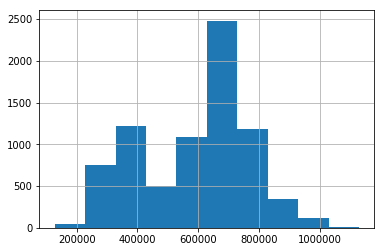

In [39]:
train['Engagements'].hist().show()

In [5]:
# convert date to datetime
train['Created'] = pd.to_datetime(train['Created'])
train.dtypes

/anaconda3/lib/python3.6/site-packages/dateutil/parser/_parser.py:1206: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/anaconda3/lib/python3.6/site-packages/dateutil/parser/_parser.py:1206: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


Engagements                      int64
Followers at Posting             int64
Created                 datetime64[ns]
Type                            object
Description                     object
dtype: object

In [6]:
train.head()

Engagements  Followers at Posting             Created   Type  \
0       502093              36984682 2019-05-21 23:30:51  Video   
1       603380              36984682 2019-05-21 22:53:33  Video   
2       603380              36984682 2019-05-21 22:19:58  Video   
3       725100              36984682 2019-05-21 22:02:41  Video   
4       661446              36984682 2019-05-21 20:47:49  Video   

                                         Description  
0  The @raptors bench trio of @sergeibaka @norman...  
1  @kyle_lowry7 pulls from deep for the @raptors ...  
2     @k_mid22 with some english on the @bucks dime!  
3        Kawhi punches it home with the left on TNT!  
4  @giannis_an34 goes baseline early to rock the ...

In [7]:
train['weekday'] = train['Created'].apply(lambda x: x.weekday())

In [8]:
# create date based fields
train['weekday'] = train['Created'].apply(lambda x: x.weekday())
train['weekend'] = np.where(train['weekday'] >= 4,'Y','N')
train['hour'] = train['Created'].dt.hour
train['timeOfDay'] = np.where((train['hour'] >= 2) & (train['hour'] <=11) ,'Morning',
                              np.where((train['hour'] >= 12) & (train['hour'] <=15),'Afternoon', np.where(
                                  (train['hour'] >= 16) & (train['hour'] <=19),'Evening','Night')))
train['mon'] = train['Created'].dt.month
train['offseason'] = np.where((train['mon'] >= 7) & (train['mon'] <=9) ,'Y','N')

In [9]:
train.head()

Engagements  Followers at Posting             Created   Type  \
0       502093              36984682 2019-05-21 23:30:51  Video   
1       603380              36984682 2019-05-21 22:53:33  Video   
2       603380              36984682 2019-05-21 22:19:58  Video   
3       725100              36984682 2019-05-21 22:02:41  Video   
4       661446              36984682 2019-05-21 20:47:49  Video   

                                         Description  weekday weekend  hour  \
0  The @raptors bench trio of @sergeibaka @norman...        1       N    23   
1  @kyle_lowry7 pulls from deep for the @raptors ...        1       N    22   
2     @k_mid22 with some english on the @bucks dime!        1       N    22   
3        Kawhi punches it home with the left on TNT!        1       N    22   
4  @giannis_an34 goes baseline early to rock the ...        1       N    20   

  timeOfDay  mon offseason  
0     Night    5         N  
1     Night    5         N  
2     Night    5         N  
3     Night    5         N  
4     Night    5         N

In [ ]:
# 'warriors'
# 'cavs'
# 'lakers'
# 'chicagobulls'
# 'okcthunder'

# 'miamiheat'
# 'celtics'
# 'houstonrockets'
# 'spurs'
# 'laclippers'

# 'nyknicks'
# 'raptors'
# 'pacers'
# 'sixers'
# 'timberwolves'

# 'bucks'
# 'trailblazers'
# 'pelicansnba'
# 'washwizards'
# 'hornets'

# 'brooklynnets'
# 'dallasmavs'
# 'atlhawks'
# 'suns'
# 'sacramentokings'

# 'detroitpistons'
# 'orlandomagic'
# 'nuggets'
# 'utahjazz'
# 'memgrizz'

In [16]:
train[train.isnull().any(axis=1)]

Engagements  Followers at Posting             Created   Type  \
781        728384              35727113 2019-03-31 15:12:18  Video   
808        393487              35692163 2019-03-29 04:30:09  Photo   
1031       755787              35393121 2019-03-15 01:03:25  Video   
1744       763284              34300664 2019-01-29 23:34:34  Video   
4860       683799              27859939 2018-04-30 16:45:42  Video   
5301       298599              27512159 2018-04-04 14:01:44  Photo   
5920       395310              26873604 2018-02-18 20:41:29  Photo   
6019       378886              26801941 2018-02-14 19:48:42  Photo   
6045       737001              26776254 2018-02-12 17:23:21  Video   
6653       768501              26158204 2018-01-01 21:01:47  Video   
6690       668628              26114290 2017-12-29 16:08:25  Video   
7449       373879              25300506 2017-10-31 18:57:18  Photo   
7595       382771              25120030 2017-10-19 20:07:57  Photo   
7757       318910              24885537 2017-10-02 13:19:09  Photo   

     Description  weekday weekend  hour  timeOfDay  mon offseason DescLower  
781          NaN        6       Y    15  Afternoon    3         N       NaN  
808          NaN        4       Y     4    Morning    3         N       NaN  
1031         NaN        4       Y     1      Night    3         N       NaN  
1744         NaN        1       N    23      Night    1         N       NaN  
4860         NaN        0       N    16    Evening    4         N       NaN  
5301         NaN        2       N    14  Afternoon    4         N       NaN  
5920         NaN        6       Y    20      Night    2         N       NaN  
6019         NaN        2       N    19    Evening    2         N       NaN  
6045         NaN        0       N    17    Evening    2         N       NaN  
6653         NaN        0       N    21      Night    1         N       NaN  
6690         NaN        4       Y    16    Evening   12         N       NaN  
7449         NaN        1       N    18    Evening   10         N       NaN  
7595         NaN        3       N    20      Night   10         N       NaN  
7757         NaN        0       N    13  Afternoon   10         N       NaN

In [18]:
# create lowercase caption for text based features
train.Description[train.isnull().any(axis=1)] = ''
train['DescLower'] = train['Description'].str.lower()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
train.isnull().sum()

Engagements             0
Followers at Posting    0
Created                 0
Type                    0
Description             0
weekday                 0
weekend                 0
hour                    0
timeOfDay               0
mon                     0
offseason               0
DescLower               0
dtype: int64

In [21]:
## TFIDF
import nltk
#nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import math

def remove_special_char(s):

    try:
        rst = re.sub('_','',re.sub('[^\w\s]','',s))
        rst = re.sub('\s+',' ',rst)
    except:
        print(s)
        if math.isnan(float(s)):
            return ''
    return rst.strip()

def get_doc(sents):
    doc_info = []
    i = 0
    for sent in sents:
        i+=1
        cnt = count_words(sent)
        temp = {'doc_id':i,'doc_length':cnt}
        doc_info.append(temp)
    return doc_info

def count_words(sent):
    cnt = 0
    words = word_tokenize(sent)
    for word in words:
        cnt += 1
    return cnt

def create_freq_dict(sents):
    i = 0
    freqDict_list = []
    for sent in sents:
        i+=1
        freq_dict = {}
        words = word_tokenize(sent)
        for word in words:
            word = word.lower()
            if word in freq_dict:
                freq_dict[word]+=1
            else:
                freq_dict[word]=1
            tmp = {'doc_id':i, 'freq_dict':freq_dict}
        freqDict_list.append(tmp)
    return freqDict_list

def calTF(doc_info,freqDict_list):
    tf_scores = []
    for tmpdict in freqDict_list:
        myid = tmpdict['doc_id']
        for k in tmpdict['freq_dict']:
            tmp = {'doc_id':myid,
                  'TF_score': tmpdict['freq_dict'][k]/doc_info[myid-1]['doc_length'],
                  'key':k}
            tf_scores.append(tmp)
    return tf_scores

def calIDF(doc_info,freqDict_list):
    idf_scores = []
    cnt = 0
    for tmpdict in freqDict_list:
        cnt+=1
        for k in tmpdict['freq_dict'].keys():
            count = sum([k in tmpdict['freq_dict'] for tmpdict in freqDict_list])
            tmp = {'doc_id':cnt,
                  'IDF_score': math.log(len(doc_info)/count),
                  'key':k}
            idf_scores.append(tmp)
    return idf_scores

def calTFIDF (tf_scores,idf_scores):
    tfidf_Scores = []
    for j in idf_scores:
        for i in tf_scores:
            if j['key'] == i['key'] and j['doc_id'] == i['doc_id']:
                temp = {
                    'doc_id':j['doc_id'],
                    'tfidf_score': j['IDF_score']*i['TF_score'],
                    'key':i['key']
                }
                break
        tfidf_Scores.append(temp)
    return tfidf_Scores

In [22]:
post_ls = train.DescLower.values
post_ls = [remove_special_char(s) for s in post_ls]
doc_info = get_doc(post_ls)
freqDict_list = create_freq_dict(post_ls)
tfidf_scores = calTFIDF(calTF(doc_info,freqDict_list),calIDF(doc_info,freqDict_list))


In [24]:
word_ls = [x['key'] for x in tfidf_scores]
score_ls = [x['tfidf_score'] for x in tfidf_scores]
word_set = set([x['key'] for x in tfidf_scores])

word_dict = {}
for word in word_set:
    indices = [i for i,x in enumerate(tfidf_scores) if x['key'] == word]
    scores = [score_ls[x] for x in indices]
    word_dict[word] = sum(scores)/len(scores)

word_engage = {}
for word in word_set:
    word_engage[word] = 0

for i,sent in enumerate(train.DescLower.values):
    this_words = word_tokenize(remove_special_char(sent))
    this_engage = train.Engagements.values[i]
    this_scores = []
    for word in this_words:
        if word in word_dict:
            this_scores.append(word_dict[word])
        else:
            this_scores.append(0)
    this_scores = np.array(this_scores) # tf idf values for each word
    this_scores = this_scores/sum(this_scores) # % of its tfidf values
    
    for j,word in enumerate(this_words):
        if word in word_engage:
            word_engage[word] += this_engage*this_scores[j]

In [25]:
## create caption based fields
train['CapLength'] = train['Description'].str.len().fillna(0) # length of caption
# list of most popular players based on jersey sales from 2018 and 2019, including instagram specific names
popPlayerRegex = 'lebron|kingjames|curry|stephencurry|giannis|kyrie|embiid|harden|westbrook|russwest44|durant|easymoneysniper|porzingis|kporzee|simmons|bensimmons|dwyane|kawhi|spidadmitchell|dwyanewade|cp3'
train['popPlayer'] = train['DescLower'].str.contains(popPlayerRegex,regex=True)*1
# list of most popular teams based on juersey sales from 2018 and 2019
popTeamRegex = 'lakers|warriors|celtics|knicks|sixers|bucks|thunder|rockets|raptors|cavs|bulls'
top10Team = 'warriors|cavs|lakers|chicagobulls|okcthunder|miamiheat|celtics|houstonrockets|spurs|laclippers'
top5Team = 'warriors|cavs|lakers|chicagobulls|okcthunder'
top5to10Team = 'miamiheat|celtics|houstonrockets|spurs|laclippers'
top10to15Team = 'nyknicks|raptors|pacers|sixers|timberwolves'
top15to20Team = 'bucks|trailblazers|pelicansnba|washwizards|hornets'
top20to25Team = 'brooklynnets|dallasmavs|atlhawks|suns|sacramentokings'
top25to30Team = 'detroitpistons|orlandomagic|nuggets|utahjazz|memgrizz'
top20Team = 'nyknicks|raptors|pacers|sixers|timberwolves|bucks|trailblazers|pelicansnba|washwizards|hornets'
top30Team = 'brooklynnets|dallasmavs|atlhawks|suns|sacramentokings|detroitpistons|orlandomagic|nuggets|utahjazz|memgrizz'
train['popTeam'] = train['DescLower'].str.contains(popTeamRegex,regex=True)*1
train['top10Team'] = train['DescLower'].str.contains(top10Team,regex=True)*1
train['top20Team'] = train['DescLower'].str.contains(top20Team,regex=True)*1
train['top30Team'] = train['DescLower'].str.contains(top30Team,regex=True)*1
train['top5Team'] = train['DescLower'].str.contains(top5Team,regex=True)*1
train['top5to10Team'] = train['DescLower'].str.contains(top5to10Team,regex=True)*1
train['top10to15Team'] = train['DescLower'].str.contains(top10to15Team,regex=True)*1
train['top15to20Team'] = train['DescLower'].str.contains(top15to20Team,regex=True)*1
train['top20to25Team'] = train['DescLower'].str.contains(top20to25Team,regex=True)*1
train['top25to30Team'] = train['DescLower'].str.contains(top25to30Team,regex=True)*1
# post is tagged at another insta handle
train['at'] = train['DescLower'].str.contains('@',regex=True)*1
# post contains a hashtag
train['hash'] = train['DescLower'].str.contains('#',regex=True)*1
# tries to capture games on national tv
natlTvRegex = 'tnt|espn|abc|nbatv'
train['natlTV'] = train['DescLower'].str.contains(natlTvRegex,regex=True)*1
# posts about an even such as allstar game or playoffs or draft
train['event'] = train['DescLower'].str.contains('allstar|all-star|finals|playoff|draft|slamdunk|thisiswhyweplay|phantomcam|kiatipoff',regex=True)*1

In [26]:
train.head()

Engagements  Followers at Posting             Created   Type  \
0       502093              36984682 2019-05-21 23:30:51  Video   
1       603380              36984682 2019-05-21 22:53:33  Video   
2       603380              36984682 2019-05-21 22:19:58  Video   
3       725100              36984682 2019-05-21 22:02:41  Video   
4       661446              36984682 2019-05-21 20:47:49  Video   

                                         Description  weekday weekend  hour  \
0  The @raptors bench trio of @sergeibaka @norman...        1       N    23   
1  @kyle_lowry7 pulls from deep for the @raptors ...        1       N    22   
2     @k_mid22 with some english on the @bucks dime!        1       N    22   
3        Kawhi punches it home with the left on TNT!        1       N    22   
4  @giannis_an34 goes baseline early to rock the ...        1       N    20   

  timeOfDay  mon  ...   top5Team top5to10Team  top10to15Team  top15to20Team  \
0     Night    5  ...          0            0              1              0   
1     Night    5  ...          0            0              1              0   
2     Night    5  ...          0            0              0              1   
3     Night    5  ...          0            0              0              0   
4     Night    5  ...          0            0              0              0   

   top20to25Team  top25to30Team  at  hash  natlTV  event  
0              0              0   1     0       0      0  
1              0              0   1     0       1      0  
2              0              0   1     0       0      0  
3              0              0   0     0       1      0  
4              0              0   1     0       1      0  

[5 rows x 28 columns]

## modeling

In [27]:
# variables used in model, inclduing response variable
train_features = train[['Engagements','Type','weekend','mon','timeOfDay','CapLength','popPlayer','top5Team','top5to10Team','top10to15Team', 'top15to20Team', 'top20to25Team', 'top25to30Team','at','hash','natlTV','event']]

In [28]:
train_features.head()

Engagements   Type weekend  mon timeOfDay  CapLength  popPlayer  top5Team  \
0       502093  Video       N    5     Night         95          0         0   
1       603380  Video       N    5     Night         64          0         0   
2       603380  Video       N    5     Night         46          0         0   
3       725100  Video       N    5     Night         43          1         0   
4       661446  Video       N    5     Night         57          1         0   

   top5to10Team  top10to15Team  top15to20Team  top20to25Team  top25to30Team  \
0             0              1              0              0              0   
1             0              1              0              0              0   
2             0              0              1              0              0   
3             0              0              0              0              0   
4             0              0              0              0              0   

   at  hash  natlTV  event  
0   1     0       0      0  
1   1     0       1      0  
2   1     0       0      0  
3   0     0       1      0  
4   1     0       1      0

In [33]:
train.describe()

Engagements  Followers at Posting      weekday         hour  \
count  7.766000e+03          7.766000e+03  7766.000000  7766.000000   
mean   5.923129e+05          3.042770e+07     3.081767    15.925444   
std    1.792682e+05          3.748957e+06     1.970062     7.319283   
min    1.278160e+05          2.487554e+07     0.000000     0.000000   
25%    4.173900e+05          2.698910e+07     1.000000    12.000000   
50%    6.397285e+05          3.004747e+07     3.000000    19.000000   
75%    7.216282e+05          3.392854e+07     5.000000    21.000000   
max    1.129585e+06          3.698468e+07     6.000000    23.000000   

               mon    CapLength    popPlayer      popTeam    top10Team  \
count  7766.000000  7766.000000  7766.000000  7766.000000  7766.000000   
mean      5.996652    69.053953     0.283029     0.280711     0.235900   
std       3.910491    37.143360     0.450499     0.449375     0.424587   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       3.000000    44.000000     0.000000     0.000000     0.000000   
50%       5.000000    63.000000     0.000000     0.000000     0.000000   
75%      10.000000    88.000000     1.000000     1.000000     0.000000   
max      12.000000   639.000000     1.000000     1.000000     1.000000   

         top20Team     ...          top5Team  top5to10Team  top10to15Team  \
count  7766.000000     ...       7766.000000   7766.000000    7766.000000   
mean      0.158898     ...          0.145120      0.114345       0.090394   
std       0.365604     ...          0.352244      0.318250       0.286764   
min       0.000000     ...          0.000000      0.000000       0.000000   
25%       0.000000     ...          0.000000      0.000000       0.000000   
50%       0.000000     ...          0.000000      0.000000       0.000000   
75%       0.000000     ...          0.000000      0.000000       0.000000   
max       1.000000     ...          1.000000      1.000000       1.000000   

       top15to20Team  top20to25Team  top25to30Team           at         hash  \
count    7766.000000    7766.000000    7766.000000  7766.000000  7766.000000   
mean        0.078419       0.043266       0.050605     0.803631     0.480556   
std         0.268847       0.203467       0.219204     0.397276     0.499654   
min         0.000000       0.000000       0.000000     0.000000     0.000000   
25%         0.000000       0.000000       0.000000     1.000000     0.000000   
50%         0.000000       0.000000       0.000000     1.000000     0.000000   
75%         0.000000       0.000000       0.000000     1.000000     1.000000   
max         1.000000       1.000000       1.000000     1.000000     1.000000   

            natlTV        event  
count  7766.000000  7766.000000  
mean      0.187870     0.238990  
std       0.390634     0.426494  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max       1.000000     1.000000  

[8 rows x 21 columns]

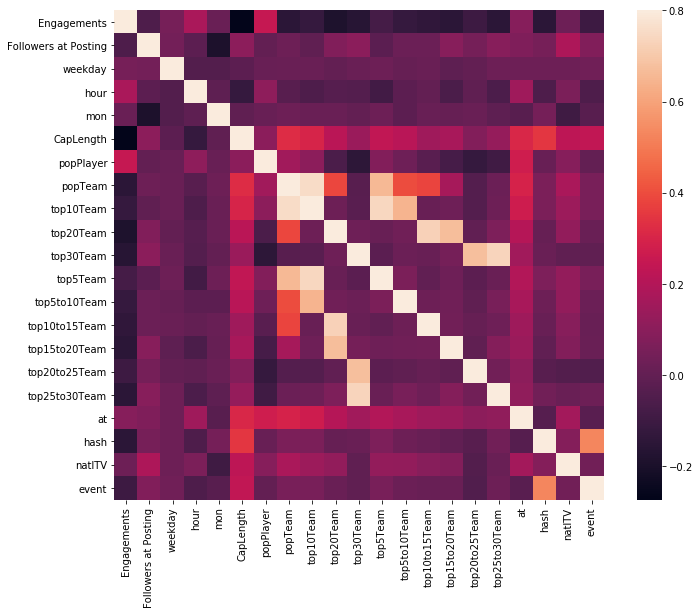

In [40]:
import seaborn as sns
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

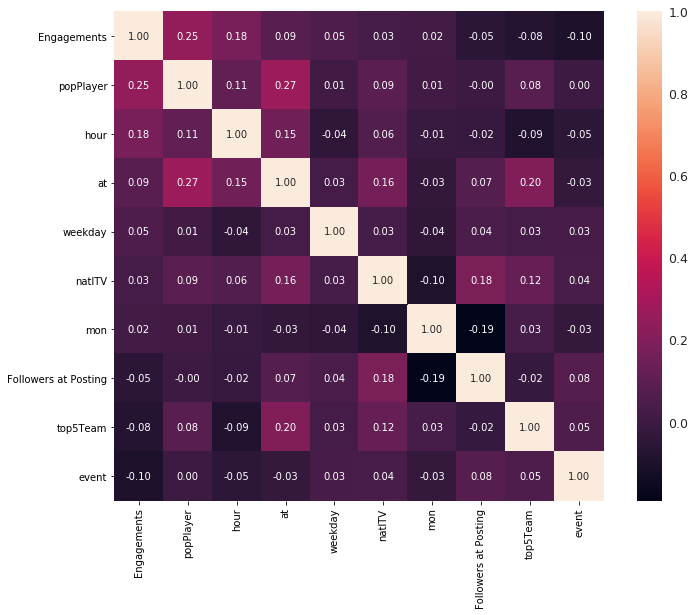

In [43]:
#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Engagements')['Engagements'].index
cm = np.corrcoef(train[cols].values.T)
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [202]:
# one hot encode categorical variables and create dataframe used in modeling

# categorical columns
cat_columns = ['Type','weekend','timeOfDay','mon','popPlayer','top5Team','top5to10Team','top10to15Team', 'top15to20Team', 'top20to25Team', 'top25to30Team','at','hash','natlTV','event']
train_features_model = pd.get_dummies(data=train_features, columns=cat_columns)

train_features_model.head()

Engagements  CapLength  Type_Album  Type_Photo  Type_Video  weekend_N  \
0       502093         95           0           0           1          1   
1       603380         64           0           0           1          1   
2       603380         46           0           0           1          1   
3       725100         43           0           0           1          1   
4       661446         57           0           0           1          1   

   weekend_Y  timeOfDay_Afternoon  timeOfDay_Evening  timeOfDay_Morning  \
0          0                    0                  0                  0   
1          0                    0                  0                  0   
2          0                    0                  0                  0   
3          0                    0                  0                  0   
4          0                    0                  0                  0   

    ...     top25to30Team_0  top25to30Team_1  at_0  at_1  hash_0  hash_1  \
0   ...                   1                0     0     1       1       0   
1   ...                   1                0     0     1       1       0   
2   ...                   1                0     0     1       1       0   
3   ...                   1                0     1     0       1       0   
4   ...                   1                0     0     1       1       0   

   natlTV_0  natlTV_1  event_0  event_1  
0         1         0        1        0  
1         0         1        1        0  
2         1         0        1        0  
3         0         1        1        0  
4         0         1        1        0  

[5 rows x 45 columns]

In [203]:
train_features_model['Followers at Posting'] = train['Followers at Posting']

In [204]:
## create features and response data frames
features = train_features_model[train_features_model.columns.tolist()[1:]]
response = train_features_model['Engagements']

## cross validation shell..

In [31]:
# get CV indices
def getIndices(K):
    kf = KFold(n_splits=K, shuffle=True)
    train_ind = []
    test_ind = []

    for train_index, test_index in kf.split(train_features_model):
        train_ind.append(train_index)
        test_ind.append(test_index)
    return train_ind, test_ind

In [32]:
## MAPE function
## calculated for each "column" of predicted y values matrix corresponding to a different combo of params from CV
def calc_mape(y_pred,y_true):
    m = []
    for i in range(0,y_pred.shape[1]):
        mape = np.mean(np.abs((y_true - y_pred[:,i]) / y_true)) * 100
        m.append(mape)
    return m


### boosted tree tuning

In [66]:
## parameters
## initially tuning lambda = .001, .01, .1 (and adjusted ranges above and below .1 after initial results)
## initially tuning trees = 50, 100, 200 (and adjusted ranges above and below 100 after initial results)
## initially tuning max_depth = 2,3,4,5,6,7,8
lambdas = [.085,.09,.095]
n_tree = [105,110,115]
max_depth = [3,4]

np.random.seed(132) 
## number of folds and reps
K = 10
Nrep = 5
## number of models to be tested
n_models = len(lambdas)*len(n_tree)*len(max_depth)

## initialized empty matrices for MAPE, models (combo of parameters), and predicted y values
MAPE  = np.zeros((Nrep,n_models))
models = np.zeros((n_models,3))
y_pred_bs = np.zeros((train_features_model.shape[0],n_models))
## actual engagements
y_act = response.tolist()


## multiple reps of K-fold to ultimately populated MAPE matrix which will be Nrep x Nmodels dimension
for nr in range(0,Nrep):
    x = getIndices(K)
    for k in range(0,K):
        i = 0
        for l in lambdas:
            for t in n_tree:
                for m in max_depth:
                    models[i] = [l,t,m]
                    b = GradientBoostingRegressor(learning_rate=l, n_estimators=t, max_depth=m)
                    b.fit(features.iloc[x[0][k].tolist(),], response.iloc[x[0][k].tolist(),])
                    y_pred_bs[x[1][k].tolist(),i] = b.predict(features.iloc[x[1][k].tolist(),]).tolist()
                    i +=1
    MAPE[nr,:] = calc_mape(y_pred_bs,y_act)


In [18]:
# make a custom scoring function for mape to be used in GridSearchCV
def mape_function(y_true, y_pred, **kwargs):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

mape_scorer = make_scorer(mape_function, greater_is_better = False)
r2_scorer = make_scorer(r2_score)

In [19]:
# implement 

grid = GridSearchCV(GradientBoostingRegressor(),
                    param_grid={'learning_rate' : [.085,.09,.095], 'n_estimators' : [105,110,115], 'max_depth' : [3,4]},
                    scoring = mape_scorer,
                    cv = 10,
                    n_jobs = -1
                   )

In [20]:
out = grid.fit(features, response)

In [42]:
out.best_params_

{'learning_rate': 0.095, 'max_depth': 4, 'n_estimators': 115}

In [67]:
## calculate the average CV MAPE per model tested
mape_total = MAPE.mean(0)
# find the best MAPE score
best_mape = min(mape_total)
## find the paramters corresponding to the min (best) MAPE
best_l = models[np.argmin(mape_total)][0]
best_t = int(models[np.argmin(mape_total)][1])
best_m = int(models[np.argmin(mape_total)][2])
# print the best model
print("Best Model:  " + "lambda=" + str(best_l) + ", ntrees=" + str(best_t) + ", max_depth=" + str(best_m) + ", MAPE=" + str(best_mape))

Best Model:  lambda=0.095, ntrees=115, max_depth=4, MAPE=7.800068045050604


In [80]:
## fit best boosted tree on data split into test train

In [205]:
X_train, X_test, y_train, y_test = train_test_split(features, response, test_size=0.2, random_state=132)

In [ ]:
b = GradientBoostingRegressor(learning_rate=0.095, n_estimators=4, max_depth=115)
b.fit(X_train,y_train)

In [44]:
# predict on test set
pred = b.predict(X_test)

In [47]:
pred = out.predict(X_test)

In [48]:
# calculate MAPE
np.mean(np.abs((y_test - pred) / y_test)) * 100

7.19197658855848

In [24]:
#calculate R2
r2_score(y_test, pred)

0.8914419507031996

In [126]:
# calculate mae
mean_absolute_error(y_test,pred)

43395.41307335185

In [134]:
pred[10]

356012.8055932471

In [131]:
y_test

2358    640878
7401    774796
6790    561007
3738    294433
4646    651707
6756    542913
3798    754316
5781    727544
5718    648364
404     560309
1328    375269
1395    780541
3797    676039
6817    616686
1145    984489
6777    602334
7124    676567
210     590802
6052    710804
3776    638580
6270    624318
7397    858175
5098    716883
1227    665938
3329    660215
5415    322945
6525    334898
3174    349403
5187    693062
6645    709206
         ...  
3772    205326
296     599077
6745    652905
4758    706458
4674    665798
5119    742022
1357    716428
2959    696503
187     358126
6636    396051
6448    700860
7450    768949
1566    320884
6308    583114
3292    645267
4927    695298
2919    670606
3051    650521
3332    660215
1104    719507
7169    310015
3455    677536
7149    431280
6184    663964
3680    609700
3175    786020
7050    674411
2323    621986
512     667872
4695    624386
Name: Engagements, Length: 1554, dtype: int64

In [129]:
# feature importance
df = pd.DataFrame({'features':features.columns.tolist(),'impt':b.feature_importances_.tolist()})
df

features      impt
0             CapLength  0.339958
1            Type_Album  0.005159
2            Type_Photo  0.011027
3            Type_Video  0.263596
4             weekend_N  0.019686
5             weekend_Y  0.015754
6           offseason_N  0.028462
7           offseason_Y  0.024007
8   timeOfDay_Afternoon  0.014368
9     timeOfDay_Evening  0.009077
10    timeOfDay_Morning  0.019609
11      timeOfDay_Night  0.020879
12          popPlayer_0  0.024203
13          popPlayer_1  0.033854
14            popTeam_0  0.012214
15            popTeam_1  0.014584
16                 at_0  0.018242
17                 at_1  0.018994
18               hash_0  0.023891
19               hash_1  0.023155
20             natlTV_0  0.016269
21             natlTV_1  0.017238
22              event_0  0.008675
23              event_1  0.017101

In [ ]:
# split the full training set into X, y

In [ ]:
# fit the model on the whole training set

In [ ]:
# build features from holdout set

In [ ]:
# predict on holdout feature set

In [ ]:
# append predictions as "Engagements" column on holdout set

In [ ]:
# save the final holdout set with predicted engagements

### linear regression

In [121]:
K = 10
Nrep = 5
n_models = 1

MAPE  = np.zeros((Nrep,n_models))
y_pred_lr = np.zeros((train_features_model.shape[0],n_models))
y_act = response.tolist()



for nr in range(0,Nrep):
    x = getIndices(K)
    for k in range(0,K):
        i = 0
        
        lr = LinearRegression()
        lr.fit(features.iloc[x[0][k].tolist(),], response.iloc[x[0][k].tolist(),])
        y_pred_lr[x[1][k].tolist(),i] = lr.predict(features.iloc[x[1][k].tolist(),]).tolist()
        i +=1
    #fscore=score(y_test,y_pred_bs)
    MAPE[nr,:] = calc_mape(y_pred_lr,y_act)

In [122]:
np.mean(MAPE)

10.205976026950305

## XGBoost


In [97]:
import xgboost


model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=132) 

In [98]:
model.fit(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0, importance_type='gain',
       learning_rate=0.07, max_delta_step=0, max_depth=3,
       min_child_weight=1.5, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=132,
       silent=True, subsample=0.6)

In [99]:
pred = model.predict(X_train)
# calculate MAPE
np.mean(np.abs((y_train - pred) / y_train)) * 100

6.582577647510979

In [100]:
#calculate R2
r2_score(y_train, pred)

0.9127961562794854

In [101]:
pred = model.predict(X_test)
# calculate MAPE
np.mean(np.abs((y_test - pred) / y_test)) * 100

7.618139418906623

In [102]:
#calculate R2
r2_score(y_test, pred) # overfitted 

0.8813358236754062

In [86]:
sorted(model.get_booster().get_score(importance_type='gain').items(),key = lambda x: x[1],reverse = True)

[('Type_Album', 270236855380.87936),
 ('Type_Photo', 229025536483.21793),
 ('Type_Video', 192316048968.57935),
 ('mon_7', 22097338979.024693),
 ('at_0', 16773316268.111979),
 ('at_1', 14998955674.240362),
 ('top15to20Team_0', 13513607840.35625),
 ('popPlayer_0', 13006292607.571997),
 ('top10to15Team_0', 10712375733.815857),
 ('timeOfDay_Night', 9370257288.228855),
 ('top10to15Team_1', 9156988878.58369),
 ('top25to30Team_0', 8564442578.978903),
 ('CapLength', 7503436039.003665),
 ('hash_0', 7392914792.347502),
 ('top5to10Team_1', 7348513816.735336),
 ('top5Team_1', 7256885007.386114),
 ('natlTV_1', 6867173698.731001),
 ('popPlayer_1', 6815624214.648106),
 ('mon_9', 6584858354.627338),
 ('mon_2', 6483888487.019963),
 ('mon_10', 6379088100.600841),
 ('mon_5', 6273463302.365362),
 ('mon_8', 6254317943.403561),
 ('top20to25Team_0', 6115617220.1),
 ('mon_12', 6035005658.318872),
 ('Followers at Posting', 5990293368.593085),
 ('event_1', 5980524452.0048485),
 ('top25to30Team_1', 5841497162.86

In [106]:
#for tuning parameters
parameters_for_testing = {
   'colsample_bytree':[0.4,0.6,0.8],
   'gamma':[0,0.03,0.1,0.3],
   'min_child_weight':[1.5,6,10],
   'learning_rate':[0.1,0.07],
   'max_depth':[3,5],
   'n_estimators':[100,300,500,700,1000],
   'reg_alpha':[1e-5, 1e-2,  0.75],
   'reg_lambda':[1e-5, 1e-2, 0.45],
   'subsample':[0.6,0.95]  
}

                    
xgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
    min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=4, scale_pos_weight=1, seed=132)

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing,cv =10,
                        n_jobs=4,iid=False, verbose=100,scoring='neg_mean_squared_error')
gsearch1.fit(X_train,y_train)
print (gsearch1.grid_scores_)
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)



Fitting 10 folds for each of 12960 candidates, totalling 129600 fits
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4296009093.045527, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3425814334.961552, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4717631292.430278, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3343932823.997342, total=   2.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4319347032.77746, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3884145436.981541, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4328438928.831466, total=   2.2s


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    4.6s


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4536023047.587496, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3364315702.249528, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3964220813.761074, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4283549069.856817, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4655911555.523633, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    6.8s


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4302911272.774896, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3392135229.590695, total=   2.1s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3445158188.038914, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3876072743.226083, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4394205549.751446, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4597914862.234681, total=   2.0s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3286821222.211106, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   10.9s


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3979126556.812935, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4723443250.4187155, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3343966428.6254516, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4282953490.459787, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3386942484.6775856, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   13.4s


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4319354876.887311, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4537536882.056922, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3884269345.70616, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4328510908.348279, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3374995543.454024, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3964275441.156415, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4655931708.973482, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4294393252.9334574, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3392135839.4654193, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3425933707.679711, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4302929912.492715, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3876102588.423048, total=   2.1s


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   19.5s


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4592534050.754119, total=   2.1s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3286802339.7957487, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4394221717.234073, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3979159547.921417, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3353309364.767828, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4330436806.320769, total=   2.1s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4707917360.564098, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3452456912.554254, total=   2.0s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   23.7s


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4315681585.676145, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4334579511.1185465, total=   1.9s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3947036708.351847, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4588373723.69514, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4296876272.319715, total=   1.9s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3361844882.757722, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4655589337.933255, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3951661565.967204, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3345264330.775482, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3437717665.012267, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3905188105.7852507, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   29.9s
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4308990662.051308, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4576844947.215635, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4365271942.3733, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3967885598.384001, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3300781181.038633, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4717631292.430278, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4296009101.300469, total=   2.1s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3343932824.5072284, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3425814342.94215, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   34.3s


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4536023059.543121, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4319347032.964295, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3884145436.981541, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4328438923.135209, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3364315692.8238096, total=   2.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4655911555.523633, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3964220965.8991923, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4283549118.583359, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3392135232.068165, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3445158251.7724338, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4302911272.774896, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3876072749.691911, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4394205559.4822855, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4597914862.234681, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3286821222.211106, total=   2.1s


[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:   43.2s


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3979126569.180267, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4723443266.132887, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4282953513.8856587, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3343966428.6254516, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3386942480.413673, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4319354876.887311, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3884269345.70616, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4537536882.056922, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4328510906.14898, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3374995542.047099, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3964275457.830907, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4655931680.142136, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   50.0s


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4294393252.9334574, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3425933861.5367866, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3392135839.4654193, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4302929912.492715, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3876102588.423048, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4394221717.234073, total=   2.0s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4592534050.623015, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3286802339.9281273, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3979159453.281342, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4707917364.320945, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4330436801.318874, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3452456906.7075934, total=   2.1s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3353309417.389787, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4315681572.983169, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:   58.4s


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3947036708.351847, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4588373719.315973, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4334579511.1185465, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3361844882.757722, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3951661565.967204, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4296876371.920383, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4655589337.933255, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3345264330.775482, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3437717665.012267, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4308990667.049824, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3905188105.7852507, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4576844949.941957, total=   2.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4365271942.3733, total=   2.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3300781161.735071, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3967885598.384001, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  1.1min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4717631353.525877, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4296009400.232002, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3343932918.114111, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3425814309.017942, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4319347069.763217, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3884145439.3428764, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4536023127.560692, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4328439274.230577, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3364316424.5013194, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4655911108.925021, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3964220868.976575, total=   2.1s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4283549478.3053107, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3392135488.010875, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4302911302.545637, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3445158338.3571424, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3876072836.179713, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4597914801.476926, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4394204955.217528, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3286821285.201072, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  1.3min
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3979126685.9007506, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4723443406.108046, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3343966443.4359646, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4282953643.1112323, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3386943219.646742, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4319354701.545508, total=   2.1s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4537537143.318335, total=   2.0s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3884269494.987599, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4328511933.894009, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4655931465.578354, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3964275512.4894724, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3374995535.860892, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4294393252.8703604, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3392135713.4349246, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4302930180.284257, total=   1.9s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3425934040.1514053, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.4min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3876102611.397101, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4592534144.752535, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4394222282.50265, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3286802202.645154, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3979159737.940368, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4707917398.711428, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3353309743.5416765, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4330437235.019036, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3452456869.823021, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4315681884.748175, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3947036680.11277, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4588373936.962731, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4334579855.958957, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3951661423.6394873, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4655589207.723372, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3361845076.5111704, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4296876557.469001, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3437717774.2641177, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3345264474.7972836, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4308990776.526657, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  1.6min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3905188122.9242425, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4365271717.2218685, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4576844985.785936, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3300781243.6765847, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3967885695.4030294, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4023450726.3517933, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4284818729.2314014, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3256134707.405656, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3179850402.1389217, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3610115276.80153, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4258899108.6058397, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3949712445.118955, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4008748622.6037908, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3260407105.2387695, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4275743348.814957, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3654521872.718834, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3995445804.4914026, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.9min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3283076755.868031, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3157164615.28152, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3942102269.209568, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3652947379.9887443, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4282659767.6256495, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4028231224.488262, total=   5.7s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3098221938.239878, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3727037088.341031, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4273313645.2434216, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4011212387.3445787, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3123148203.8250313, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3256123907.794651, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3962824729.7062416, total=   6.0s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3629893609.7102456, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4005261621.419705, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4286945513.2964425, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3226081023.451089, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3648309408.8229165, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4270954933.947849, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4039167480.9468827, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3140724503.248085, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3964841861.787043, total=   5.7s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3297502337.989586, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 213 tasks      | elapsed:  2.5min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3632189903.8547235, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4303701213.47612, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4042444480.5714602, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3111740645.8181214, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3726974099.8165708, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3261385201.7179375, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3201011462.1413045, total=   5.8s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4284083241.0041275, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4045290973.471738, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3961054182.4024954, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3640935293.8860636, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4244086209.3907447, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4032678058.4862, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3199181293.3950076, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3666292923.8859215, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4255531207.98708, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3990058664.962512, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3238696238.619008, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3171220538.998621, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 234 tasks      | elapsed:  3.0min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3913518518.3924727, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3663780450.7643404, total=   5.7s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4299199739.348633, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4041133911.3853602, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3678125430.0825596, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3153269350.609421, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3179850375.551712, total=   5.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4284818731.607309, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4023450733.2533, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3256134709.07396, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3610115181.661562, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4258899067.24103, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3949712457.0129194, total=   6.3s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4008748898.9380927, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3260407340.5024962, total=   6.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4275743307.6831226, total=   6.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3654521882.389532, total=   6.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3995445583.3514056, total=   6.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3283076931.5091867, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3157164648.7048078, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3652947542.1874676, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3942102288.351756, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4282659763.6438456, total=   5.8s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4028231204.175833, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3727037099.268866, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 257 tasks      | elapsed:  3.6min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3098221933.5044594, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4011212434.627662, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3256123980.4872746, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4273313641.8415914, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3123148301.483513, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4286945160.439379, total=   5.6s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3962824707.754677, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3629893647.9390507, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4005261732.8590684, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3648309338.4036946, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3226081020.1157365, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4270954801.8502035, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4039167468.271974, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3964841867.367694, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3297502351.257314, total=   5.7s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3140724374.6315727, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3632189893.128392, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4042444473.235648, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4303701125.501442, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3111740660.7007484, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3726974313.3357973, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  4.1min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4045290978.885577, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4284083252.0051417, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3261385247.787176, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3201011583.4477677, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4244086395.655643, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4032678056.7879148, total=   5.5s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3961054333.052314, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3640935265.045551, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3199181259.3578625, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4255531147.0865736, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3990059102.5402007, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3666292952.1321316, total=   6.0s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3663780446.5692353, total=   5.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3238696246.011316, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3913518444.6457973, total=   5.5s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3171220554.510214, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4041133911.3853602, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3153269328.7945666, total=   5.6s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4299199741.230498, total=   5.7s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3678125430.0825596, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3256134120.9816837, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4023450377.145407, total=   6.0s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4284818826.976893, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3179850224.5508184, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3949712551.4226108, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3610115094.7726765, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 305 tasks      | elapsed:  4.8min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4008748825.5147963, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4258898660.7126374, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3260407407.854041, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4275743128.675272, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3654521870.3902116, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3995445552.0453677, total=   5.7s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3283077059.25186, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3157164852.5561967, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3652947345.256257, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3942102448.2179723, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4282660346.95963, total=   5.8s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4028230356.1621375, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3098221718.9558783, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3727037052.7077813, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3123148972.4678583, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4273312894.304165, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3256123720.1816764, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4011212604.920459, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3629893433.191933, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4005261791.640471, total=   5.9s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3962824213.8270564, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4286945384.5080137, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3226080853.878653, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3648309498.849263, total=   5.8s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4270954719.123678, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 330 tasks      | elapsed:  5.4min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4039167329.431915, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3964842090.9524646, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3297502136.2476177, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3140724639.3945646, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3632189754.369865, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3111740408.6015043, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4042444042.9895024, total=   5.7s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4311488125.4801235, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3726974148.9651756, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4284083388.8354287, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3261385382.681138, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4045290934.5638127, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3201011912.272225, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3640935043.337756, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3961054930.95527, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4244086561.5855713, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4032677796.104393, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3199181520.8677955, total=   6.0s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3660929964.3347187, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4255531486.211738, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3990058377.430248, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3171220122.196144, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3238696132.2396755, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3913518621.2969127, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3663780627.2414546, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4041134020.3148227, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4299199760.33821, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  6.0min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3153269318.1256785, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3678125527.8464313, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4223370703.456703, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3940883907.8720922, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3298652636.094036, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3185831357.9055066, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3613052020.8530784, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3850521495.711336, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4014849839.1345453, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4216457656.093343, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3238089110.660561, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3636659677.7376237, total=   9.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3940450965.966656, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4236333748.3741083, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3292035841.7998605, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3117360303.6460476, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3639861677.369697, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3849104637.7262473, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4234475057.867469, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3960484323.6679325, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3046640461.215506, total=  13.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3646365217.711727, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4241662316.026729, total=  11.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4005727191.9154534, total=  11.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3295569275.9326396, total=  11.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3130284313.9687657, total=  11.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 384 tasks      | elapsed:  7.1min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3598156149.624857, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4260087561.030896, total=   9.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3890870748.459017, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4039498656.8323317, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3218831938.700424, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3624486487.682433, total=   9.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4221055695.4554315, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3975646458.553004, total=   9.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3331098642.007563, total=  11.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3117721358.223001, total=  11.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3603917283.84325, total=  11.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3869162542.5214286, total=  11.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4246464211.630397, total=  10.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3966092728.0766525, total=  10.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3659331150.891375, total=  10.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3098369786.2842593, total=  10.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4226647361.6497297, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3978537134.2545686, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3173296203.889801, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3291716126.4227147, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3859892544.724367, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3632355922.495975, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4014450214.878103, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4238511185.580598, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3180496462.1153355, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4189065645.5859118, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3626482160.082602, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3955150750.5095725, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3264618542.101551, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 413 tasks      | elapsed:  8.4min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3623458871.1167502, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3814110097.63829, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3125483963.4889655, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4219339389.3518786, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3116405840.6971684, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3970056062.537106, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3635151123.526273, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4223370718.1760144, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3940883939.202946, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3185831495.15441, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3298652418.3164215, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3850521635.798935, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3613051611.2031746, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4014849262.1844287, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4216458002.453939, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3238089040.762063, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3636659645.262522, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4236334007.7671394, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3940451240.4232187, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3292035628.610042, total=  10.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3117360494.745641, total=  10.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3639861706.4226046, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3849104607.253757, total=  10.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4234475061.5232644, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3960484289.9965496, total=   9.8s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3046640440.667905, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3646365264.2245135, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4241662057.4156594, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4005727576.1311245, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3295569075.379531, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  9.6min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3130284443.071345, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3890870748.0113697, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3598156384.6002455, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4260086956.092697, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4039498939.6356573, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3218831922.1058455, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3624486339.3920035, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4221055870.6707964, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3975646445.040356, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3331098924.1083584, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3117721070.8439984, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3869162550.8228693, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3603917229.681573, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4246464151.300229, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3966092863.056466, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3098369155.393408, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3659331355.2800508, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4226647344.389452, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3978537050.237708, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3291716258.4198713, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3173296454.3155828, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3859892604.3473206, total=   9.9s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3632355908.656863, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4238511256.769907, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4014450214.4901943, total=   9.9s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3626482185.0436196, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3180496345.111893, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3955150818.803496, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4189065590.3400273, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3264618581.326142, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3125483974.3551574, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 473 tasks      | elapsed: 10.9min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3814109961.1460867, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3623458759.916219, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3970056077.0193424, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4219339157.846109, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3116405818.782682, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3635151097.748488, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4223370435.5641193, total=  10.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3940883512.1812906, total=  10.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3298652145.549701, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3185830789.3817453, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3850521533.868741, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3613051567.20878, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4216457009.6406283, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4014849385.823357, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3238088512.522254, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3636659563.5453687, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4236333232.342442, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3940451221.35804, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3117360532.3046865, total=  10.3s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3292035747.677842, total=  10.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3639861198.741994, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3849104138.144036, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4234475681.25991, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3960483653.119147, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3646365083.8911233, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3046640475.0080185, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3295568473.7611513, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4005727490.4168243, total=   9.8s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4241661626.282867, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3130285010.45943, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed: 12.1min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3890870098.4510713, total=  11.8s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4260086881.163333, total=  11.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3598156142.671766, total=  12.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4039498079.797762, total=  12.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3218831449.3565254, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4221055409.651664, total=   9.9s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3624486509.999003, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3975645986.2002707, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3331098579.7391224, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3869163077.687923, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3117720995.486236, total=  10.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3603916623.686915, total=  10.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4229744585.5999556, total=  10.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3966093186.8517385, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3098369201.546785, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3659331166.216299, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4226647147.3243246, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3978536838.2195663, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3173296285.6314116, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3291716471.077228, total=  10.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3859893296.095387, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3611707278.520382, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4238511379.45404, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4014450171.0984707, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3180497183.45974, total=  12.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3609220454.44747, total=  12.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4189065844.074324, total=  12.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3955150526.631021, total=  12.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3264618009.352428, total=  10.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3125483613.1653066, total=  10.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3814110077.005782, total=  10.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3623458719.580729, total=  10.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4219339191.2872667, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 537 tasks      | elapsed: 13.8min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3970055461.7627096, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3116405798.6317487, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3635150768.2988515, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4206135038.614487, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3328127430.965169, total=  13.6s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3957174791.421599, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3183992325.8977394, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3854780244.0851197, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3625052229.2255616, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4239158276.553384, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3990758053.6616344, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3189943346.1837225, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3661480594.2081323, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4209762599.826497, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3918107942.2289567, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3290197044.7736044, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3108179866.767055, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3828597690.207242, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3642099097.3774157, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4208338352.4551535, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3929300071.8038163, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3062669594.1284947, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3642782514.156883, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4205733415.6461177, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4040727388.586688, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3335615891.004392, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3165546553.92995, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3873819701.440346, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3591297913.1266026, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4014920624.6289535, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4284340121.7164855, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3192864749.0344405, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3663474852.376425, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 570 tasks      | elapsed: 15.7min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4200417673.294327, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3955030009.9425125, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3333244131.4064565, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3596517064.2451835, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3099239773.9646854, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3825885776.233841, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4241016958.453342, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3644546217.7406945, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3944385975.0324326, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3105464613.709045, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4186254443.7334394, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3312212439.011866, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3998201885.260402, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3224705077.1523075, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3837037151.9829707, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3598966168.453622, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4231740235.361144, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3991027560.2238812, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3148151620.3695617, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3648916302.520561, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4163196147.1051154, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3961038210.207432, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3265130390.38337, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3096199243.8969307, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3627426033.4457293, total=  13.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3816591607.5027976, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4195563034.2072496, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3106866509.769738, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3929247189.701241, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3637709347.7069273, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4206134986.87782, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3957175081.306542, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3328127039.788643, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3183992501.6721516, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3854780000.5604715, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 605 tasks      | elapsed: 17.7min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3625052386.5955467, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3990758221.828668, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4239157995.6739335, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3189942710.187472, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4209762252.7025323, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3661480813.810204, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3918107920.178417, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3290196777.2013936, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3828597538.897529, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3108179748.8307066, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3642098910.353639, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4208338372.514549, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3929300035.140194, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3062669509.4248195, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3642782360.173795, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4205733424.028394, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4040728108.6751337, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3335615717.937649, total=  15.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3165547003.6251936, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3873818937.0364428, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3591298387.4813166, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4284340055.3325706, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4014920542.1238904, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3192864662.787661, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3663474677.911018, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4200417870.1253705, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3955030104.49327, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3333243469.265951, total=  16.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3099239812.6758966, total=  16.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3596516957.890864, total=  17.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3825885793.068495, total=  17.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4241016889.813747, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3944385430.959205, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3644546539.387645, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3105464060.08667, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed: 19.7min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4186254276.928469, total=  15.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3998202323.911065, total=  15.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3224705089.607958, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3312212042.1146173, total=  15.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3837036790.1551743, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3598965768.141666, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4231740513.2227783, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3991027348.9074097, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3148151286.837778, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3648916146.212213, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3961038354.6672173, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4163195841.9594774, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3265130429.4303484, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3096199187.4016542, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3816592062.9503903, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3627426122.2560143, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4195563351.874305, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3929247217.3063707, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3106866507.4902325, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3637708803.5245585, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4206134885.5849066, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3957174257.0257454, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3328126444.377164, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3183992121.5664544, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3854779600.7619953, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3625052053.166927, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4239156817.236054, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3990757984.915404, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3189941879.416768, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3661480204.185848, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4209761357.5605125, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3918108407.382781, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3290196550.418846, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3108179583.5486803, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3828597632.3697753, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3642098717.2849565, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4208337847.0665774, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 677 tasks      | elapsed: 22.0min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3929299594.030848, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3062669371.588973, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3642782113.7154083, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4205732690.9336863, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4040727411.6728797, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3335615055.2349405, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3165547421.523022, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3873818428.247995, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3591297499.9941044, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4014919957.8110204, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4284339807.263839, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3192863906.4385066, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4200417509.25996, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3663474934.9567795, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3955030003.2157984, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3333242868.92853, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3099239318.0630713, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3828219295.2245574, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3596516718.633131, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4199239444.4335766, total=  16.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3105464049.3308415, total=  16.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3944385051.0342975, total=  16.8s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3644546050.317216, total=  17.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4186254981.8317747, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3312212382.9592414, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3998201836.031506, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3224704559.7198424, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3837037069.883823, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4231740393.586548, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3600369465.764406, total=  14.4s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3991027007.326672, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3148152350.420512, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3641660062.5210958, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3961038448.7362275, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4163195782.689876, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3265130399.37322, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3096198923.2727404, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3627425661.8892875, total=  13.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 714 tasks      | elapsed: 24.2min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3816592026.9396772, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4195563632.7739825, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3929246276.298004, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3106866191.594524, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3637708585.616406, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4273114917.8995066, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3346280915.574612, total=  19.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3229078532.327467, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4050652695.4423294, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3848910681.560308, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3731541142.8499365, total=  19.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4238146490.405431, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4051409051.662502, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3182187905.319644, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4179593281.7493625, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3700884592.4967237, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3937684742.09283, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3317059580.2716827, total=  19.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3830844695.0593123, total=  19.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3143986648.2632456, total=  19.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3667598146.918524, total=  19.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4184830513.3329306, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3984064714.7159343, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3055038472.7425942, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3651081105.6072993, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4257463207.92196, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4050154544.1481013, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3358021897.655297, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3203541691.6581535, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3844735175.333437, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3690532342.2407045, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4046087421.082102, total=  20.0s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4305839627.509976, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3215185787.7535663, total=  21.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3705142250.037635, total=  21.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4192233165.0944595, total=  21.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3989442259.3819647, total=  21.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3361465103.0158095, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 753 tasks      | elapsed: 27.4min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3141772753.208602, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3605833217.962459, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3810765819.7119713, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4206373270.811668, total=  21.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3970555212.8340507, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3104678796.4675717, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3654045770.04163, total=  21.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4226587579.0672665, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3340452309.183155, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3230427519.349926, total=  19.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4008579358.6767235, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3842534771.2430162, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3681780170.429336, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4074258009.00864, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4216211849.8521147, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3143222425.5388675, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4159302133.8058352, total=  19.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3705100274.6504498, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3957937430.5090065, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3303844965.8133554, total=  19.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3134235236.379598, total=  19.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3779772119.2127776, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3619529297.3777986, total=  19.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4169985571.744394, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3983861546.4945827, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3656126689.8773127, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3103351515.482367, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4273115654.924874, total=  22.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4050652875.889877, total=  22.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3229871438.8776784, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3346279948.963538, total=  21.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3848910062.6235204, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3731540464.799005, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4238145844.7700205, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4051409112.470578, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3182187559.470431, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3700884975.5548544, total=  19.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3937684704.3855834, total=  19.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4179592947.0640235, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 30.5min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3293999479.8403373, total=  19.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3143986413.67406, total=  19.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3667597767.7493978, total=  19.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3830844591.252043, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4184830468.153653, total=  19.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3984064780.1310577, total=  19.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3651081002.357389, total=  19.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3055038404.322134, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4257463385.993745, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4050155392.8898916, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3358022164.2732744, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3203542918.2148924, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3844734720.851278, total=  19.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4305839336.523617, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3690532683.903881, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4046086727.119854, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3215185706.1392155, total=  19.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3693655623.9460263, total=  19.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4187184188.4492774, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3989442201.369199, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3361464460.5067477, total=  19.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3141772288.9978743, total=  19.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3810765747.700884, total=  19.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3605832520.8651276, total=  19.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4206373067.7227616, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3104678558.369339, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3970554866.73368, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3654046145.1476684, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4226587390.5458765, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3340452011.1119385, total=  19.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4008579722.4414697, total=  19.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3230427265.5157943, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3842534611.4820147, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3681779232.9373536, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4216212019.2029395, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4074257805.7704825, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3143221870.8105073, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3705100247.8452673, total=  19.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4159301851.739765, total=  19.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3957937361.3938594, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3303845171.0596256, total=  19.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 833 tasks      | elapsed: 34.1min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3134235898.5487432, total=  19.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3779773153.9939246, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3619528857.918521, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4169985988.882734, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3983861450.796303, total=  19.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3103351502.7856216, total=  19.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3656126294.8211145, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4273115327.9158106, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4050652163.1170926, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3346279492.7505307, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3229871140.2514977, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3848909717.011324, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3731540897.38503, total=  19.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4238145171.2751517, total=  19.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4051408357.4359846, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3182186290.674275, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3700883349.3671136, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4179592060.6484485, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3937685032.6401596, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3293999533.56206, total=  19.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3143986158.138299, total=  19.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3830844420.841935, total=  19.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3667597102.940708, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4184830504.7682443, total=  19.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3984063755.9892387, total=  19.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3055037849.944623, total=  19.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3651080804.628343, total=  19.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4257462564.7031956, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4050153612.504409, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3358021288.6156516, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3203542171.765317, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3844733597.1425977, total=  19.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3690531137.368106, total=  19.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4305839276.035086, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4046087135.429216, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3215184386.2589192, total=  19.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3705141660.5152454, total=  19.6s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4187183534.894382, total=  19.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3989442466.497702, total=  19.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3361464265.719325, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3811100262.653067, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3141771803.585717, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


[Parallel(n_jobs=4)]: Done 874 tasks      | elapsed: 37.4min
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3605832513.146821, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4150756772.998942, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3970554576.220758, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3104678340.875962, total=  19.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3654045459.0443234, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4226587464.90246, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4008579319.8302274, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3340452648.1703615, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3230426092.9644914, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3842534574.540789, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3659130283.374038, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4216211843.789736, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4074256673.1524844, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3143222577.6914806, total=  22.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4159302096.7648134, total=  22.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3676212192.3750896, total=  23.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3957937833.4953513, total=  22.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3303844820.6376834, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3134235164.6055884, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3779773661.37291, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3619528886.2665153, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4169985590.9646583, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3983860234.446621, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3103351557.3512278, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4701359096.2527275, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4303774089.445137, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3656126155.9963956, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3332772625.235871, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3400658188.7451463, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4277724623.4269032, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3914214683.005847, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4498692269.275279, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4350302798.700316, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3356902143.644704, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3967613306.8102746, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4651220105.875915, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4266098250.407021, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3358087613.6612253, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3451719422.7125926, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4307723127.758191, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3877029426.56203, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4557803643.920579, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 917 tasks      | elapsed: 39.7min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4396424045.870025, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3288082236.673696, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4002616520.2775264, total=   2.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4701397626.304241, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4303829580.880955, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3332804792.0398073, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3400738279.0608706, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4277786714.692693, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3934364400.0429144, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4499692534.513034, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4350401925.358571, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3356946221.4051566, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3967648139.0730643, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4678547649.673314, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4310908263.45485, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3358117767.9416704, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3451743080.599009, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4307762745.611285, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3877104238.6689596, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4594884106.547913, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4396465664.907498, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3302381645.7708497, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4002652088.2538986, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4695606258.897986, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4312090235.089993, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3361667306.77856, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3425436334.4143023, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4321730317.290807, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3934818699.5478735, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4545541394.678997, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4308079328.300153, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3364858923.3256025, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3964155890.3509965, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4671958631.684779, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4300758924.400167, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3366814221.918555, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3431949330.896011, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4264348457.6690316, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3865501289.5275464, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4605520915.80094, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4413804513.59803, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3304056307.6616826, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3992499113.9035807, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 960 tasks      | elapsed: 40.1min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4701359096.2527275, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4303774089.445137, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3332772598.33559, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3400658184.080019, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4277724610.597348, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3914214423.9511485, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4498692232.959994, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4350302798.700316, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3356902169.7719545, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3967613326.3311696, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4651220105.875915, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4266098250.407021, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3358087613.6612253, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3451719422.7125926, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4307723127.758191, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3877029401.923265, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4557803643.920579, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4396424045.870025, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3288082236.673696, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4002616520.2775264, total=   2.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4701397787.980653, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4303829260.302059, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3332804791.0811186, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3400738254.162499, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4277786723.7403655, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3934364400.0429144, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4499692534.513034, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4350401929.3238, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3356946221.4051566, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3967648139.0730643, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4678547649.673314, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4310908263.45485, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3358117767.9416704, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3451743080.599009, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4307762745.611285, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3877104238.6689596, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4594884110.538978, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4396465663.384569, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3302381618.409783, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4002652088.2538986, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4695606258.897986, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4312090232.017309, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3361667296.9407086, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3425436338.9164033, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4321730321.57591, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3934818797.7310815, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed: 40.5min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4545541393.202189, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4308079328.300153, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3364858982.114371, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3964155907.4107537, total=   2.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4671958623.342975, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4300758926.905674, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3366814221.918555, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3431949330.896011, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4264348457.6690316, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3865501272.9394007, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4605520915.80094, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4413804513.59803, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3304056306.3059735, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3992499113.9035807, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4701359734.383888, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4303773994.076388, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3332772784.553533, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3400658229.67138, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4277724721.0586677, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3914214570.076408, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4498692338.292308, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4350303137.423471, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3356902143.502932, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3967613021.7258987, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4651220346.857082, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4266098065.580122, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3358087875.6641827, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3451719793.4429154, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4307723172.020309, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3877029484.244762, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4557803677.244111, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4396424044.590338, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3288082083.447303, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4002615931.7080235, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4701397897.871356, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4303829911.626396, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3332804768.9569883, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3400738309.092508, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4277786565.8814507, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3934364572.652774, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4499692764.2026205, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4350401943.136799, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3356946363.462142, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3967648465.3619485, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4678547682.72364, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 1050 tasks      | elapsed: 40.9min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4310908289.463551, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3358117814.422993, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3451743220.963412, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4307763047.16564, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3877104469.6586246, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4594883819.129327, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4396465697.252457, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3302381577.7959747, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4002652107.785202, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4695605945.4794855, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4312090282.1501465, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3361667435.164776, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3425436458.492657, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4321730587.009611, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3934818906.5313373, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4545541426.448423, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4308079528.177109, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3364858469.077215, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3964156113.9614267, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4671958815.953918, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4300759233.335243, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3366814475.6522384, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3431949307.0646014, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4264348687.0523124, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3865501316.934443, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4605520622.990837, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4413804644.238969, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3304056308.611298, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3992499394.453583, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4267125862.101073, total=   6.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4023015029.8185844, total=   6.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3248359689.890965, total=   6.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3127740238.7774324, total=   6.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3920637886.3267126, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3666797832.37099, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4269006211.1876307, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3992613660.6780252, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3204135885.900778, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3693775123.9107113, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4294172923.117033, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4010343981.113545, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3290190247.89579, total=   6.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3185005744.3089175, total=   6.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3928272703.3249435, total=   6.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3625847633.4567637, total=   6.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4274354515.919491, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3131163480.053045, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 1097 tasks      | elapsed: 41.7min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4044720767.866567, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3707894211.930697, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4023015848.3860626, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4243962359.7716885, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3253523114.957531, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3152103208.0187297, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3593472918.864048, total=   6.2s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3912241187.017218, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4304223427.242391, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3992684560.459807, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3194296077.57596, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3693778106.2412596, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4275669179.6183934, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3997495567.712955, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3290121679.3179364, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3184999518.4529924, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3937328843.924855, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3617825631.3522553, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4258555440.9390664, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4044698433.9129415, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3156083644.094832, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3702209669.561715, total=   6.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4301352266.366679, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4031958206.5160365, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3269977697.160619, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3183961112.0318446, total=   8.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3940436966.3576245, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3624505961.611896, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4266985553.9292936, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3970019786.0847135, total=   7.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3225204819.757383, total=   7.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3711056727.1000614, total=   6.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4297752363.90026, total=   7.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4023628465.985539, total=   7.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3249541452.2054124, total=   7.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3152779744.318078, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3912756826.8313875, total=   7.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3624106712.780569, total=   6.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4262875990.2394724, total=   8.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4037285040.3764844, total=   8.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3123014783.9772434, total=   8.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3684425974.3310122, total=   8.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4267125878.5600014, total=   6.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4023014915.990985, total=   6.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3248359850.358926, total=   6.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3127740265.3234735, total=   6.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 1144 tasks      | elapsed: 43.1min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3920638252.2442, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3666798091.8437624, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4269006172.8869576, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3992613680.2170453, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3204135982.6658726, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3693774841.979426, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4294172928.660227, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4010343981.8523912, total=   6.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3290190247.89579, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3185005741.628842, total=   6.1s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3928272720.1645784, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3625847621.288298, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4274354590.644033, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4044720771.9825997, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3131163485.5691867, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3707894200.8013835, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3253523115.9643416, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4023015344.744829, total=   6.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4243962672.2944503, total=   6.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3152103214.4392066, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3593472918.864048, total=   7.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3912241095.1348114, total=   7.3s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4304223628.173166, total=   7.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3992684424.25813, total=   7.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3693778107.7126203, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3194296067.31646, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4275669179.616627, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3997495528.1304293, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3290121671.771991, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3184999353.5893545, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3937328848.4568787, total=   6.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3617825631.3522553, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4258555428.8025002, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4044698456.9586163, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3156083603.365027, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3702209712.6926975, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4301352644.490312, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4031958205.5836906, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3269977610.097143, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3183961106.5719085, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3940436950.9813304, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3624506473.4073668, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4266985609.53969, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3970019722.4940386, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3225204547.005599, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3711056807.4280314, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4297752981.6373205, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4023628449.18591, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3249541312.012102, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 1193 tasks      | elapsed: 44.4min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3152779528.6410413, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3912756826.8313875, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3624106781.559202, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4262875978.5806804, total=   7.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4037285048.4074264, total=   7.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3123014792.2541046, total=   7.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3684425886.0585876, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4267126584.079571, total=   8.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4023014571.3416085, total=   8.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3248359982.769777, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3127740770.01133, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3920638039.088187, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4269006268.4120245, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3666798166.5225673, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3992613657.4586997, total=   6.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3204136180.1988716, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3693775114.41232, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4294172973.6563835, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4010343087.930614, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3290190237.7656045, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3185005944.103792, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3928273006.664546, total=   6.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3625846999.828427, total=   6.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4044719880.948145, total=   6.9s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4274354996.177176, total=   7.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3131163676.792923, total=   7.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3707893757.183641, total=   7.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4243962105.192184, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4023015327.410137, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3253522857.7733326, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3152102901.636445, total=   7.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3912241082.91285, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3593473025.882088, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4304223933.654209, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3992684251.9080396, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3194295934.687709, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3693778632.8571734, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4275669235.972716, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3997495457.8526735, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3290121361.3406563, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3937328895.0972095, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3184999606.816017, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3617825744.6487164, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4258555503.354854, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4044698598.000327, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3156083523.545566, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3702209795.701205, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4301352276.162285, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3269977391.0984406, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4031958495.769211, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 45.8min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3183961169.3576884, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3624506455.863179, total=   6.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3940436803.938343, total=   6.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4266985947.8311033, total=   6.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3970019368.7304764, total=   6.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3225204045.9615035, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4297753052.798537, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3711057240.5729465, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4023628238.486254, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3249541151.477677, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3152779386.161424, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3912756820.959411, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3624106946.5164323, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4262875651.5933113, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4037284883.71706, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3123014910.5739174, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3684425960.948275, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3978956401.8580074, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4243866560.211568, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3258188966.5020175, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3143147558.26266, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3833231923.329235, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3599656686.819009, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4190415987.512063, total=  10.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3974780914.2170973, total=  10.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3186961007.0593114, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3645079380.716855, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4201470722.9207444, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3939647905.76103, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3307552258.2513695, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3145336866.269768, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3846332179.646557, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3608439883.4414353, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4222993774.690019, total=  10.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4003975431.265232, total=  10.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3093439290.0946903, total=  10.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3652891643.5861764, total=  10.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4203218853.145123, total=  10.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3981007407.984649, total=  10.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3289976190.031769, total=  10.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3154809518.117948, total=  10.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3826606829.435524, total=  10.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3556279983.54158, total=  10.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4224355936.5745363, total=  10.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3953536777.440557, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3189949782.833078, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3645061966.4156194, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4192635413.4817843, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3945555873.870852, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3313816914.928573, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 1293 tasks      | elapsed: 47.8min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3145305167.5965886, total=  10.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3824517939.3584266, total=  10.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3594171158.909788, total=  10.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4198928036.5357084, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3989722021.137217, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3121282363.0544786, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3631996093.9845157, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4301033982.91397, total=  10.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3964866608.7933965, total=  11.1s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3294391269.66824, total=  10.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3185879823.287948, total=  11.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3838591181.7721896, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4251377172.19268, total=   9.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3581612055.967692, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3961779780.0703535, total=   9.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3216523139.459515, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3664077663.9333477, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4220852106.003866, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3937302431.8723483, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3276007327.841269, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3131800755.1182613, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3791645780.625242, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3584080815.0201573, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4224411321.9715886, total=  11.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3964584741.6042514, total=  10.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3110965890.296052, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3618930112.431694, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4243866510.480044, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3978956655.6284857, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3258188780.9960504, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3151581085.2228055, total=  10.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3833231832.623879, total=  12.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3599657038.8312244, total=  12.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4190415567.5793986, total=  12.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3974780999.7258477, total=  12.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3186960921.324952, total=  10.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3645078717.167522, total=  10.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4201470883.6038218, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3939647921.262876, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3307552277.1309185, total=  12.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3846332142.375613, total=  12.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3145336859.3887157, total=  12.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3608439878.9612317, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4222993818.106869, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4003975428.0457554, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3093439517.7345915, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3652891617.955965, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4203219963.2495446, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3981006639.2192836, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3289976164.1220355, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3154809705.31389, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 1344 tasks      | elapsed: 50.1min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3826606400.9013577, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3556279962.782096, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4224356394.711491, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3953536511.5656986, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3189949878.5191336, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3645061974.6032844, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4192635344.5593452, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3945556067.998066, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3313816904.5515957, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3145304991.8712792, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3824517938.154124, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3594171167.6682453, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4198928064.71342, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3989722052.7846217, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3121282610.4548216, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3631996143.9818473, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4301034468.156072, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3964866561.5378184, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3294391170.3905745, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3185880149.845461, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3838590860.5190625, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3581612533.3440614, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4251377270.3205523, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3961779489.101886, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3216522830.8334455, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3664077221.9278374, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4220852052.957907, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3937302372.207099, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3276007241.013613, total=  10.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3131800496.450729, total=  10.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3791645741.6963534, total=  10.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3584080871.9933324, total=  10.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4224411314.5117126, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3964584732.968698, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3110965820.804579, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3618930023.5578895, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4243867233.3812313, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3978956219.4437, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3258188947.314303, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3143147474.128293, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3833232003.495855, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3599660417.034571, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4190415163.1126957, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3974781221.3045564, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3186961162.383179, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3645078669.888153, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4201470774.9950795, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3939646761.2152896, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3307552096.3482976, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3846331952.327501, total=   9.7s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3145336734.24064, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3608439058.9753995, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4222994444.5210905, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 1397 tasks      | elapsed: 52.4min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4003974988.637892, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3093439626.650544, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3652890848.52431, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4203219479.621097, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3981006230.5992484, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3289976645.97723, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3154809153.778139, total=  10.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3826605676.0878515, total=  11.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3556280014.4930487, total=  11.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4224356310.823497, total=  10.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3953536846.2377954, total=  10.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3189949753.4453816, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3645062164.861704, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4192634784.709991, total=  10.0s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3945555160.148554, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3313816784.111994, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3145305152.749197, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3824517992.033941, total=   9.8s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3594171468.945219, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4198927943.3968973, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3989722683.740359, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3121282246.979722, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3631996110.864431, total=  10.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4301034289.627577, total=  10.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3294390982.2115583, total=  10.4s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3964866869.230907, total=  10.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3185880157.8266926, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3838591693.659241, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3581612575.8808947, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4251376644.279116, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3961779153.5075397, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3216522441.01372, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3664077639.0333085, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4220852745.553215, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3937302458.1206555, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3276006835.57278, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3131801038.861178, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3791645367.7475414, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3584081014.2458506, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4224411191.8405185, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3110965952.148573, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3964584394.2859764, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3618929749.565422, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4188964683.3770614, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4006918839.6286235, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3281901006.1888967, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3183372228.119831, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3853620496.6241226, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3606359598.923083, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4213398594.6998715, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3938656724.255119, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3140841930.556414, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3647116716.5358696, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4171071969.859227, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed: 54.8min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3930525735.344916, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3303052209.8573937, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3138019298.595965, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3826237743.342142, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3617990710.4858475, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4216460033.316697, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3949844299.6570597, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3071354820.3113136, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3622081286.8767996, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4166371136.1520147, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3978681450.017517, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3285484036.682505, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3177146573.920426, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3838933946.989295, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3563106125.115673, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4257561684.439315, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3956004447.138839, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3175324215.8069463, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3647073221.2262354, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4197860411.2090364, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3913166892.530113, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3320639585.928344, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3140111259.060893, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3788337674.8567677, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3603122881.9300246, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4156687047.9057846, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3947431779.473971, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3114524558.835929, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3606041220.8822503, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4264321179.595571, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3973502148.829851, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3323415148.948779, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3196541278.339784, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3814802057.6589456, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3583470954.25426, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4273431424.5837636, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3964155742.798706, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3161402067.9595356, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3661201162.488599, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4229843184.647298, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3934449889.2554903, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3297643408.2708473, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3118111767.3906064, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3590320462.9943433, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3764471209.566416, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4182486981.4300714, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3938068607.0141096, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3112891343.869647, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3600357263.2500944, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4188964776.1678343, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4006919261.1572084, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3281901035.011121, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3172405066.72531, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3853620608.1190085, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 1505 tasks      | elapsed: 58.1min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3606359985.041063, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4213398160.6535673, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3938656874.1478715, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3140841682.2885633, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3647116631.344923, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4171072045.709128, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3930525843.2150445, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3303052174.9398417, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3138019276.771358, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3826237693.4869857, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3617990735.847227, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4216460170.6620636, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3949844343.3911996, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3071354959.494645, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3622081277.3720136, total=  15.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4166371978.267027, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3978680724.667846, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3285483973.9040694, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3177146377.2446203, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3838933687.2991457, total=  15.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3563106134.311525, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4257562039.4770594, total=  15.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3956004315.7270203, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3175324318.173948, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3647073166.2223167, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4197860435.052527, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3913166838.775371, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3320639670.063104, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3140111110.896666, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3788337419.13379, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3603122872.186018, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4156687292.153828, total=  15.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3947432118.935359, total=  15.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3606041293.7003746, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3114524792.4021783, total=  15.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4264321357.878024, total=  15.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3973502132.6513867, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3196541584.958322, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3323415344.880586, total=  15.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3814801505.9348173, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3583471326.2128363, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4273431621.918329, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3964155657.129496, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3161402140.900843, total=  15.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3661200885.8410926, total=  15.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4229842985.736474, total=  15.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3934449793.790882, total=  15.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3297643164.4410677, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3118111391.4164243, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3764470564.9528513, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3588599565.252792, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4182487000.518311, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3938068641.667224, total=  15.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3112891303.64025, total=  15.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3600356878.3640127, total=  15.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 1560 tasks      | elapsed: 61.4min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4188965613.102964, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4006918500.5505176, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3281900713.2461762, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3183372531.30845, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3853620003.702358, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3606362701.566375, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4213397960.4256635, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3938657260.6155205, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3140842093.478565, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3647116343.3092685, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4171072228.6021895, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3930524472.396, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3303052209.440748, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3138019119.9980426, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3826237154.639193, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3617990109.895765, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4216460409.9628515, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3949843639.761068, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3071355292.26211, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3622079789.3853097, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4166370945.370563, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3978680652.955257, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3285483996.734405, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3177146139.942505, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3838933214.6555424, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3563105526.946859, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4257561963.0690002, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3956004138.1307416, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3175323780.708831, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3647073457.8940988, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4197860016.142641, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3913166319.8135486, total=  15.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3320639538.0476084, total=  15.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3140111146.4403524, total=  15.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3788337573.109872, total=  15.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3603123372.8413, total=  15.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4156687893.0625787, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3947432274.3584394, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3114524628.474466, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3606041028.866785, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4264321392.67767, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3973502392.0864778, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3323415251.3464746, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3196542142.414797, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3814802332.198017, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3583471513.705288, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4273430642.7336154, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3964155177.5875587, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3161400777.639674, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3661201457.096878, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4229843905.678529, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3934449709.338511, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3297642908.172941, total=  15.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3118112367.6414795, total=  15.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3764470259.294568, total=  15.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3588599122.81503, total=  15.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4182486877.966047, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 1617 tasks      | elapsed: 65.0min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3938071750.0320106, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3112891221.3005056, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3600356195.600948, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4282408018.239268, total=  21.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4010988048.8985734, total=  22.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3326323559.8970103, total=  21.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3170263260.4766397, total=  22.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3850627176.7370863, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3731153325.908008, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4265167972.721503, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3979549883.322699, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3153390454.110561, total=  21.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3693308008.1382017, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4159147216.874865, total=  21.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3963139156.1877317, total=  21.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3310404389.2218876, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3156758994.665526, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3823455870.3857594, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3615867680.306243, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4209288453.461976, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3986170758.9668975, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3090347839.0919523, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3645547826.655573, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4232022367.1173553, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4012998323.6898527, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3301535685.182329, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3220611816.8697376, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3793852043.8766904, total=  21.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3694360045.2791724, total=  21.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4301912600.825522, total=  21.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3998003375.0813913, total=  21.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3210483960.849616, total=  21.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3682632297.504987, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4200308802.5321856, total=  21.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3935399644.817304, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3333161823.7707567, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3160623204.277381, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3795522743.643311, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3637106721.691375, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4142380620.4486613, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3950405462.6582394, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3107297776.0326915, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3630034219.8383136, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4282957494.7903466, total=  22.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3986091696.83323, total=  22.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3357869231.498342, total=  21.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3233791598.0272584, total=  22.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3831209261.8623486, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3683740084.4412427, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4288822301.041378, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3992033938.0317817, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3160686243.1979957, total=  21.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3697513618.042925, total=  21.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4215417711.8910537, total=  21.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3952291046.860237, total=  21.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3313643763.464731, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3160984279.092135, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 1674 tasks      | elapsed: 69.9min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3767827491.9369435, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3603855522.590502, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4139353749.2837305, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3950918223.898112, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3115230658.080717, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3635266543.521732, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4282407524.8723354, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4010987852.801775, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3326323900.6428833, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3205122764.691678, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3850627501.492976, total=  21.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3731153781.0904303, total=  21.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4265167887.3682017, total=  21.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3979549737.41032, total=  21.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3153390949.3599405, total=  21.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3693307918.762074, total=  21.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4159146997.958297, total=  21.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3963139241.3616805, total=  22.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3310404224.1153855, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3156758975.8403893, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3823456346.9081097, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3615867266.564584, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4209288852.022966, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3986171088.402122, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3090347835.285998, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3645547487.788155, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4232023409.276497, total=  21.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4012997883.1031637, total=  22.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3301535098.2389736, total=  22.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3220612072.713437, total=  22.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3793851097.7892394, total=  22.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3694360067.364271, total=  22.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4301913198.196945, total=  21.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3998003201.9652276, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3210485271.3163633, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3682632272.8518643, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4200308290.7530284, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3935400025.9498076, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3333161905.85457, total=  21.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3160623127.7107806, total=  21.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3795523156.394759, total=  21.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3637106782.6298184, total=  21.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4142381148.2638135, total=  21.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3950405526.1532984, total=  21.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3107297923.212713, total=  21.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3630034520.6486287, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4282957577.990663, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3986091832.9113007, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3357869407.3822446, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3233792358.7457223, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3831208510.889094, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3683740469.6061993, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4288823106.0352497, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3992033531.675339, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3160686564.049757, total=  21.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3697513420.9238973, total=  21.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4215418197.3227444, total=  21.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3952290845.589828, total=  21.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3313644053.1386266, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 1733 tasks      | elapsed: 75.1min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3160983940.849742, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3767827114.0332904, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3606220150.4160123, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4139353785.4759254, total=  21.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3950918298.5976305, total=  21.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3115230570.0696406, total=  21.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3635266410.74175, total=  21.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4282408313.8175116, total=  21.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4010987543.308889, total=  21.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3326323535.19264, total=  21.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3170263002.337603, total=  22.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3850626569.6660833, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3731156259.3080683, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4265166866.3528647, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3979549836.1385117, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3153390735.3308935, total=  21.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3693307594.9119043, total=  21.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4159147246.352153, total=  21.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3963136648.300519, total=  21.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3310404455.8911324, total=  21.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3160811419.595274, total=  21.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3823455320.62099, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3615867687.388711, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4209288767.9209347, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3986170829.9610248, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3090347934.468991, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3645546072.993087, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4232021972.204307, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4012997191.2988186, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3301534922.827991, total=  21.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3220611859.086481, total=  21.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3793850567.3063087, total=  22.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3694359799.5849624, total=  22.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4301912861.517382, total=  22.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3998002824.228371, total=  22.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3210484371.014046, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4200308090.4778795, total=  20.0s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3682632739.115233, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3935399143.058176, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3333161233.3787236, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3160622495.8721137, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3795522857.667895, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3637107160.698942, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4142380567.28772, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3950405970.6128, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3107297521.2282634, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3630033534.9795456, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4282956878.175577, total=  22.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3986091757.290493, total=  22.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3357869877.8028526, total=  22.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3233792838.4134054, total=  22.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3831209785.211552, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3683739958.9470162, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4288822414.1866746, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3992033454.2652664, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3160685091.6243873, total=  21.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4215418955.028945, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3697513735.9218516, total=  21.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3952290616.479394, total=  21.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 80.1min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3313642796.3923016, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3160984591.374681, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3767826251.8764954, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3606220106.885072, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4132383558.1374154, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3950929954.661471, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3115230173.9066772, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4720905138.649116, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3635265686.673869, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4327532358.453786, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3313354813.5144105, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3410760661.851037, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4336314743.082893, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3903252878.1395187, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4563319429.797158, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4312174839.312751, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3386148290.6907387, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3972719603.385128, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4672642172.878007, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4323104263.018737, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3357047309.920238, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3410098837.877198, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4308416521.995248, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3856600301.572058, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4571486009.417222, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4394417837.115203, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3301578954.0387278, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4007928258.698088, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4720941180.527448, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4327584669.327605, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3349580805.048069, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3410798939.32749, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4336363838.026052, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3903332899.1501727, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4563379049.44332, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4312263362.781916, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3386175521.081656, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3964805619.015658, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4672657569.425801, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4296877614.584986, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3357093255.809679, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3410131496.989539, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4308442482.087127, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3856644469.5960727, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4571496946.577256, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4394251435.8260355, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3301586547.910836, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4007963714.3037944, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4712432958.71323, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4306484119.902674, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3350781887.596684, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3447236897.6911163, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4330023899.183795, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3926227598.684587, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4547332072.615136, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4320871092.00992, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3358397205.7649846, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3972016759.503894, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4664019889.285944, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4291806158.7152376, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3369103459.043949, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3393290107.5118303, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 1853 tasks      | elapsed: 81.2min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4296068585.97, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3840247744.0091195, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4551445376.464927, total=   2.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4428464419.777654, total=   2.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3321059301.030273, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3951981778.1560125, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4720905110.510794, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4327532352.307984, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3313354775.6051917, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3410760505.3229613, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4336315004.116434, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3903252872.9940925, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4563319416.479262, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4312174839.312751, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3972719601.840585, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3386148290.6907387, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4672642172.878007, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4323104263.018737, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3410098837.877198, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3357047309.920238, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4308416521.995248, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3856600301.572058, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4571486009.417222, total=   2.1s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4394417837.115203, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3301578953.709321, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4007928258.698088, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4720941181.067127, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4327584662.203687, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3349580768.174842, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3410798943.8166804, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4336363836.469484, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3903332899.1501727, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4563379047.88249, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4312263357.278524, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3386175548.111273, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3964805619.015658, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4672657569.425801, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4296877614.584986, total=   2.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3357093255.809679, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3410131523.3502264, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4308442516.628718, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3856644469.5960727, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4571496946.577256, total=   2.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4394251435.8260355, total=   2.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3301586506.2135425, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4007963724.7597265, total=   2.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4712432956.324476, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4306484119.902674, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3350781718.730278, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3447236897.6911163, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4330023899.183795, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3926227590.496175, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4547332143.067163, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4320871017.2972, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3358397205.7649846, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3972016759.503894, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4664019889.285944, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4291806168.485554, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3369103459.043949, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3393290093.093303, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 1914 tasks      | elapsed: 81.8min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4296068586.830487, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3840247744.0091195, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4551445376.464927, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4428464419.777654, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3321059300.4227304, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3951981805.0418444, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4720905082.564633, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4327532323.119332, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3313354664.3137813, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3410760910.382913, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4336315066.571394, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3903253058.3466496, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4563319265.129115, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4312175271.996839, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3386148408.4718065, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3972719612.630397, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4672642182.152488, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4323104064.633811, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3357047239.990001, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3410099047.071505, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4308416409.8292265, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3856600536.1994796, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4571486199.985693, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4394418243.712991, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3301579243.761743, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4007928575.6997614, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4720940824.639446, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4327584544.449998, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3349580765.1879783, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3410799227.5713463, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4336364053.563981, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3903332892.0416303, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4563379572.369439, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4312263522.089035, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3386176015.6305046, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3964805813.0019097, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4672657610.258857, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4296877753.381931, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3357092998.408435, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3410131806.4812922, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4308442605.889622, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3856644552.5114307, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4571497316.230943, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4394251605.346609, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3301586262.363653, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4007963850.0041265, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4712432782.184275, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4306484058.52787, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3350781677.4684243, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3447237063.261424, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4330024003.323005, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3926228212.557003, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4547332253.0317335, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4320871245.77711, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3358397089.8955703, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3972016824.8166137, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4664020236.945675, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4291806394.497192, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3369103402.740133, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3393290273.44178, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4296068671.731013, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3840247982.2077312, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4551445437.148925, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed: 82.4min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4428464400.866588, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3321059532.711689, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3951982083.986954, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4306799524.237827, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4061696701.972105, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3233587501.7626677, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3168867520.441056, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3950792459.8871975, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3628725680.763738, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4241396445.439234, total=   6.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3997864467.028689, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3245271071.4488096, total=   6.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3686287552.136664, total=   6.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4266518347.4060802, total=   7.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4039846536.9151616, total=   6.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3255122888.055374, total=   6.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3147894426.889923, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3937093881.981994, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3642328290.0790086, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4289355237.001598, total=   6.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4062619693.69109, total=   6.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3127324278.954912, total=   6.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3702934337.862621, total=   6.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4326245149.7307, total=   6.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4066322537.451546, total=   6.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3251314014.996848, total=   6.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3175161840.331802, total=   6.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3936847706.54286, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3628736732.522082, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4246507770.2712393, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3996731352.638336, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3245277745.4644217, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3692865140.8753595, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4266525872.8483768, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4035629179.067006, total=   6.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3263140083.1471095, total=   7.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3147910426.2679, total=   7.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3938782041.5758996, total=   7.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3642324818.741984, total=   6.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4289359031.151675, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4084027444.739008, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3127318496.2192416, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3711334253.1495667, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4315176256.982339, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3993728994.3566823, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3257443360.7440705, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3186639550.6407485, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3913755025.493205, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3629569084.853157, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4240155291.648903, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3991025776.564486, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3196382252.0416875, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3695868375.5828137, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4281745861.5836406, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4022556016.9994693, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3233668115.061337, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3135245723.3022156, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3926848229.576137, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3624185198.0205116, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4060452299.435704, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4284777583.347855, total=   6.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3138149487.700601, total=   6.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3695828931.5534043, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 2040 tasks      | elapsed: 84.0min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4306799426.665422, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4061697291.9957285, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3233587703.9983425, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3168867184.830937, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3950792923.2595825, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3628725714.909519, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4241396973.1071167, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3997864506.584944, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3245271071.4488096, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3686287516.9896398, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4266518347.4060802, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4039846563.0617685, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3255122887.2719603, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3147894249.613173, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3937093882.295628, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3642328290.0790086, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4289355290.389073, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4062619690.1112823, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3127324276.891055, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3702934337.862621, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4326245529.9837, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4066322601.8414435, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3251314045.22981, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3175161604.2238693, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3936847694.9028044, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3628736744.5562253, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4246507731.0768514, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3996731506.805782, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3245277703.6301146, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3692864929.568627, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4266525871.795245, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4035629077.141173, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3263140094.735527, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3147910367.998385, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3938781931.321569, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3642324799.2957854, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4289359031.022529, total=   6.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4084027478.5473256, total=   6.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3127318264.705181, total=   7.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3711334170.4746785, total=   7.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4315176271.537864, total=   6.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3993729007.6162815, total=   6.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3257443062.7647023, total=   6.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3186639548.68656, total=   6.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3913755057.5117536, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3629568973.656695, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4240155380.4897738, total=   6.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3991025697.4798822, total=   6.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3196382263.1094036, total=   7.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3695868368.5741215, total=   7.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4281745847.7125154, total=   6.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4022555968.036761, total=   6.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3233668093.648721, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3135245746.148609, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3926848232.259025, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3624185195.721012, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4284777610.6637583, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4060452300.040663, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3138149484.6947746, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3695828953.7589226, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4306798962.24565, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4061696733.1876116, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3233587022.490534, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3168867564.026833, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3950793458.3807054, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 2105 tasks      | elapsed: 85.8min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3628725760.246638, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3997864932.9604907, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4241396614.361951, total=   6.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3245271028.8833404, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3686286954.980681, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4266518062.92584, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4039846468.7166586, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3255122643.58946, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3147894550.4692116, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3937094333.5387607, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3642328633.911449, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4289355195.9613795, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4062619625.736871, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3127324423.0780087, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3682172973.809954, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4326245612.814478, total=   6.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4066322650.8188915, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3251313836.839036, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3175162121.8102093, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3936848208.6779547, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3628736422.4339623, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4246507760.3887663, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3996731238.3943396, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3245277841.733131, total=   6.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3692864953.7119517, total=   6.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4266525853.7871037, total=   6.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4035628765.736956, total=   6.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3263140263.7018332, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3147910526.91825, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3938782317.2795987, total=   6.0s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3642325085.9475236, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4289359529.99972, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4084026953.839188, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3127318081.793407, total=   6.1s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3711334181.8115816, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4315176229.846633, total=   6.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3257442759.9149833, total=   6.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3993728984.6230483, total=   6.7s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3186639738.192185, total=   6.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3913755177.8453636, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4240155290.645341, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3629569012.291595, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3991025612.7565875, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3196382605.3107495, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4281745998.0911407, total=   6.3s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4022555941.11892, total=   6.2s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3695868666.441532, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimat

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3233668189.7516913, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3624185218.72119, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3926848649.8906446, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3135245898.0862927, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4284778079.595679, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4060452744.0332055, total=   6.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3138149262.182442, total=   6.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3695828700.377313, total=   6.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4283584370.396734, total=  11.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4016321242.4180317, total=  11.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3254651052.8713894, total=  11.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3168236568.5554028, total=  11.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3876066234.045385, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3611451601.232784, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4225333805.537181, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3995098615.934356, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3229440611.74422, total=  11.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3648803058.6365495, total=  12.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3949992998.7821856, total=  11.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4227353458.8553896, total=  12.1s


[Parallel(n_jobs=4)]: Done 2170 tasks      | elapsed: 87.7min


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3298490231.496749, total=  10.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3853412819.8594284, total=  10.2s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3614734051.1663637, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3112180304.383762, total=  10.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4230525527.755305, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3098344943.304162, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3978170170.7576175, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3655387596.9058995, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4289101672.5961637, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3245698366.792309, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3137212404.4264402, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4005976909.6426125, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3871548072.8273993, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4199224078.4663706, total=  10.1s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3611415455.282321, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3981056445.2564507, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3224601354.0563383, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3668321032.4190083, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4227320365.2575393, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3931850930.8795404, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3282915666.286573, total=  11.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3112178688.3344817, total=  10.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3854096725.5748744, total=  11.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3614716883.908083, total=  10.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4234274687.6841884, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3994351511.309295, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3669742046.150617, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3098327262.8458433, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4300755585.931268, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3930493938.277205, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3296091513.676159, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3185700470.031588, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3801658228.7256613, total=  11.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3612948456.418302, total=  11.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4202714328.7851124, total=  11.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3978987298.975468, total=  11.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3208857064.7839856, total=  10.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3648907289.949456, total=  10.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4209768066.588815, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3976818207.038923, total=  10.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3239068804.1815968, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3111339776.0893097, total=  10.0s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3833880764.78744, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3594503785.6665993, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4219724454.732159, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3106280959.2990375, total=   9.9s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4005207617.9992146, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3644456235.9318075, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4283583577.2971034, total=  10.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3254651468.3318167, total=  10.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4016321250.3839226, total=  10.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3168236103.935976, total=  10.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3876066623.6388164, total=  11.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3611451206.063784, total=  10.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3995099074.036382, total=  10.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4225334196.134505, total=  11.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3229440611.74422, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3648803218.28465, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3949993135.0046897, total=   9.9s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4227353503.035636, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3298490231.319322, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3614734049.334944, total=   9.7s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3112180116.5557027, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3853413003.1553993, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4230525608.8892655, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 2237 tasks      | elapsed: 90.7min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3098344926.69963, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3978170166.746169, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3655387615.2019773, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4289102141.139321, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4005976915.162494, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3245698913.2356744, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3137211959.8466997, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3871548059.1943674, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3611415457.3014164, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4199223950.826208, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3981055783.7593284, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3224601337.0225277, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4227320357.651127, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3668320408.8642845, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3931850690.7222557, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3282915694.5109963, total=  11.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3112178869.161471, total=  11.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3854097155.66828, total=  11.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3614717176.8999095, total=  11.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4234274817.480063, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3994351492.5904474, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3098327121.8923736, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3669742292.1896024, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4300755068.047675, total=  11.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3930493868.0347023, total=  11.4s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3296091136.0392194, total=  11.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3185700178.8395014, total=  11.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3801658285.029596, total=  11.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3612947943.8442044, total=  10.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4202714236.2571306, total=  11.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3978987403.2815895, total=  11.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3208857288.4677844, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4209768034.4415493, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3976818148.1894546, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3648907380.2947145, total=  10.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3239068784.94849, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3111339401.7614775, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3833881103.216204, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3594503777.586282, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4219724578.757597, total=  11.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4005207618.5747967, total=  11.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3644456514.66143, total=  11.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3106280951.689128, total=  11.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4283583598.8307405, total=  10.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4016321411.0764294, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3168236302.766486, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3254650625.5826535, total=  10.3s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3876067565.311974, total=  11.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3611451119.0771, total=  11.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3995099046.4765925, total=  11.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4225333505.00216, total=  11.1s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3648802256.0044756, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3229440569.0407243, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3949992591.4913163, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4227353590.308958, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3298489679.9136944, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3112180232.0253625, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3614734136.6212807, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3853413294.00924, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3978170109.618569, total=  11.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4230525372.4049544, total=  11.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3098345042.041739, total=  11.5s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3637118735.460774, total=  11.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4289102355.419001, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4005976619.2968736, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3245698331.441732, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3137212463.7205753, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 2304 tasks      | elapsed: 93.5min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3871548476.3438506, total=  10.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3611414968.88396, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3981055771.7075095, total=  10.2s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4199224272.040701, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3668320347.1123023, total=  10.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3224601735.2680707, total=  10.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4227319666.8704658, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3931850435.543773, total=  10.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3282915473.2960243, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3112179077.2323236, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3854097422.4322667, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3614717138.7271414, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4234274745.0836005, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3994351721.2620654, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3098326787.3227687, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3669742126.9527726, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4300754291.076089, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3930493328.9062843, total=  10.1s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3296090900.8692703, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3185700049.8698316, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3801658375.1589613, total=  10.1s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3612948344.756207, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4202713916.746199, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3978987075.525381, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3208857561.998155, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3648907256.2455997, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4209768299.66137, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3976817792.3295074, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3239069381.4862003, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3111339741.1113944, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3833881496.8506427, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3594503631.6381826, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4005208156.997657, total=  10.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4219724607.2850275, total=  10.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3106280793.402368, total=  10.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3644456000.8448114, total=  10.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4004289801.9002995, total=  15.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4263267750.42845, total=  15.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3274649745.5759435, total=  16.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3178534737.511257, total=  16.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3861176544.3767943, total=  15.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3606384180.4148393, total=  15.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4265993587.013192, total=  15.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3989863527.38976, total=  15.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3662319889.2392254, total=  15.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3186946098.6250973, total=  15.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4208475600.786709, total=  15.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3958018232.336385, total=  15.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3310914354.311701, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3092226648.6371684, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3828531080.294184, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3626967874.6710787, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4203283375.5535803, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3929980416.636585, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3100292286.8172574, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3657857775.9015765, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4242140854.0247264, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4038813664.5699563, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3157552007.007533, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3279272062.1060266, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3882962582.012325, total=  15.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3606312995.532653, total=  15.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3950386658.7091746, total=  15.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4222889927.453751, total=  15.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3199307768.0712333, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3655094312.0645146, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4208413122.202015, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3896570678.3906174, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3307264058.830718, total=  15.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 2373 tasks      | elapsed: 97.3min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3093633369.8987975, total=  15.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3820356082.9668674, total=  16.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3618541740.4875846, total=  16.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4221582721.8966513, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3959403193.775893, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3100261694.4039354, total=  14.2s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3659682856.6112385, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4281364661.256988, total=  16.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3963683130.7714467, total=  15.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3300546646.9659796, total=  16.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3189087185.286668, total=  16.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3781378536.1817727, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3595489220.84163, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4211966857.7119045, total=  14.8s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3971721862.591553, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3160381335.848828, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3648427821.906673, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4203502536.886747, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3975256447.9810057, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3259592640.333002, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3106276250.118502, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3818750193.718835, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3590307110.8526964, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4201400554.8312354, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3961005112.5225844, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3088901462.1171064, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3632261178.090236, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4263267207.27413, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4004289946.8556304, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3274649253.1245112, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3178534077.1677833, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3861176709.3495803, total=  16.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3606383866.9249234, total=  16.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3989863832.3978367, total=  16.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4265994397.450109, total=  16.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3186946104.436239, total=  15.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3662320104.8309007, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3958017821.730304, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4208475328.3653727, total=  14.8s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3310914312.1643887, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3092226807.7028756, total=  13.9s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3828531785.455572, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3626968007.4226975, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4203283719.0118947, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3929980219.4577255, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3100292258.1456866, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3657857558.75905, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4242141073.1514373, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4038813348.0365977, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3279272340.1944456, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3157551906.6527753, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3882962790.929925, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3606313094.438449, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4222889991.017933, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3950386559.4819217, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3199307655.8849254, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3655094125.989231, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3896570295.3754506, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4208413091.924025, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3307264108.1872234, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3093633513.3969026, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3820356341.317235, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3618541872.6834693, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4221582964.8272104, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3959403224.2573533, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3100261284.30126, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3659682324.4642806, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4281364299.6186047, total=  16.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3963683152.577146, total=  15.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 101.5min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3300546421.802128, total=  15.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3189086786.296294, total=  15.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3781378942.6524334, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3595488058.7488832, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4211966074.406698, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3971721721.2291446, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3160381451.9128146, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3648427269.5835943, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4203502551.593477, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3975256730.479893, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3259592627.199939, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3818750442.8129506, total=  14.0s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3106276693.357723, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3590307207.332729, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4201400588.3486266, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3961004953.7707596, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3088900925.9477, total=  14.8s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3632261100.224107, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4263266874.2488647, total=  15.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4004289560.0468216, total=  15.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3274649035.433573, total=  15.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3178534352.281278, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3861176835.890117, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4265993803.409927, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3606383343.6854863, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3989864303.5374303, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3186946039.8986626, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3662318743.42533, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4208475764.1589365, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3958017846.6086016, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3310914067.156474, total=  15.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3092226824.313353, total=  15.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3828531355.729744, total=  15.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3626968199.451818, total=  15.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4203283896.841693, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3929980213.289368, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3100292584.1561217, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3636400881.0406737, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4242141626.344633, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4038812929.6007853, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3279271415.3512144, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3157552699.6621327, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3882962814.0717845, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3606312345.4664965, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4222889365.3885884, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3950386447.1016316, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3655093779.2929845, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3199308044.417506, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4208412454.107769, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3896570197.240934, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3307264196.502436, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3093633654.336722, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3820356707.6609817, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3618541673.47507, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4221582887.444605, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3959403668.9605207, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3100261080.923409, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3659682448.7283835, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4281364115.3199506, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3963682856.77248, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3300546161.769438, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3189086972.572393, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3595488609.5084233, total=  15.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3781378766.836326, total=  15.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4211966056.6347547, total=  15.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3971721888.435289, total=  15.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3160381913.518669, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3648427597.6362967, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4203503091.551652, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3975255958.0739503, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3259593724.7735786, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3106276183.0183916, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 2513 tasks      | elapsed: 105.9min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3818750631.1269097, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3590307391.990588, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4201400839.3749967, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3961005501.8913326, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3088900660.816793, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3632260732.146838, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4288308466.6124616, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4025362630.462401, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3299966732.024088, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3195920757.293257, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3880534908.6731944, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3693757228.8261952, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4267979681.3162413, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4002430730.222249, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3198883170.8151417, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3687216869.5476456, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3957651790.5527735, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4180177767.242466, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3333303273.5375886, total=  21.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3111324630.4072323, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3830359680.548267, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3630319325.181496, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4176579370.8755927, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3926756869.1331177, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3075552659.1252275, total=  21.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3663836577.5527534, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4279664186.0100513, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4075006548.6940675, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3291073405.0148225, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3147430862.309471, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3889428256.5236135, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3689282656.923158, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4244838854.101244, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3973251298.1114993, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3201088308.3806686, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3665502999.341545, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4180915915.627338, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3928577440.945977, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3298785265.7458644, total=  21.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3095200000.7123847, total=  21.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3831802252.8035245, total=  21.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3613229120.431076, total=  21.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4230414852.0797257, total=  21.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3953458462.623083, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3076048687.732303, total=  21.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3669937366.116513, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4318087141.67152, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3995920261.1513014, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3315039850.1133246, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3192865100.496752, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3755300171.335748, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3711664241.161185, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4224659928.50343, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3974152434.0131474, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3185942462.576295, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3688198121.173827, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4200106581.575153, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4000159451.6948786, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3282649698.7153153, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3134255661.0925674, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3834271758.4391575, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3593899584.129911, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4205352098.424578, total=  21.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3948788318.7419233, total=  21.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3076661590.607658, total=  21.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3663803301.844104, total=  22.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4288307408.7484455, total=  21.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4025362388.473523, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3299966142.1348233, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3195920153.2699347, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed: 111.7min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3880534767.3162684, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3693757295.898969, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4267980404.6542244, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4002430783.036403, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3198883089.886601, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3687216938.406915, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4180177899.0823455, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3957651649.203811, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3333303201.318403, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3111324479.8005133, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3830360223.083044, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3630320001.3822894, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3926756643.6694736, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4176578973.6833754, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3075552654.1420965, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3663836453.753928, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4279663526.5358033, total=  21.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4075006497.89726, total=  21.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3291073971.951937, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3147430850.971283, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3689282842.232624, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3889429250.5363026, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4244839010.980688, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3973251248.531942, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3201088134.276868, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3665502971.2437735, total=  21.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4180915839.290868, total=  21.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3928576930.331312, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3298784929.3015223, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3095200816.0706754, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3831802870.3567758, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3613228789.963476, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4230414776.8501034, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3953458886.415775, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3076048812.32664, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3669936893.389554, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4318086937.538579, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3995920467.302535, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3315038821.7521324, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3192864596.20994, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3755301058.9011636, total=  22.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3711663947.7070637, total=  22.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3974151961.659845, total=  21.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4224660213.7728925, total=  22.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3185942555.2213254, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3688197883.9340515, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4191029494.7400184, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4000160351.185378, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3282649415.449235, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3134255591.333907, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3834271962.914039, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3593899528.722356, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4205352069.2205515, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3948788282.01599, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3076660997.6287026, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3663803133.094546, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4288307127.905843, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4025361822.439527, total=  21.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3299966039.1574683, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3195920331.046698, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3880535058.8528214, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4267979294.5741243, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3693756606.1106977, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4002430805.6362658, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3198883319.032528, total=  21.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3957651317.002559, total=  21.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4180178452.2807083, total=  21.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3687215947.300352, total=  22.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3333302964.37676, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3111324424.540784, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3630319513.60151, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3830359520.357458, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4192061089.298233, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 2657 tasks      | elapsed: 118.2min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3926756118.639504, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3075552804.441751, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3649313555.186683, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4279664250.90457, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4075006212.940901, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3291072907.6460586, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3147431329.003874, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3889428933.8038282, total=  21.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3689282309.765429, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3973250768.034394, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4244839031.2648025, total=  21.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3201087784.2035604, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4177957696.2644615, total=  21.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3928576816.0807204, total=  21.7s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3665502161.017474, total=  22.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3298784903.155587, total=  21.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3095200618.3019733, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3831802125.153421, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3613228580.4437957, total=  21.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4230414591.05955, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3953459109.754496, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3669936525.276928, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3076047621.7353697, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4318085589.133567, total=  21.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3315038657.130626, total=  21.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3995920382.7893796, total=  21.6s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3192864264.011775, total=  21.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3755300377.3716183, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4224659967.386003, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3711663514.377073, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3974152173.407109, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3185942688.291101, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3688198261.0204825, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4200106646.5486765, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4000158886.670217, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3282650301.656409, total=  21.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3134255203.2596207, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3834272517.8731546, total=  21.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3593899863.972774, total=  21.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4205352011.516556, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3076660632.8415613, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3948788288.555543, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3663802732.8743834, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4310017914.204292, total=   3.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3968636522.4621, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3272233042.649848, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3205986552.7894106, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4003708569.3620405, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3660767176.7694607, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4338851136.56508, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4018807883.9425244, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3235494500.8491507, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3722064319.7453947, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4411872178.243743, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4066475787.0811176, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3155297145.9494543, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3214370904.714785, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3931619264.778067, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3630295166.979593, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4277409759.451043, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4104347844.6990004, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3147808025.0211654, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3738992560.234586, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4343363738.165872, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3989432594.4338026, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3237344950.4894414, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3215908007.260797, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4060470606.937078, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3690843849.1810594, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4283880652.106946, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4039417748.886868, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3222200895.7506757, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3716439314.944814, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 2730 tasks      | elapsed: 122.1min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4401809012.797946, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4108697089.5880194, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3192268043.614752, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3216922661.9643927, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3961536051.6509247, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3637045558.9373436, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4272910245.0241184, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4081582741.139458, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3159712673.623644, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3762962564.0774236, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4288761577.231895, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3960781274.475524, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3248729454.3397384, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3173871607.5298667, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3977677365.7636237, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3698045118.9701495, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4267491424.598798, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4028192374.743136, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3222128251.457107, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3699896116.8527875, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4359141385.346061, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4051873851.4216504, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3153248536.6102133, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3177204029.2488074, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3937040041.907343, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3648578991.111419, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4278757362.708368, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4123658633.2133145, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3170452648.721961, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3715029911.7645454, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4310017873.165868, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3968636604.417994, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3272233050.4962068, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3205986559.3963118, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4003708554.592977, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3660767142.5120773, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4338851041.5815, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4018808067.63112, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3235494477.486871, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3722064354.6995606, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4411872165.966349, total=   3.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4066475780.4796867, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3155297184.8882284, total=   3.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3214370896.284269, total=   3.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3931619254.4246373, total=   3.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3630295207.14263, total=   3.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4277409726.0810814, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4104347848.5544972, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3147808034.7016954, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3738992570.629913, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4343363703.082166, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3989432588.358794, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3237344986.0438995, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3215908041.093657, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4060470594.191044, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3690843858.855228, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4283880579.418628, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4039417627.2292376, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3222200895.2467, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3716439272.1034455, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4401809040.324222, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4108697088.141135, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3192268007.563502, total=   3.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3216922664.7470007, total=   3.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3961536118.104115, total=   3.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3637045539.1215663, total=   3.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4081582763.581034, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4272910278.2811995, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3159712714.4130907, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3762962401.988583, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4288761659.4181595, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3960781252.835963, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3248729466.0452914, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3173871637.965678, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3977677407.3262467, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3698045126.878652, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 2805 tasks      | elapsed: 123.1min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4267491314.5236087, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4028192504.094992, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3699896104.685037, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3222128274.1046257, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4359141382.645266, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4051874050.7516627, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3177204099.0720844, total=   3.0s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3153248556.0733113, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3937039994.387121, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3648578979.577449, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4278757040.669207, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4123658642.073847, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3170452661.279189, total=   3.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3715029854.8960724, total=   3.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3968636308.7391214, total=   4.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4310017558.585716, total=   4.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3272233168.690575, total=   4.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3205986283.314379, total=   3.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3660768068.1342216, total=   3.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4003708818.900117, total=   3.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4338850431.2107725, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4018809628.5726724, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3235494950.6155224, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3722064444.9578032, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4411871384.888699, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4066476166.683413, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3214370792.376893, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3155297626.398637, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3931618710.2741666, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3630295326.672538, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4277409872.0626855, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4104347678.903622, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3147808186.941209, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3738992532.5032325, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3989432424.5008054, total=   3.0s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4343363784.848602, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3237344514.0771594, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3215908136.055688, total=   3.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3690843784.389819, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4060470826.7292304, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4283880399.8371816, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4039417563.797104, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3222200794.659537, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3716439720.3462534, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4401808785.247576, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4108697172.064629, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3192268151.89014, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3216922421.818337, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3961536512.281686, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3637045794.205135, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4081582819.142627, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4272910287.9787617, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3159712888.5782676, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3762962322.5953164, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4288761655.6929793, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3960780905.175585, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3248729104.615346, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3173871874.487376, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3698044975.727443, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3977677907.8094673, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4267491427.346606, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4028192506.969942, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3222128319.3652267, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3699896300.5525928, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4359141591.528794, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4051873646.334034, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3153248792.63952, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3177203856.4153056, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3937040403.069084, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3648578981.0743446, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4278757113.363777, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4123658364.2702312, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3170452806.8992047, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3715029926.710552, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 2880 tasks      | elapsed: 124.1min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4234971804.538637, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4006418883.414676, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3367200240.0669675, total=   8.8s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3197781442.9472284, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4331559662.690916, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4041967750.609152, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3679368715.7157598, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4002471750.0084743, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3274165259.9132347, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3841705275.8988304, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4262190399.5098047, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3984529444.203599, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3297699966.634316, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3218525916.9726605, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3862242264.2327766, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3585956798.3819027, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4226765551.7191095, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3108205446.0910473, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3945187472.847431, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3731217867.2869873, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4189616408.1828637, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3391715474.831331, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3949682462.0799837, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3262715354.6054983, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3938659220.088515, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3653758742.979673, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4179816545.8421097, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4008600714.764244, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3271960069.43992, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3791615352.8661737, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4231734294.2391353, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4092199985.7090855, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3305100369.1801767, total=  11.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3234904527.1953163, total=  10.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3861575238.187478, total=  10.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3574968355.2721777, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4231338377.580707, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3064330939.590435, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3915319674.6047816, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3716605677.531868, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4204991641.884835, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3961054426.2812157, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3377954394.1642904, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3218327772.458045, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3930015234.1380076, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4293824526.646041, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3694778800.8724275, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4045017990.5864077, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3242596739.127548, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3831748532.563409, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4202170898.083649, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4003966491.1686954, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3279609340.278056, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3189515606.6132073, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3806690695.817963, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3574506530.1720276, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4229312039.4502196, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3913750025.1925573, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3126187935.2220554, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3716977072.644978, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4234971889.0466676, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4006419011.6490874, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3367200188.3338804, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3197781344.227587, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4041967894.925425, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3679368471.037383, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4331560400.69339, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4002472447.540835, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3274165452.641708, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3841705475.9890437, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4262190853.9069753, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3984529118.485875, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3297699959.406839, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3218526057.0356445, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3862242342.085145, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3585957074.3299375, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3945187027.7903576, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4226765413.7744017, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 2957 tasks      | elapsed: 127.1min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3105822396.669607, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3731217837.838375, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4189616346.704772, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3949682559.7459617, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3391715909.8687944, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3262715347.9092894, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3653758497.9600096, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3938659409.417008, total=  10.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4179816473.1894956, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4008600359.946031, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3791615270.3567724, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3271960224.3764267, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4231734669.57363, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4092199936.6579022, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3305100308.1063643, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3234904721.519011, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3861575526.702911, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3574968250.8348823, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4231338128.986631, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3906989486.0714417, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3064330779.1857705, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3716605241.696219, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4204991971.1641946, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3961054360.2143407, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3377954619.069491, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3218328007.914801, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3930015208.6278567, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3694778931.4571366, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4293824699.387407, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4045017787.6118307, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3242596737.9744606, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3831748315.099745, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4202170867.666063, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4003966457.702367, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3279609559.0220594, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3189515541.8599877, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3806690478.7311544, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3574506485.1019197, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4229312681.268321, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3913750114.354397, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3126187963.472293, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3716976623.6671367, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4234970930.037934, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4006417721.189679, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3367199330.0138083, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3197780295.2248025, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4041966515.1306376, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3661478501.8704576, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4331557611.295413, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4002472736.82347, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3274165314.0400457, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3841704545.4377604, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4262190382.266079, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3984529139.2359896, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3297700326.5987377, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3218525994.9169474, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3862241095.2872477, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3585956480.8856683, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4226765018.6387787, total=  10.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3945187456.7843566, total=  10.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3105822706.841536, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3731217290.05778, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4189615992.704855, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3949682034.6400757, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3391714546.0785117, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3262714384.0645833, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3938658580.6864977, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3653758909.999916, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4179815763.94828, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4008600132.272554, total=   9.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3271959690.5591736, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3791614255.733717, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4231733247.8455076, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4092199569.931642, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3305099520.1208057, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3234903517.6544213, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 3034 tasks      | elapsed: 130.0min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3861575076.06885, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3574967949.9127336, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4231337975.770858, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3915319135.125852, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3064330522.62888, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3716605409.1738815, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3961053948.6627154, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4204990449.6675997, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3377953566.671229, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3218327559.4509716, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3694778296.762929, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3930014278.6257973, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4293823863.3847294, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4045017673.8975286, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3831748149.0974565, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3242596898.510412, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4202171122.656171, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4003965833.13119, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3203388967.814302, total=   9.1s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3248282282.6278195, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3806690683.1196227, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3574506179.4541817, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4229311988.934146, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3913750117.601353, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3126188072.9632626, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3716976091.2885327, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4377833083.491771, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4156760271.573065, total=  15.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3599013318.8751383, total=  15.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3416075249.4286304, total=  15.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4151168827.18185, total=  17.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3771725396.305102, total=  17.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4370638305.923995, total=  17.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4162493369.569559, total=  16.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3294003664.014959, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4001312132.073104, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4327982761.4183035, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4162330173.2287474, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3413163748.8396444, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3324880126.9850216, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3979417038.9039526, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3640714964.5973315, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4354315922.117234, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4066621480.657566, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3236996218.113704, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3895042294.157429, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4292149814.029212, total=  17.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4083522247.169034, total=  17.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3548466170.5930457, total=  17.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3498704459.1047916, total=  17.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3998065978.0385365, total=  15.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3799693157.799237, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4294134278.714589, total=  15.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4176929602.2449174, total=  15.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3335762257.827046, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3945595650.1557918, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4313456190.073701, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4185470760.3301616, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3412429846.6841974, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3350041690.6145716, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3952398160.7630854, total=  15.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3613583742.797241, total=  15.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4338281775.474302, total=  16.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4054236546.6778746, total=  16.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3151621949.8293376, total=  16.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3858542117.3860655, total=  16.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4382170683.922018, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4111435440.789551, total=  15.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3500182736.3635125, total=  15.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3487127697.5250707, total=  15.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3994671121.2075763, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3790704063.3781056, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4339804560.429468, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4208773012.8853207, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3313376591.361484, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3939251855.1756067, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4293880143.9099, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4122709435.3828692, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3415677672.023895, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3284774317.886651, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 3113 tasks      | elapsed: 134.5min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3946311060.745483, total=  15.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3691329329.140166, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3940410010.347746, total=  15.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4295125382.183721, total=  16.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3186430206.5895844, total=  15.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3848895756.7940383, total=  15.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4377833046.9858055, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4156761085.5366664, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3599012927.7849927, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3416075051.9974275, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4151168743.115789, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3771725039.263776, total=  15.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4370638726.87256, total=  15.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4162493680.6663065, total=  15.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3294004531.603483, total=  16.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4001312726.2117176, total=  16.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4327983074.177733, total=  15.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4162329712.4870787, total=  15.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3324880711.8833685, total=  15.3s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3413163881.4469576, total=  15.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3979417069.642144, total=  15.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3640715856.9620495, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4066621226.4625916, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4354315801.971731, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3184610912.769791, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3895041998.6113486, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4292149970.4013467, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4083522003.671847, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3548466355.4353967, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3498704290.595411, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3998065977.4255595, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3799692769.6019397, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4176929344.0065074, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4294134052.6239605, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3335762677.024124, total=  15.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3945595557.712069, total=  15.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4185470252.3320255, total=  15.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4313456098.497474, total=  16.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3412430210.5969043, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3350041646.5231924, total=  15.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3952398286.37436, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3613583925.0062385, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4338281410.95185, total=  15.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4028441585.0605483, total=  15.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3151622083.8042307, total=  16.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3858541554.4119396, total=  16.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4382171749.306551, total=  15.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4111435639.6194434, total=  15.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3500183350.6519747, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3487128147.211844, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3994671011.704921, total=  16.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3790704390.8494606, total=  16.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4339804636.247203, total=  16.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4208772652.5285053, total=  16.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3313377318.7786074, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3939251539.661764, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4293879942.7226343, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4122709533.6557083, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3415678010.9100213, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3284774499.3972054, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3946311328.384607, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3691329407.2532606, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4295126217.040796, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3940410266.217028, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3186430166.046418, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3848894886.8644133, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4377831891.581529, total=  15.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4156758856.283879, total=  15.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3546405500.550723, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3416073215.742408, total=  15.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3825799762.8838787, total=  15.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4151166137.6134324, total=  15.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4370636032.746215, total=  15.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4162493325.8577456, total=  15.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3294002314.157174, total=  16.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4001311134.6391926, total=  16.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4327981148.996601, total=  16.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4162329412.2739916, total=  16.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed: 139.4min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3413162475.7490897, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3324879518.9759355, total=  15.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3979415838.017171, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3640714718.6203604, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4354315408.2555275, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4066621109.490695, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3184610896.7928853, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3895041908.501729, total=  15.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4292148439.8190126, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4083520558.2563014, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3561696873.632287, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3498703426.5600305, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3998064508.826768, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3799692598.8128514, total=  15.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4294132658.6432357, total=  15.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4176928315.236094, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3335761450.7880087, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3945593685.7428117, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4313454564.354477, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4185468837.55167, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3412429049.195393, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3350039911.204689, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3952397296.484422, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3613582972.7365837, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4338281445.540946, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4054235192.6134872, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3151620811.2677655, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3858541385.3979683, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4382169246.423223, total=  17.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4111434538.334197, total=  17.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3500181103.66065, total=  17.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3487125990.65192, total=  17.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3994669864.390036, total=  16.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3790702223.332326, total=  16.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4339803151.107868, total=  16.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4208772446.6477456, total=  16.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3313377037.20348, total=  15.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3939251507.6986194, total=  15.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4293879946.135947, total=  15.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4122708245.448784, total=  15.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3414814400.3618298, total=  15.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3283509019.3735075, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3946310174.80634, total=  15.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3691328177.2437325, total=  15.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4295125137.852139, total=  15.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3940409827.6619263, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3186430406.6310887, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3848894466.7858057, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4412923786.289077, total=  21.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4254310006.619182, total=  21.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3689519999.4442496, total=  21.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3486856246.15373, total=  21.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4332694369.189703, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3814814037.254037, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4494156105.531284, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4289076706.4386997, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3355438530.4928093, total=  22.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4097518739.2133136, total=  22.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4392043085.152986, total=  22.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4235465966.286772, total=  22.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3497228947.00366, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3365525308.296427, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4064773775.851218, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3691343664.2014527, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4379031166.526849, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4151967715.799212, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3333765254.7574935, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3946234434.866475, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4412479089.092421, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4331413184.355163, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3672343572.5570636, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3627574831.5314574, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4170891048.2999864, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3857272682.780147, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4362207868.2610445, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4280056108.1907268, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3477046564.3422565, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4060191541.7655053, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4338485645.258216, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4281694674.687357, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3542944590.5621343, total=  22.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 3273 tasks      | elapsed: 145.6min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4005413123.053718, total=  22.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3422430185.1042404, total=  23.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3700912401.664701, total=  22.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4372204563.841445, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4205321713.881663, total=  20.6s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3246936174.7312026, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3940154341.044642, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4428497516.203441, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4383191806.147318, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3649340361.8339458, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3599896608.1049705, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4096551448.918241, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3866465201.187854, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4477467006.332073, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4355651202.171746, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3420287817.4593387, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3990073753.816209, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4333113199.961696, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4243925157.827458, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3512381723.9175973, total=  24.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3375215215.563816, total=  24.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4026241084.6840577, total=  24.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3794694841.6787815, total=  24.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4327309677.278009, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3275775282.0986967, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4031342860.2826347, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3939338022.4470634, total=  21.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4412923982.922293, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4254310778.156432, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3689519354.421159, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3486855864.180922, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4332694117.04586, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3814813985.658601, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4494156706.609144, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4295283334.5598, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3355438965.9489746, total=  21.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4097519298.0959015, total=  21.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4392043267.883376, total=  21.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4235465528.225366, total=  21.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3497228661.2814107, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3365526157.3582253, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3691343972.9307303, total=  19.8s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4064774106.4558563, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4379030803.621847, total=  22.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4151967469.7844076, total=  22.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3292448380.877095, total=  22.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3960829660.98415, total=  22.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4412479284.662005, total=  21.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3672343709.1968613, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4331412808.340616, total=  21.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3627574182.8146534, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4170890393.1409726, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3857272410.2513046, total=  21.1s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4362207138.223919, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4287389998.277499, total=  21.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3477046679.732019, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4338485738.269394, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4281694111.077464, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4060191599.7424755, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3542944919.566383, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4005413192.600935, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3422430414.9660635, total=  21.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3675265481.401573, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4372205255.580285, total=  21.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3246936274.8972387, total=  21.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4157526864.695797, total=  22.1s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3940154338.6132936, total=  22.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4428497633.406931, total=  21.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4383191708.1783695, total=  21.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3649340064.5693417, total=  21.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3599897487.6279707, total=  21.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4096551821.8192477, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3866465371.3546495, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4355650720.226798, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4477467533.162008, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3420287774.775191, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3990073684.2789273, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4333113533.169706, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4243925583.412781, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3512382043.3533325, total=  21.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3375215319.069164, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 3354 tasks      | elapsed: 152.7min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4026241402.1173134, total=  21.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3794695038.9790473, total=  21.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4327310229.791273, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4031342967.1004305, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3275775302.051352, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3939337528.4761505, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4412921883.630145, total=  22.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4254308469.0755296, total=  22.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3629077640.044686, total=  22.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3486853511.658312, total=  22.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4332690251.202851, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3894339560.1703496, total=  21.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4494153296.928645, total=  21.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4289075388.2603207, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3355437032.4671206, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4392041615.012425, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4097517340.3142414, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4235464491.7621584, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3497227108.9594884, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3365524622.1131306, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4058963430.331199, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3702742165.5530205, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4379030453.813897, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4151966289.9357877, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3292447577.7768254, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3946233053.9752855, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4412477340.557853, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4331410397.800112, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3703060807.400954, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3627572085.009344, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3857272320.590528, total=  22.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4170888792.5803266, total=  22.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4362205800.654936, total=  22.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4287388348.195504, total=  22.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3477045561.639773, total=  21.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4060188592.5194497, total=  21.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4338483553.472406, total=  21.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4281692350.365368, total=  21.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3542943731.27321, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3422428665.5755696, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4005411446.393534, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3700911050.8173685, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4372204149.166517, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3246934263.183165, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4205319341.326211, total=  20.5s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3940153465.3018036, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4383189589.769659, total=  21.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4428495734.060109, total=  21.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3649337315.2027164, total=  21.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3599894237.8432074, total=  21.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4096550560.243518, total=  21.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4477464662.093997, total=  21.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3866462241.1350265, total=  21.4s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4355649709.641912, total=  21.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3420287273.119956, total=  21.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3990073304.18766, total=  21.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4333112792.003299, total=  22.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4243923699.660783, total=  22.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3357614406.4608417, total=  22.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3466430729.647443, total=  22.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4026238858.223909, total=  21.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3794693692.922626, total=  21.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4312140976.620729, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4031341882.3085213, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3275775303.752437, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3939335668.8142433, total=  21.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4390173629.887654, total=  30.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4527280165.491572, total=  30.6s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3867824468.6445503, total=  30.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3619045391.910889, total=  30.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3930417014.903174, total=  32.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4471989460.783412, total=  33.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4662260303.491083, total=  33.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4524652769.873483, total=  33.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4296999141.604667, total=  29.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3472886481.061394, total=  29.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4468568215.207014, total=  29.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4341551805.581466, total=  30.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3586966702.0772963, total=  29.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3503575340.4065423, total=  29.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4156480885.660348, total=  29.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3842291235.2560496, total=  29.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3499967231.2653575, total=  29.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 3437 tasks      | elapsed: 160.9min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4497497406.581356, total=  30.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4323337114.313832, total=  30.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4080164705.8440647, total=  29.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4501059311.745393, total=  30.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4499391561.200672, total=  31.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3818615621.1899157, total=  31.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3769500596.524941, total=  31.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4316949389.214517, total=  30.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4064733708.7326374, total=  30.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4467979718.14135, total=  30.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4505102400.524794, total=  29.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3609190208.3118978, total=  29.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4252913129.0594907, total=  29.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4470034393.450006, total=  28.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4427689836.91734, total=  28.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3666349545.789355, total=  28.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3535283246.1090465, total=  29.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4135965044.7821794, total=  29.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3784551105.8382287, total=  29.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4516451799.16089, total=  31.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4354642713.812834, total=  31.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3389970599.3526893, total=  31.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4093192658.2616167, total=  31.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4508101980.7460165, total=  29.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4546409716.32755, total=  29.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3773886756.4200597, total=  30.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3675241239.2935457, total=  30.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4215509426.0004263, total=  29.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4082582968.067059, total=  29.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4560945238.058619, total=  29.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4538357704.528126, total=  29.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3593256867.99814, total=  29.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4208404923.9155626, total=  29.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4391899185.179469, total=  29.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4382609555.331097, total=  29.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3587257820.7176123, total=  30.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3473287470.4560685, total=  31.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4124727430.040371, total=  31.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3871448989.216487, total=  31.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4412662104.886357, total=  29.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4199187239.234927, total=  28.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3412986241.848964, total=  28.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4088467898.367312, total=  29.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4456660615.0761385, total=  29.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4390174609.102175, total=  29.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3867823663.631734, total=  29.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3619046169.8299003, total=  29.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4471989587.885514, total=  29.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3930416002.551118, total=  30.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4662260781.984751, total=  29.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4429255059.570768, total=  29.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3472886627.816396, total=  31.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4296999444.673547, total=  31.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4468568939.9412, total=  30.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4341551388.815317, total=  31.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3586965790.8888426, total=  29.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3503576117.7040544, total=  29.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4156481298.6388655, total=  29.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3843207834.710253, total=  29.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4497496633.084841, total=  29.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4323336694.503528, total=  29.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3467024080.834751, total=  29.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4155501225.652328, total=  29.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4498923673.384623, total=  30.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3777008078.1450076, total=  30.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4501058996.191524, total=  30.7s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3769499568.8536196, total=  30.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4316948200.580115, total=  32.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4064733604.304214, total=  31.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4467979845.803837, total=  32.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4448976203.7382965, total=  32.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3609191049.951126, total=  29.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4252914506.984368, total=  29.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4470034077.988755, total=  29.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4427688650.389358, total=  29.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4135965382.420427, total=  29.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3652467272.9100313, total=  30.0s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3535283782.942469, total=  29.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3776326136.164495, total=  29.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4508484461.651526, total=  29.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4333647923.808788, total=  29.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3389970558.457302, total=  29.3s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4093192519.9094987, total=  29.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 3520 tasks      | elapsed: 171.1min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4508101943.547542, total=  31.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4546409868.045376, total=  31.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3773886496.6588597, total=  32.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3675241762.0811806, total=  32.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4215510397.202563, total=  29.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4082582766.0873966, total=  28.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4560946007.536633, total=  29.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4508669112.175404, total=  29.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4208405098.2166142, total=  28.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3593256939.717684, total=  29.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4391899100.796759, total=  29.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4390977840.555552, total=  29.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3587258023.045719, total=  30.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3473286958.9949327, total=  30.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4124727147.280116, total=  30.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3871449319.568307, total=  29.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4199188136.11283, total=  30.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4412662559.055252, total=  31.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3412985793.687452, total=  30.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4088467364.6772943, total=  30.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4527277473.604602, total=  29.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4390170961.314929, total=  29.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3808089628.485853, total=  29.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3619043069.980497, total=  30.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4471984857.056216, total=  30.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4027535442.632151, total=  29.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4662256223.808525, total=  29.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4524650369.478548, total=  29.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4296997499.046528, total=  28.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3472885789.6412926, total=  29.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4468569420.9205265, total=  29.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4355809114.938488, total=  29.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3586964291.4224586, total=  32.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4171518692.8924885, total=  32.2s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3503573620.2662735, total=  32.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3865051768.164816, total=  32.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4458890390.065071, total=  29.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3467022010.6440935, total=  28.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4323335828.847635, total=  29.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4080162422.0552278, total=  28.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4498919960.616024, total=  29.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4501054789.350156, total=  29.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3840675883.062739, total=  29.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3769497389.006063, total=  29.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4316946047.850569, total=  29.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4064626900.4312916, total=  29.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4467977679.259428, total=  29.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4448973871.457907, total=  29.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4470030322.479106, total=  31.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3609189355.975251, total=  32.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4252910100.384915, total=  32.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4427686790.628669, total=  32.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3653461900.6278634, total=  29.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3535281541.796257, total=  29.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4135962949.7633777, total=  29.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3784549249.822456, total=  29.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4508482688.241972, total=  28.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4354638569.170842, total=  29.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3389968010.3472733, total=  29.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4093190217.0512214, total=  29.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4508100242.789215, total=  29.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4546407558.823911, total=  29.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3773883494.5338306, total=  29.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3675238388.853866, total=  29.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4215507794.283565, total=  32.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4082579524.4639473, total=  33.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4560942479.008067, total=  33.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4538355884.170702, total=  33.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3593255151.5183363, total=  29.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4208403968.2466817, total=  29.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4391897836.412271, total=  29.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4384347149.60209, total=  29.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3541292700.454362, total=  29.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3477600818.796681, total=  29.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4124724256.287886, total=  29.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3871448458.8572645, total=  29.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4415002488.217851, total=  29.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4199185651.891456, total=  29.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3412985152.571823, total=  29.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4327279219.068248, total=   3.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4088465368.4419928, total=  29.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3995958395.7087426, total=   3.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3252820715.0450125, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3171744701.556079, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4016757980.413864, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3648477938.4769983, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 3605 tasks      | elapsed: 181.2min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4335477876.84924, total=   3.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4067459026.7512274, total=   4.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3262183155.3199124, total=   4.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3732568818.980074, total=   4.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4315837738.0967245, total=   4.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4052871672.8981657, total=   4.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3172739782.634285, total=   4.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3204802088.3613, total=   4.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3933605885.2103534, total=   3.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3584790458.2400966, total=   3.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4252015478.4941263, total=   3.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4070860135.17811, total=   3.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3144394736.7733865, total=   3.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3741660815.967748, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4280112318.3976116, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4053801042.720387, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3233251349.638896, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3169500176.8363028, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3659262846.0266237, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4009671577.724001, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4368636722.508116, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3261443003.389045, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4002392313.2296424, total=   3.0s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3708316245.9789968, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4330278071.157161, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3200256639.8852253, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3182161725.4955993, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4020436174.9594483, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3955128050.604812, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3600486175.2972617, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4079720625.272953, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4251833046.2817707, total=   3.1s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3140804396.7142897, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3702640785.171801, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3992065179.98691, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4289719401.971699, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3236590520.1162677, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3174234588.8832316, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3681011009.2419405, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3992665642.3883557, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4262333473.190186, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4019617040.1241918, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3247074142.1965046, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3686417405.5669394, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4351806256.287275, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3187691377.942343, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4051017734.2112956, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3202014005.1505623, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3913581728.4429235, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3629024032.3891077, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4284234005.414757, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4090805051.422847, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3145356501.7418523, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3724141638.477727, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4327279335.173692, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3995958405.585137, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3252820652.505121, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3171744668.690168, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4016757789.5932875, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3648477972.354522, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4335477880.881712, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3262183160.4497886, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4067459031.7149806, total=   3.1s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3732568849.982329, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4315837736.035549, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4052871911.2990046, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3172739768.0869665, total=   3.0s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3204802010.9886317, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3933605881.5605793, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4252015461.940201, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3584790330.8054447, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4070860101.033997, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3144394690.9368515, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4280112289.4159656, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3741660844.8823028, total=   3.1s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4053801245.1100817, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3233251364.255703, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3169500119.6347494, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4009671568.7695346, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3659262898.9483767, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4368636724.7263365, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4002392616.9530654, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3708316253.636061, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3261443016.6959996, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 3690 tasks      | elapsed: 182.3min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4330278155.810437, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4020436196.556767, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3182161729.7779436, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3200256662.350772, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3955128073.9043283, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3600486163.239305, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4251832995.4518275, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4079720607.589541, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3140804401.0038915, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4289719394.6720204, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3702640773.03125, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3992065246.370935, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3236590666.6448236, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3174234405.6438518, total=   3.1s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3992666045.3566294, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3681010971.946025, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4262333417.423119, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4019616998.3361373, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3247074164.5099506, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3686417439.154469, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4351806260.850783, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3187691385.826668, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3202014026.3623886, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4051017743.107711, total=   3.1s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3913581729.9304557, total=   3.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3629024035.008075, total=   3.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4090805181.67322, total=   3.5s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4284234004.168451, total=   3.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3145356562.7860155, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3724141637.881424, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3995958132.272279, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4327279293.895621, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3252820605.3286247, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3648477879.723846, total=   2.9s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4016758332.2062593, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3171744423.240849, total=   3.1s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4335477829.502818, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4067459267.848776, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3732569140.650191, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3262185306.871994, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4315838102.830387, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3204802444.491483, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3172739997.582709, total=   2.9s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4052871771.639128, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3933605596.8481674, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4252015810.4015765, total=   3.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3584790531.3198133, total=   3.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4070860136.131797, total=   3.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3144394641.0509067, total=   3.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3741661534.241543, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4280112199.3251185, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4053800657.206267, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3233250896.3006024, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3659262674.74788, total=   2.8s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3169500358.123314, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4009672200.6258225, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4368637236.700802, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3261443263.474049, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3708316375.0504966, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4002392735.9452214, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4330278558.035101, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3182161616.7484713, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4020436471.5372586, total=   3.0s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3200256810.9271398, total=   2.9s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3955128704.194158, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4079719756.943515, total=   2.9s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4251833193.237102, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3600486489.018454, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3140804434.6921415, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3702640852.4608307, total=   3.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4289719416.1262083, total=   3.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3992065274.8759365, total=   3.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3236590548.3786516, total=   3.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3174234566.6607375, total=   4.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3681011064.8801265, total=   4.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3992665781.0846133, total=   4.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4262333158.173759, total=   4.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3247074612.684922, total=   3.5s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3686417677.109806, total=   3.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4019617777.321151, total=   3.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4351806449.073482, total=   3.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3202014036.7404013, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3187691261.865807, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4051017372.5593696, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3913582101.986836, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3629024205.8447123, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4284234248.3682885, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4090805477.5, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 3777 tasks      | elapsed: 183.5min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3145356571.7976975, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3724141563.891839, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4210177725.7802343, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4031985004.26056, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3362741729.719317, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3184241539.9096894, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3601144914.614906, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3914674948.4537272, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4348302188.081388, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3999083235.556433, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3764343799.8671575, total=   8.9s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3248772320.3609233, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4131570817.054447, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4022296940.3635144, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3231151727.147003, total=   8.5s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3193489675.1591825, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3790077196.9295993, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3546537193.864905, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4134572881.877351, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3915408194.196465, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3052921687.1750183, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3730824204.359586, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4171321871.6863303, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4032294757.160467, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3304506642.6583896, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3151456356.921092, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3917303125.54789, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3619039244.3790917, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4294693197.818545, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3932192550.8656926, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3257417692.9166718, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3744571181.0315566, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4164609812.730125, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3923782869.6244764, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3227056264.2006803, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3171891185.555392, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3805933558.750651, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3543090402.735509, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3902074107.6413026, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4132682099.1670237, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3135957042.335348, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3644078518.898425, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4228726458.838872, total=   8.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4006231229.064004, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3227793999.4329586, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3189023997.0534544, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3842548576.4113326, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3575827124.128999, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4266658184.88525, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4008357659.810157, total=  10.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3233828049.708503, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3753805552.672369, total=  10.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4172671702.6407523, total=   9.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3978074359.1396313, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3252811404.1281075, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3157527560.5150537, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3785263869.1815376, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3559424784.6286325, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3897352612.2094436, total=   8.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4187492664.320058, total=   8.7s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3121757247.348372, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3695272604.3768935, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4031984470.4382267, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4210177675.7092514, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3362741944.0595837, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3184241532.7368684, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3916643934.9327917, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3601144716.5826178, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4348302755.166094, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3999083286.6280136, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3248772429.0656385, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3764343744.949717, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4131570878.512195, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4022296705.5640063, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3231152204.8773375, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3193489774.8073807, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3790077222.436646, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3546537524.4116864, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4134572435.229885, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3915408226.9457097, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3052921447.0581403, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3730824507.733426, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4171320900.3322024, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4032295059.280526, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3304507344.3023996, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3151456210.200396, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 3864 tasks      | elapsed: 186.7min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3917303397.6575346, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3619038842.746817, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4294692829.212715, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3932192700.4886885, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3257418020.4513793, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3744571254.01267, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4164609738.641917, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3923782820.491511, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3227056084.246955, total=   9.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3171891274.280968, total=   9.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3805933535.24944, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3543090216.867414, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4132682108.7024565, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3902074274.694806, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3135957019.856703, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3644078524.57484, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4228727013.4520793, total=  10.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4006231557.423363, total=  10.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3227794142.492949, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3189023657.82648, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3842548473.4460554, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3575827234.9607663, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4266657988.583931, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4008357714.3656497, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3233827669.670157, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3753805627.1263714, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4172671722.6853285, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3978074111.819433, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3252811031.635239, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3157527745.313471, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3785263757.897681, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3559424804.0641685, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4187492688.115225, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3897352624.6122055, total=   8.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3121757335.3361073, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3695272657.3915157, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4210177659.703081, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4031984064.7344275, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3398592650.2414613, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3184239053.119111, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3914676014.7238073, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3601144410.0018005, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4358178111.442663, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3999083395.3795996, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3248775932.582228, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3764343533.981461, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4131570264.5480676, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4022298010.2952924, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3231152355.758154, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3193487978.6254573, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3790076475.2649307, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3546538088.6503263, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4134572757.6916556, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3915408104.7669477, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3052921428.1379046, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3730824628.898319, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4171320595.7290606, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4032293887.6022196, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3304506518.926026, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3151455855.4792566, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3917303053.255034, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3619038463.7534738, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4294692916.254779, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3932192346.398859, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3257417816.0973625, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3744571084.8708444, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4164609495.899645, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3935865950.1458735, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3227055611.81956, total=  11.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3171891250.545283, total=  11.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3805933167.2945585, total=  11.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3543090544.9872074, total=  10.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4132682551.4109488, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3902072738.51851, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3135956782.1339884, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3644078879.8348083, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4228726388.9817924, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4006230425.283627, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3227793758.2476425, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3189022687.4481883, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3842547833.661499, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3575827671.913723, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4266657391.6648355, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4008357562.637087, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3233827946.5528107, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3753805140.090281, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4172671915.18441, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3978073044.484183, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3252810628.8826857, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 3953 tasks      | elapsed: 190.1min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3157527610.5606213, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3785263278.485021, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3559424856.1507506, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4187492873.313953, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3897352562.0413766, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3121757131.839945, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3686500098.4002004, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4264615608.210058, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4129350534.0848784, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3533316578.579878, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3331193724.523606, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3943250063.71697, total=  15.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3704050548.903623, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4422463175.461334, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4109668635.7449317, total=  15.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3311301852.292884, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3902689912.581613, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4136721124.135955, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4104760752.151219, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3364143277.203845, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3236433524.3887715, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3885958865.2184153, total=  15.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3582877197.2932634, total=  16.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4171206173.6588173, total=  16.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4015034569.9138265, total=  15.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3114004574.112701, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3859675375.3247046, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4216705286.9291253, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4109444971.4520974, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3491363314.284583, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3275854041.0477185, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4000426249.620718, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3685498226.7011924, total=  15.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4401350615.751653, total=  15.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4095953705.555337, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3371637471.736816, total=  15.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3827318853.0966988, total=  15.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4185627414.85801, total=  16.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4007413950.5438166, total=  16.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3351220958.079914, total=  15.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3228628196.5195065, total=  15.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3876216746.280323, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3588300662.0131593, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4211504251.2575226, total=  15.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4013217233.7745523, total=  15.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3152804157.7522826, total=  15.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3778629510.1297965, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4319903773.59602, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4073454137.5125775, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3401091216.2654247, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3340720142.9363666, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3888972248.674709, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3656008839.159237, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4315266025.83159, total=  16.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4113699265.820829, total=  16.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3266508579.5907564, total=  16.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3852066557.2269855, total=  16.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4197783712.9158745, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4090351652.7386227, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3353900091.4163966, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3236615742.518392, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3820424645.5305314, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3595953158.8005314, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4147463161.7789264, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3969521057.4910607, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3137654236.155893, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3801235131.4759884, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4129349705.558885, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4264615424.8485527, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3533316611.475646, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3331193293.037771, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3933115391.105057, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3704050293.886577, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4422463070.6199255, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4109667972.432284, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3311302233.1297, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3902690241.2906036, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4136720956.3705726, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4118917846.141112, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3364143395.34161, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3236433867.467332, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3885958701.5053163, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3582877384.296868, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4171207074.2836466, total=  15.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4015034783.8209825, total=  15.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3114004764.7947, total=  15.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3859675042.5415564, total=  16.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4216703430.683963, total=  16.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4109445161.160281, total=  16.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed: 195.5min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3491364507.187042, total=  16.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3275854070.7802367, total=  15.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4000426305.11216, total=  15.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3685498004.0164742, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4401350607.321689, total=  15.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4095953764.5235214, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3827318751.1801987, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3371637936.017263, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4185627540.3649516, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4007414356.512382, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3351220852.096532, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3228628579.064046, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3876216533.8014545, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3588300004.127788, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4211503944.359342, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4013217385.2478867, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3152804178.3006577, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3778629582.956723, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4319903662.946716, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4073454341.4517136, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3401091061.264519, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3340720255.8050103, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3888972059.437604, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3656008812.916155, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4315266016.242081, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4113698884.8713703, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3266508174.2330275, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3852067192.027682, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4197783898.5753317, total=  15.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4090351617.643897, total=  16.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3353899351.6284404, total=  16.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3236615992.7049155, total=  16.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3830214156.420013, total=  15.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3595952696.005867, total=  15.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4147462649.410823, total=  15.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3969521324.656289, total=  15.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3137654539.8693237, total=  15.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3801235129.9164085, total=  15.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4264615207.0683484, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4129349067.170618, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3469507830.2135773, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3331190959.3149767, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3943250684.2500873, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3704050406.6907268, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4416294944.716683, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4109668154.6816115, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3311306810.9231453, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3902689231.0528026, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4136720610.907886, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4118918922.9069595, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3364143242.123547, total=  15.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3247066281.6956296, total=  15.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3885957200.300545, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3582877342.460755, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4171206392.944177, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4015033876.616505, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3114003848.4494796, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3859675589.88266, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4216703559.8676367, total=  15.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4109443766.950686, total=  15.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3491362303.3383284, total=  16.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3275853337.2459564, total=  17.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4000425340.4289293, total=  16.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3685497782.732159, total=  16.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4401349700.749138, total=  15.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4095953139.452862, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3371637853.433221, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3827318080.702112, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4185626515.133968, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4019615027.7569838, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3351219900.622367, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3228627674.872602, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3876215344.706719, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3588299560.30039, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4211504031.0822515, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4013216880.560044, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3152803969.416868, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3778629450.495369, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4319903330.265831, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4073452946.4026823, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3401090319.3353157, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3340719048.414494, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3888971551.263826, total=  16.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3656008130.805217, total=  16.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4315264539.280872, total=  16.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4113697170.989154, total=  16.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3266507799.452687, total=  16.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3852066563.549949, total=  16.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4197783556.223645, total=  15.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4090350211.4311004, total=  15.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3353898627.32113, total=  15.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 4133 tasks      | elapsed: 201.3min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3236615704.1239214, total=  15.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3830213638.3672748, total=  16.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3595952786.9808016, total=  17.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4147462669.030885, total=  15.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3969520578.422326, total=  15.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3137654521.173516, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3769614781.039656, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4358658149.030025, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4285951487.17201, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3676426171.8776293, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3402766434.5971937, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4081787560.066428, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3771503633.209286, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4515573272.964926, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4224338974.670741, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4035142143.6362247, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3374504833.1973433, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4187537089.806493, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4210580581.450167, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3323362660.7197137, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3459311822.2751994, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3961860812.1714597, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3665909780.395292, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4175652266.304351, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4106996643.0896063, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3180391465.6587973, total=  22.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3920755879.935404, total=  22.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4251634022.342111, total=  21.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4296747755.77382, total=  21.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3607919067.695481, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3340219288.2576227, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4148981516.8717227, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3673208969.7993817, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4508869531.695177, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4177113521.805848, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3404597520.9492188, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3890463063.2318025, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4237295027.3947167, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4137816050.758246, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3301388043.1342125, total=  19.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3408185003.5633864, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3979968025.0497017, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3691884630.537536, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4112392728.9164624, total=  19.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4243247962.49976, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3236924098.5780725, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3835612963.603621, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4245160770.3116145, total=  21.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4371877718.76703, total=  22.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3582303243.2021766, total=  22.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3416147133.2790866, total=  22.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4025926327.995665, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3709034582.9556413, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4410049087.4406595, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4202362344.488539, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3929523834.523855, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3269513744.0026674, total=  20.0s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4222512932.3847156, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4173580525.926911, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3395625782.557847, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3301518729.0856705, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3909883264.118142, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3631012505.5492196, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4215186027.1617193, total=  19.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4078336465.6265426, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3200113392.3006124, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3861668710.5975943, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4285951073.1535497, total=  20.2s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4358658596.77297, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3676425745.2447305, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3402765600.3343687, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3771504021.4899993, total=  22.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4084148253.419929, total=  22.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4515572363.632808, total=  23.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4224339077.2300253, total=  23.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3374505733.5057955, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4035142534.61712, total=  20.8s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4187536801.2774897, total=  21.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4190470188.6307054, total=  21.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3459312890.44755, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3323363031.7870607, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3961860761.079533, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3665909735.4660363, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4175652595.9922833, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4106997045.659571, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3180391645.210838, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3920755587.0755506, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4251632289.5853786, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4296748189.41131, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3607920223.526122, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3340218594.1246986, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 4224 tasks      | elapsed: 208.9min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4148981407.8240433, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3673208219.1013217, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4508869577.008327, total=  21.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4177114347.7165437, total=  21.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3890462596.9269156, total=  23.2s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3404597956.130922, total=  23.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4237294794.734787, total=  23.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4137816658.6878204, total=  22.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3301388465.0712385, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3408185102.913123, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3979967331.1881433, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3691884605.0116086, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4112392393.6638613, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4243247211.2342687, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3236924322.944082, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3835613292.2472825, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4245160985.733692, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4371877266.21945, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3582302956.977514, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3393809058.647455, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4025925953.471859, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3709034499.313124, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4410049892.529209, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4202362000.345651, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3929524341.4263334, total=  22.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3269513403.224031, total=  22.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4222512846.946181, total=  23.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4173580978.75893, total=  24.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3301518563.12234, total=  22.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3395625003.7943635, total=  23.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3940300233.0791125, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3631011736.298771, total=  21.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4078336924.2932296, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4199922524.223806, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3200113500.071134, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3861668512.6259875, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4285949703.144014, total=  20.0s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4358658457.571668, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3585244316.18536, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3402764140.8992176, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4081787335.7854896, total=  21.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3771502594.7952504, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4501403886.359213, total=  21.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4224338580.769994, total=  21.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3367302833.726653, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4035141592.2560167, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4187535803.3791184, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4190470799.901528, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3459311745.6137323, total=  22.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3327422426.744558, total=  22.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3961858409.8790092, total=  22.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3665909198.2639213, total=  22.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4175652417.9721484, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4106995442.435776, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3180390466.592213, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3920755797.381092, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4251632170.329081, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4296745614.958657, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3607917703.4234223, total=  19.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3340218036.7537236, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3673208121.6722794, total=  19.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4148979647.6915493, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4508868774.488114, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4177113456.255456, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3890462523.0387936, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3404597027.552035, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4237293474.580722, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4119617866.851837, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3408183238.691731, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3301387513.7932744, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3979966385.0346, total=  19.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3691883032.9217067, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4243247023.7558775, total=  22.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4112391151.7633133, total=  22.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3236923672.685311, total=  23.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3835613218.136553, total=  23.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4245159098.8387527, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4371876761.908975, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3582301319.9408565, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3416145675.275227, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4025925180.5264535, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3709033993.561772, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4410048074.336289, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4202359952.367802, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3287360707.2409954, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3929523046.897129, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4222512145.821601, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4173579045.0451417, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3395623702.614997, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3301518374.2440834, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3940299227.5024753, total=  19.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3677383908.217039, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4199921711.3075976, total=  19.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 4317 tasks      | elapsed: 217.2min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4078335222.444696, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3200113927.8080573, total=  21.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3871584715.0095983, total=  22.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4446440924.996816, total=  32.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4433509630.250095, total=  32.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3799055387.899701, total=  31.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3590142187.1400385, total=  30.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4137970231.9877687, total=  29.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3935555082.350281, total=  28.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4646279576.740507, total=  28.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4352731196.351471, total=  28.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3463720609.1263094, total=  29.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4135053273.672042, total=  29.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4242045882.391899, total=  29.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4311040425.210979, total=  29.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3542679351.6560693, total=  28.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3439325667.739903, total=  28.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4058779997.2565985, total=  28.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3790804849.904768, total=  30.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4290802420.1575236, total=  32.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4217617797.9481826, total=  32.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3306126787.7744865, total=  31.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4039406876.5438995, total=  30.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4371638744.3871975, total=  29.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4455271574.208294, total=  29.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3748412331.3976545, total=  29.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3495031988.5919156, total=  29.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4254200190.4927554, total=  28.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3894086374.155477, total=  28.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4634577771.207804, total=  29.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4288842658.0730243, total=  28.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3504674383.9313645, total=  28.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4008083878.958703, total=  29.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4303956120.289096, total=  29.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4269167632.1712785, total=  30.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3574116691.273848, total=  32.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3422269600.0523276, total=  31.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4089464612.4037237, total=  31.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3807429661.347055, total=  30.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4333064294.874468, total=  28.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4228578522.7870426, total=  28.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3356278229.059171, total=  28.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3967820071.0628343, total=  28.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4479291594.40418, total=  29.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4404882849.957372, total=  30.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3692131892.9465094, total=  30.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3592402694.6927547, total=  30.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4189807137.5159774, total=  30.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3867648147.73908, total=  29.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4579305678.086824, total=  30.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4320760905.08165, total=  31.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3357541755.1554227, total=  31.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4082911714.3658695, total=  31.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4289691538.3890767, total=  30.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4314185575.317058, total=  29.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3529087504.245226, total=  28.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3391624667.4379735, total=  28.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4042758489.4242573, total=  28.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3795175779.891679, total=  28.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4304221383.345698, total=  29.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4151499303.011991, total=  29.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3340654941.13113, total=  29.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4044250429.1073165, total=  29.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4446441022.862064, total=  28.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4433509719.348589, total=  28.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3799054335.8004966, total=  28.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3590141804.320627, total=  29.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4191992535.09102, total=  32.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3935554597.755802, total=  32.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4646278535.833464, total=  32.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4352732324.704855, total=  31.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3463721787.0408096, total=  29.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4135053263.743152, total=  29.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4242045954.9424534, total=  28.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4367245240.878065, total=  28.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3542679945.7261624, total=  28.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3439325907.6008835, total=  28.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4058779621.837991, total=  28.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3790804965.415621, total=  29.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4290802106.099288, total=  27.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4217618085.5042458, total=  28.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3306127105.289439, total=  28.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4039406811.754918, total=  29.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4371636976.656704, total=  33.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4455271667.976184, total=  32.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3748414468.1499057, total=  32.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3495030602.815549, total=  31.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4254200289.163463, total=  29.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3894085907.650456, total=  29.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4634578154.278698, total=  29.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4288842697.9918036, total=  29.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3504674807.7868776, total=  29.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4008083965.926066, total=  29.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 4410 tasks      | elapsed: 228.7min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4303956455.391371, total=  29.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4269167399.0797906, total=  29.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3574116469.0581455, total=  28.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3422269690.4603415, total=  28.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4089463391.98981, total=  28.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3807428748.5603166, total=  29.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4322964263.56834, total=  31.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4228578058.412954, total=  31.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3368505047.887331, total=  31.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3967819890.4700623, total=  29.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4479291463.1266575, total=  29.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4404883127.031825, total=  29.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3692132032.039512, total=  29.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3511232473.7250934, total=  29.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4189806891.0182714, total=  28.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3867648468.243319, total=  28.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4579305972.007004, total=  29.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4320761836.229579, total=  28.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3357541012.6324186, total=  32.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4074126237.445476, total=  35.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4289691480.462115, total=  36.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4314186072.117718, total=  37.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3529086928.0536685, total=  32.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3391625110.813896, total=  30.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4035996393.873805, total=  29.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3795175180.9525776, total=  28.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4298129416.800497, total=  31.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4151500121.9281497, total=  32.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3340655208.1294513, total=  31.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4044251019.814752, total=  31.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4446439996.111576, total=  34.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4443807062.35348, total=  35.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3685357207.5526166, total=  34.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3590139514.6634097, total=  34.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4137968792.424138, total=  30.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3935553285.5858235, total=  30.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4632439689.784897, total=  30.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4352731300.667926, total=  30.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3515775967.582533, total=  27.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4135052528.5537634, total=  26.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4239866302.6224313, total=  26.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4367245519.812239, total=  26.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3542678554.8584504, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3460268007.9711337, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4058777238.393775, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3790804474.4130135, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4290801320.109331, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4217615997.9759192, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3306125298.1357994, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4039406133.8596234, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4371636918.166404, total=  26.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4455268668.405355, total=  26.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3748411036.419407, total=  26.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3495030325.640308, total=  27.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4254197617.7637534, total=  28.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3894084800.1078887, total=  28.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4634575940.040533, total=  28.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4321652492.568511, total=  27.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3504673399.1253796, total=  26.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4008082976.1630955, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4303955115.36292, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4226920123.7917614, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3572876135.9226627, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3422260959.889684, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4089462265.46803, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3807427768.663304, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4322964587.291922, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4228576513.708055, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3363997409.5257506, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3967819608.1853747, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4479289676.59765, total=  29.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4404880220.609965, total=  29.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3692129232.302842, total=  29.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3592400129.8096914, total=  29.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4189805189.5909758, total=  26.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3867647575.832786, total=  26.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4579304844.151542, total=  26.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4320758793.143382, total=  26.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3405055949.876064, total=  26.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4082910682.4519815, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4289690849.3415284, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4314183989.792624, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3529085059.129108, total=  26.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3391624607.8229284, total=  26.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4035994686.3822336, total=  26.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3842336447.196676, total=  26.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4298127619.911579, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4190812477.72013, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3340894264.8131294, total=  26.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4259530557.57019, total=   3.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3980888535.7626457, total=   4.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3240320330.4380093, total=   3.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3212336192.5588527, total=   3.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4012899511.1732917, total=   3.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4007138678.5134172, total=  28.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 4505 tasks      | elapsed: 239.4min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3603551472.440241, total=   3.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4279453638.3831806, total=   3.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4079746805.6691256, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3258308732.0524287, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3717652375.051432, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4343986686.784316, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3166595759.3736377, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4048959815.642165, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3168157180.584883, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3871112281.134993, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3611215962.47521, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4239000655.526355, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4096298764.505847, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3153141300.0168595, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3721359588.236737, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4272209346.9479713, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3985123029.0873427, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3263553303.8147564, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3227537272.6817327, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3986287591.3179235, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3670094861.231774, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4292645756.4844074, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4096796842.0838594, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3212400461.013519, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3692330993.5377855, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4280234512.219699, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4063292875.7588305, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3145833828.0791416, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3165942311.0840144, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3898675694.0669928, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3630615843.914333, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4273411866.3346324, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4075762540.2204375, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3153680020.396953, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3766225715.8326116, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4269952307.143498, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4001585104.0798817, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3218020908.5557747, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3164099058.5540047, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3986600116.3319855, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3681151861.2876983, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4272300954.0563755, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4069513217.0161014, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3226875907.309973, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3762381968.315285, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4299715886.8112335, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4046764592.671982, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3172691242.668487, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3187135734.8016267, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3948241974.46465, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3615070712.273583, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4282744778.7315674, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4113918720.2133813, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3146928305.218718, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3717904568.400853, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4259530583.477098, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3980888501.3079557, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3240320356.726134, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3212336189.039095, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4012899521.601578, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3603551515.5248876, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4279453121.1375427, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4079746825.766648, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3258308710.442699, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3717652345.327669, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4343986680.300177, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4048959375.5633698, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3166595801.3746285, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3168157183.488758, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3871112313.2294073, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3611215972.7488503, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4239000605.2449994, total=   3.0s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4096298823.5430236, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3153141290.7500925, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4272209367.5323625, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3721359556.0294595, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3985123014.5879784, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3263553265.710392, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3227537207.4123764, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3986287632.8090043, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3670094883.735537, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4292645680.221076, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4096796853.3072705, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3212400439.4685006, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3692331005.581164, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4280234536.749859, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4063292804.538194, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3145833835.4980927, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3165942347.806355, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3898675694.4340763, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4273412036.0173173, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3630615835.9659696, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4075762672.192916, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3153680014.7612014, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4269952295.116947, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3766225740.795288, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 4600 tasks      | elapsed: 240.6min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4001585082.3854933, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3218020879.194082, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3164099056.9373217, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3986600148.569416, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3681151891.449243, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4272300952.574119, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4069513194.021074, total=   3.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3226875889.895478, total=   3.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3762382063.8595214, total=   3.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4299715832.133077, total=   3.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4046764600.6329327, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3172691236.603067, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3187135730.201265, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3948241974.2562227, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3615070751.2020187, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4282744726.757021, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4113918716.1986794, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3146928276.4959, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3717904574.150468, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4259530706.0058203, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3980887271.4848437, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3240320351.167458, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3212335867.430558, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4012899586.705817, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3603551820.2457047, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4279451929.829987, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4079747698.60575, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3258309028.351523, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3717652882.421633, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4343986694.715419, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3166595680.776963, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3168156916.666889, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4048959787.184892, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3871111865.0112205, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4239000967.756779, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3611216094.524746, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4096299075.4853272, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3153142441.085972, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4272209843.954557, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3985122870.755412, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3721359445.086667, total=   3.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3263553010.104583, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3227537481.6399865, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3670095191.5048356, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3986287805.0611844, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4292645855.9051137, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4096797154.3581185, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3692331102.353278, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3212400798.2966027, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4280234881.334124, total=   3.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3165942428.7954273, total=   3.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3145833866.466808, total=   3.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4063293132.1453023, total=   3.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3898675537.8373857, total=   3.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3630615954.068975, total=   3.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4273411890.7267404, total=   3.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4075762562.783539, total=   3.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3153680142.800048, total=   3.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3766225836.7060156, total=   3.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4269952410.530203, total=   3.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4001584653.498295, total=   3.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3218020793.0944514, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3164098973.3922834, total=   3.0s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3986600410.9329724, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3681152261.460299, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4272301272.1812854, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4069513398.344815, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3226875731.173855, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3762382029.2220793, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4299715868.516781, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3172691367.3416305, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4046764906.9243307, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3187135817.7780433, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3948242265.4586897, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3615070896.5761986, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4113918703.664351, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4282745051.356312, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3146928481.093545, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3717904667.9612565, total=   3.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4149291366.4281363, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3919499514.6056924, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3348056926.6553526, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3192071890.1978717, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3592045304.2618856, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3863025754.7352314, total=   8.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4267949220.1528563, total=   8.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3986763608.8301425, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3782395902.1695666, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3262740414.625948, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4198151872.0353084, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3984972756.08804, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3214674751.7547507, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3144008007.654005, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3763783995.9790473, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3608113074.053088, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4213836523.9236126, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 4697 tasks      | elapsed: 242.3min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3873032705.7140093, total=   8.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3125266897.88145, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3739381017.7127643, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4192935677.2062306, total=   8.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3926168684.243973, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3348589846.452954, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3269619689.438582, total=   8.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3641542071.1337295, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3916035857.968239, total=   8.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4282855505.8916187, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4033389788.1227136, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3740430412.5624514, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3214928989.6781254, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4118254528.6073766, total=   8.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3993966911.982225, total=   8.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3121281760.31612, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3193968069.6900992, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3748228333.209589, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3585473096.1745853, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4224173570.635694, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3898645889.687849, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3099186797.2106156, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3701043619.170604, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4152809283.7048306, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3950568789.003903, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3324936493.5687633, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3142245554.7623553, total=   8.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3875971665.7719135, total=   8.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3609726600.9318404, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4226540860.3969316, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3967187866.403311, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3230388166.590434, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3823797454.6929145, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4129478133.6285214, total=  10.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3973254859.5390577, total=  11.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3187479176.424828, total=  11.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3181621926.331271, total=  11.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3701271644.0417476, total=  10.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3607663031.230847, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4232346374.5871344, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3913125733.6861916, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3073210737.701795, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3688290119.1306815, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4149291839.627939, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3919499818.8434925, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3348056939.675498, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3192072044.425143, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3863025651.3517985, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3592045394.897513, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4267948060.059454, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3986763611.6304827, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3262740211.5042167, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3782395837.3036623, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4198151881.4569983, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3984972025.2737365, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3144008037.650646, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3214674847.95195, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3763783927.6763506, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3608113180.313151, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4213836446.202834, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3873031864.399991, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3125266795.7666454, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3727830091.6002464, total=   9.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4192935749.040332, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3926169413.7989726, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3348590559.5699625, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3269619749.169849, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3916035678.1139183, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3641542209.353603, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4282855270.852665, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4033389759.7825804, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3214929249.347234, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3740430389.0743523, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4118254544.350002, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3993966849.196658, total=   8.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3193968008.9276323, total=   8.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3121281779.499312, total=   8.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3748227934.5833406, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3585473055.8042755, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4224173711.3132305, total=   8.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3898646187.861888, total=   8.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3099186710.273129, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3701044017.2779098, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4152809263.321548, total=  11.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3950568651.657766, total=  11.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3324936203.212231, total=  11.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3142245399.8825927, total=  10.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3875971877.924745, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3609726560.280905, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4226540689.6501184, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3967188018.560228, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3230388308.671371, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3823797738.976083, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4129477951.9665456, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3973254703.555918, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3187479092.4012246, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3181621934.260778, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 4794 tasks      | elapsed: 245.8min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3701271333.3732967, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3607662957.168398, total=   8.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4232345999.7624927, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3913125744.1548786, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3073210994.985639, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3688289939.2301526, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4149292798.6985846, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3919495562.396119, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3348056924.8752594, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3192071740.532068, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3863024596.4154716, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3592045716.2378345, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4267946842.828115, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3986764202.7298403, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3262740803.0321894, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3782396145.933509, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4198151581.2652073, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3984973064.948863, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3144007956.65343, total=   8.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3214674537.4258676, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3763783519.022679, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3608112850.6199884, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4213836106.855555, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3873032316.659703, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3125266774.818038, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3739381277.775073, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4192935850.3904285, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3926168692.0882864, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3348589484.6039624, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3269619421.7636642, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3641541694.3025384, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3916035417.5181074, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4282854929.241703, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4033389458.4375496, total=   9.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3740430234.507924, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3214929328.780431, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4118254436.3634586, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3993967337.0191984, total=  10.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3121281672.8026304, total=  11.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3193967848.0155935, total=  11.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3748227924.0819902, total=  12.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3585473063.368891, total=  10.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4224173397.5088835, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3898645455.1255803, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3099186606.5934024, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3701044089.8643465, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4152808418.109719, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3950568200.4212313, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3324936093.8936152, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3142245000.6945004, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3875971874.3747272, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3609726647.2926927, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4226541050.270473, total=   9.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3967187645.5201383, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3230387618.852009, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3823797521.7690954, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4129477556.474709, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3973254711.8403964, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3187478831.034553, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3181621299.342572, total=   9.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3701271353.0505233, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3607662832.8117657, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4232345301.238492, total=   8.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3913125743.6468554, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3073210968.2193003, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3688289681.364127, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4191413186.332149, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4048818676.326218, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3460532769.9071264, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3305206591.2150464, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3930680017.2248483, total=  15.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3671477087.7029057, total=  15.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4344388874.653744, total=  15.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4084654294.5710588, total=  15.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3329637401.749703, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3900920287.2172403, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4205705224.0243354, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4032730555.793526, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3297288143.538683, total=  15.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3173914354.672373, total=  16.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3807884072.690527, total=  17.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3660741725.4278083, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4246270614.319413, total=  16.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3909636184.0480733, total=  16.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3181834544.9575987, total=  15.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3838627902.451944, total=  15.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4273347951.1205654, total=  16.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4007474613.4884443, total=  15.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3437636440.9362683, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3363263292.288542, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3950474387.7964582, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3735008648.4078794, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4324004409.43095, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4186466073.3769035, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3264230698.3329406, total=  17.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3860982529.3585987, total=  17.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4092271874.8256373, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4077832912.3615637, total=  19.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3268054643.122078, total=  16.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 4893 tasks      | elapsed: 250.7min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3202163028.5491104, total=  16.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3796914527.457606, total=  16.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3661452175.57648, total=  15.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4259253873.4553547, total=  16.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3937956964.816076, total=  16.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3124983358.49604, total=  15.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3812965969.9975038, total=  15.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4150725142.998207, total=  16.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4108501414.1969767, total=  16.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3434339375.3169537, total=  17.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3286769138.688566, total=  17.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3904508276.3495393, total=  16.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3670806303.182913, total=  15.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4297794293.990718, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4050756977.8357377, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3266318713.5237174, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3873848621.761508, total=  13.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4134041250.7489157, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3997978988.577241, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3243989800.096992, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3235661736.6691175, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3775220431.9124656, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3662228838.344592, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4257971723.3375053, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3948833096.763926, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3128863000.2522616, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3809699396.3599315, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4191413501.159719, total=  15.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4048818658.153319, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3460532949.216883, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3305206758.2984514, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3937211230.7090583, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3671477480.970189, total=  13.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4344387478.8794775, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4084654063.1047173, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3329637211.026417, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3900920376.7198806, total=  13.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4207020422.375259, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4032729668.840704, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3297288661.7133703, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3173914836.4932146, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3807883847.2082005, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3672030265.101421, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4246270217.4406257, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3909636142.5065594, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3181834461.219463, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3841388420.6779027, total=  15.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4273348663.283921, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4007475169.8432627, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3437637156.473754, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3363263846.758412, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3950474226.549687, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3735009263.4655476, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4324003662.196005, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4186465950.550441, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3264231240.829926, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3860982043.070233, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4092271736.998177, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4077832955.093403, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3268054265.74364, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3202162681.512226, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3796914329.3451486, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3661452073.023656, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4259254647.9186935, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3937957258.30659, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3124983297.1961637, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3812966377.532339, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4150725606.528135, total=  13.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4108501455.504765, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3434339798.283428, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3286769166.331513, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3904508757.628282, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3670806685.4843655, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4297794273.3793745, total=  13.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4050757308.3932357, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3266318509.985381, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3873848813.8638425, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4134041133.356551, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3997978875.051901, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3243989639.27339, total=  15.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3235661725.083688, total=  15.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3775220446.002821, total=  15.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3662228798.656541, total=  15.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4257971942.268723, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3948832711.5035634, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3128863553.520199, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3809698435.2274976, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4191415135.769508, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4048813734.52597, total=  13.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3460532358.202462, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3305205107.938623, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3930678238.8481917, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3671477308.8400073, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4344385384.588475, total=  13.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4084654459.718393, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3329637494.8287215, total=  13.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3900921702.2046, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4205704408.1170354, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4013749907.6829157, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 4992 tasks      | elapsed: 256.4min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3173914690.3729315, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3297287855.428153, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3807883436.152575, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3672030644.0077953, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4246269527.6101756, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3909636542.639868, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3181834884.766601, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3838627848.2848387, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4273348180.1781244, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4007473933.7317853, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3437634776.756176, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3363263372.5142083, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3950473894.336904, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3735008210.8074994, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4324003253.477578, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4186465553.8901258, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3860982234.879695, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3264230392.9067054, total=  15.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4092271752.851333, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4077832810.512818, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3202162615.396181, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3268053829.104222, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3796914413.3131127, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3661452235.2161665, total=  13.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4259253783.235994, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3937957062.7267294, total=  13.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3124983713.302749, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3812966248.288815, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4150724067.8276463, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4108500739.1924863, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3434338710.223163, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3286768417.5381784, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3904507979.2713523, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3670805991.338158, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4297794013.853984, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4020528893.2539306, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3266317854.184529, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3873848288.078213, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4134040697.6297665, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3997978484.7711844, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3235660851.656504, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3243989255.2534447, total=  13.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3775219614.9308558, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3662228518.9066496, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4257971726.407728, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3948832680.613768, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3128863461.183238, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3809698992.27573, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4237017700.3665013, total=  19.9s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4208173790.2519374, total=  19.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3569281843.7221465, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3350442699.988152, total=  22.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3707337619.7376666, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4017498277.8694158, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4501884703.01482, total=  19.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4178521991.2308455, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3967459818.4657297, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3389410844.6176634, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4228697269.3694105, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4111563274.4830074, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3371907498.1357994, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3221175396.096606, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3883956948.799555, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3702840870.096889, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4267635443.0488157, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3965810768.991979, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3230807260.5350633, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3926821587.5032153, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4367695019.324912, total=  18.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4137184033.179329, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3542697049.34197, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3443177130.369921, total=  19.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4020115148.1609497, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3765599522.3278766, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4413402905.920694, total=  18.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4310008345.197355, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3878520750.2764554, total=  21.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3311741942.729105, total=  21.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4135675073.3947744, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4161742086.442455, total=  18.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3323614280.9410615, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3274169062.0380673, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3889088703.264537, total=  17.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3686839838.255063, total=  17.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4291481139.1145706, total=  17.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4007098075.6188025, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3185092506.760195, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3868569576.6322346, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4233681587.8079085, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4259548976.6931896, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3538953998.816696, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3328639018.4267, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4011128196.78001, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3741835613.211742, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4390058849.69399, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4161494866.3235364, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3289787960.704668, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3940939342.747391, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4159068531.7356367, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4076660085.572216, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3305569928.8691506, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 5093 tasks      | elapsed: 263.4min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3281695414.5169163, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3857570195.15572, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3708303040.8772, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4321079486.929229, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4000925202.3365736, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3197353596.797366, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3865763699.0767264, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4237018082.0491805, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4208173528.094645, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3569282276.4804893, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3350442541.41964, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4000415076.2241063, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3707338549.3206615, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4501883872.155625, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4178522084.38831, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3389410155.685486, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3966371029.42819, total=  17.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4239956079.16221, total=  17.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4111562556.7584233, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3371907589.022923, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3236685312.5113997, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3883957063.877542, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3735129254.415737, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4267634963.182644, total=  17.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3965810957.589564, total=  17.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3230807012.639509, total=  17.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3885444496.289609, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4367695713.016726, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4137184075.7730794, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3542697979.203144, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3443178081.9650025, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4020116151.4814014, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3765599793.5113974, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4414063613.143378, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4310008444.4210825, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3311742908.4807243, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3878521099.9375, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4135675071.328833, total=  17.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4161741675.7192492, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3323614032.1789703, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3274168840.0409374, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3889088528.4810576, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3686840062.4615483, total=  17.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4291481689.546847, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4007098187.220681, total=  17.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3185092565.4970493, total=  17.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3868569328.8166137, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4233681929.94236, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4259549341.0807095, total=  17.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3538954083.6737185, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3328639487.907206, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4011128756.1124454, total=  19.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3741835544.8457613, total=  19.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4390058211.832705, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4161494553.7915487, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3289788181.0611997, total=  19.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3940939380.6338425, total=  18.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4159067402.4661193, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4076659931.6942983, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3305569496.728, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3281695596.2611823, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3857570445.517402, total=  17.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3708303123.253677, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4321078772.9944, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4000925146.3438687, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3197353928.7559314, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3865763045.177004, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4237019324.773377, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4208167094.6642857, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3569281244.990565, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3350442285.8824806, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3707337928.481001, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4017497217.395228, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4501881941.822426, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4178522866.8317876, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3966371804.8751826, total=  17.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3389410669.6568027, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4228694712.609032, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4070964884.0528207, total=  19.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3371907434.139577, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3221175057.49187, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3883955837.7896757, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3735129223.29735, total=  19.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3965810566.9308276, total=  17.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4267634475.0752487, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3219086530.0160074, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3926821537.740931, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4367695780.304464, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4137182532.6938844, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3542695275.9110637, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3443176866.1876183, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4020115038.942732, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3765603802.3135805, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4413401034.601637, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4310007557.4581585, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3311741247.9630933, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3878520983.004718, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4135674127.5990286, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4161741409.4033923, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3323613025.2132735, total=  17.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3274168428.057768, total=  17.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 5194 tasks      | elapsed: 271.0min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3889088090.8544655, total=  17.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3686839759.2172294, total=  17.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4291480793.727119, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4007098346.772961, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3185092676.935998, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3868569489.855013, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4233680468.7678356, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4259548402.290282, total=  19.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3538952628.9542136, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3328638491.3417597, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4011128259.3694787, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3741835553.2841873, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4390057719.697574, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4136289571.1525326, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3289787531.5453405, total=  17.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3940939252.4742813, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4159067515.3674135, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4076659062.9941335, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3305569034.5323086, total=  17.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3281694029.0564404, total=  17.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3857569732.5340147, total=  17.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3708302798.969494, total=  17.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4321077964.415886, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4000924714.814454, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3197353982.7534347, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3865762796.0292654, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4324121686.768266, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4398470595.970545, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3675588146.937116, total=  27.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3465490483.815702, total=  28.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4126080543.4787564, total=  28.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3866667182.756899, total=  28.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4598030746.609675, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4290373155.7743087, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3436964982.1793165, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4091098085.977728, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4267319363.2240868, total=  25.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4264046622.6066008, total=  25.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3460079295.708402, total=  25.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3307233842.5320005, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3987755667.0722656, total=  25.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3809291914.569267, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4343266151.057427, total=  25.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4054675651.3346615, total=  25.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3336046741.9083157, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4067578676.667471, total=  25.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4509331233.306799, total=  27.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4221277251.6793046, total=  28.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3642854639.799267, total=  28.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3582851907.78946, total=  28.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4101204329.8179803, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3949013539.891226, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4526935870.190528, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4385925441.667046, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4004176389.362657, total=  25.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3450821000.572344, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4205815265.5936117, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4298851344.3232355, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3413029902.638205, total=  25.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3377209636.7650394, total=  25.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3994299010.8758454, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3826233876.431867, total=  25.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4382696102.443573, total=  24.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4128886663.3971105, total=  24.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3299278034.315744, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3989059089.1898737, total=  27.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4359699901.917825, total=  28.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4425236323.605299, total=  28.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3619838651.6237826, total=  27.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3456493804.2947474, total=  26.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4162808214.3805733, total=  26.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3905853518.617472, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4515695264.633522, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4230840961.5744753, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3355107223.1886883, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4067237343.17535, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4242583606.8262463, total=  25.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4210345778.1783247, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3397114296.1122875, total=  25.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3355072464.956937, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3968195952.4650955, total=  24.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3828818273.6784043, total=  25.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4391370929.573676, total=  27.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4086903714.317864, total=  27.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3303597401.7606173, total=  28.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3953830576.358024, total=  28.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4324122544.14871, total=  26.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4398469284.945839, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3675589313.9858675, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3451750211.5694704, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3844545998.6826234, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4104181204.146744, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4598030909.5576, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4290373367.6124334, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3436965162.7660837, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4099393584.5095406, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4285986919.0193615, total=  25.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4264046047.7898493, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3460078802.8012147, total=  25.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3315087468.432082, total=  24.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3987755785.695223, total=  25.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3819795257.2724376, total=  25.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4343265966.141353, total=  27.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 5297 tasks      | elapsed: 281.5min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4054675938.9446073, total=  27.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3336046450.2433577, total=  27.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4038495294.3501425, total=  27.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4509331768.116981, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4221277064.3764744, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3642855473.6427174, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3582851634.554675, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4101206107.9104, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3972060691.1618185, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4500515568.764197, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4385926294.791162, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3450821482.5625257, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4004176664.084228, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4205815318.125259, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4298851011.016231, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3377209618.994157, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3413029533.215748, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3994299598.5556736, total=  27.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3826234350.780695, total=  27.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4128886737.4490466, total=  27.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4382695639.456033, total=  27.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3299278335.032026, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3989058078.491884, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4359700809.608425, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4425237015.24932, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3619838830.2903757, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3456494591.841881, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3905853534.9733977, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4162809077.846689, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4515695119.976842, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4230840525.657332, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3355108051.561805, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4067236971.1954746, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4210864077.856677, total=  25.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4210345410.580785, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3397113741.5953794, total=  27.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3355072213.7778463, total=  27.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3968196356.348119, total=  27.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3828818306.9829473, total=  27.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4391370267.276183, total=  25.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4086904040.676758, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3303597834.5454, total=  25.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3953830229.059921, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4324122713.549098, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4370085993.719751, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3675587292.522942, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3451752765.298057, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4126079629.208574, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3866666298.798491, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4598029478.751291, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4290373395.92333, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3436964806.6114254, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4107020735.288814, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4267315727.729825, total=  26.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4231727264.07074, total=  27.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3460078356.097323, total=  28.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3307233317.443873, total=  28.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3987754375.7462053, total=  26.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3819794889.2949095, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4343264400.414876, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4054674882.1470394, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3314923527.3397536, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4067579420.328444, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4509331027.075193, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4273135228.505269, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3642853380.8528285, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3582851046.2349253, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4101204233.033164, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3977630356.3522263, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4526934451.24894, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4385925210.097705, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3450819842.3506827, total=  28.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4004175127.6847243, total=  28.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4205814517.1944923, total=  28.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4298849735.292534, total=  28.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3414025575.079364, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3376398656.0370383, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3994298001.867082, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3826235542.2747736, total=  25.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4382694904.09378, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4128885873.250523, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3299282795.6536846, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3989057467.2972164, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4365283133.536676, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4425234927.376729, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3619836357.6026883, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3456492541.6245723, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4162808266.2788544, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3905853389.2057085, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4515693859.554519, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4277023008.868038, total=  27.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3355106825.5319705, total=  28.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4067236448.764903, total=  28.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4210864436.6216717, total=  27.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4210344538.4770617, total=  26.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3397113050.0721006, total=  25.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3355071128.6289763, total=  25.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3968195200.8502197, total=  24.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3828817804.830852, total=  24.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4391369567.360987, total=  25.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4086902834.2671905, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4897495645.872418, total=   1.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4506738011.965607, total=   1.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 5400 tasks      | elapsed: 292.5min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3481876248.9287176, total=   1.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3648231117.8158007, total=   1.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4591570318.230257, total=   1.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4084172586.9327617, total=   1.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3303597120.2935634, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4729013342.737125, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4607558492.092341, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3459214141.1114435, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4134527285.4084687, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4916438659.765628, total=   1.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4495772726.796633, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3507476640.1121297, total=   1.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3667271916.2841496, total=   1.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4603655390.056207, total=   1.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4073213538.8846145, total=   1.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3953828880.3927794, total=  26.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4735345943.81747, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4669071528.724369, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3444018235.4497814, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4213653190.7348356, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4897567937.973759, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4506798155.049271, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3483507940.8100333, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3648328364.2200174, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4591601026.944639, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4082893307.7576365, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4729079380.11368, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4591795716.692792, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3459288508.0732727, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4134571769.24432, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4926701258.871113, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4498422949.282799, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3499962993.532183, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3667319113.101682, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4603675515.239815, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4073328855.202433, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4733735835.898484, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4674286349.778631, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3455474145.0728893, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4232691259.1824646, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4917489532.119068, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4468304878.963954, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3494298307.119477, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3674986221.1524367, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4588492362.84376, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4085438885.7292266, total=   1.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4759818980.576991, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4578980644.003219, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3446352641.384011, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4138420718.544457, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4901290635.009577, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4496871118.042177, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3487130191.912173, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3671093881.683801, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4602942422.921202, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4077332829.6433425, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4729272199.532266, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4683190384.680351, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3452078089.688502, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4179241410.196512, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4897495645.872418, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4506738018.2546425, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3481876248.9287176, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3648231136.814486, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4591570318.230257, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4084172586.9327617, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4729013342.737125, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4607558497.52376, total=   2.2s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3459214143.397606, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4134527285.4084687, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4916438675.74699, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4495772723.182691, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3507476642.7085147, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3667271916.2841496, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4603655390.056207, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4735345943.81747, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4073213538.8846145, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4669071528.724369, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3444018235.4497814, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4213653192.1619177, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4897567920.680841, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4506798155.049271, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3483507970.347496, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3648328364.2200174, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4591601026.944639, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4082892681.9954724, total=   2.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4729079380.11368, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4591795716.692792, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3459288508.0732727, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4134571769.24432, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4926701247.023476, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4498422949.282799, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3499962994.2905965, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3667319113.101682, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4603675510.6849, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4073328855.202433, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4733735835.898484, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4674286349.778631, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3455474145.0728893, total=   2.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4232691269.5376773, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4917489536.831121, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4468304878.963954, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3494298260.7683496, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3674986227.2421827, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4588492362.84376, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 5505 tasks      | elapsed: 293.4min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4085438887.7044806, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4759818980.576991, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4578980639.732144, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3446352791.9899817, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4138420718.544457, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4901290635.009577, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4496871118.042177, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3487130191.912173, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3671093896.7470255, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4602942422.921202, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4077332829.6433425, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4729272199.532266, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4683190398.732834, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3452078089.688502, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4179241410.196512, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4897496655.432089, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4506738393.640552, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3481876317.1965623, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3648230805.9320707, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4591570429.706895, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4084172733.34308, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4729013361.731944, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4607558573.52789, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3459214189.335504, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4134527558.811941, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4916438876.375877, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4495772772.94815, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3507476701.799233, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3667271919.811874, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4603655414.582423, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4073213686.149776, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4735345910.8819065, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4669071516.444617, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3444018288.567598, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4213653192.7953105, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4897568159.077321, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4506798126.473555, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3483507984.2578745, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3648328414.245114, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4591601148.150015, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4082893309.4404173, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4729079398.666721, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4591795844.069723, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3459288638.989951, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4134571918.893182, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4926701052.550682, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4498423024.189514, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3499962907.3892922, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3667319650.8057694, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4603675734.272296, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4073328887.5331464, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4733735985.301133, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4674286396.340221, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3455474188.8758774, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4232691332.665685, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4917489575.8350525, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4468305097.199609, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3494298448.965101, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3674986417.141449, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4588492221.107035, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4085439031.562266, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4759818971.603072, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4578980838.4110775, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3446353050.801871, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4138420867.015323, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4901290748.787597, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4496871073.620888, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3487130049.656269, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3671094020.203309, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4602942454.561907, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4077332935.3500338, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4729272361.043029, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4683190431.732641, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3452078098.711067, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4179241514.880224, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4318869481.121673, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4066082017.9896913, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3240475938.7319007, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3188458358.319389, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3998186073.3810143, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3664738402.329425, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4301560167.668964, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4076941730.7360787, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3235894552.6229653, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3700809335.9163656, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4357841901.384142, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4075576367.6659393, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3242161707.2501373, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3224471094.0953703, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4062565643.4680786, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3683499768.8537097, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4352741194.316874, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4132451685.8502016, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3189751466.8250623, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3749129206.982049, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4320683216.161274, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4050239313.04224, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3231671455.1736503, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3193291296.865869, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3993157281.181794, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3674219497.1498766, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4301549995.429748, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4053236532.10306, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3230726255.797658, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3706503019.299178, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 5610 tasks      | elapsed: 294.8min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4372570168.875432, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4083968319.061415, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3323648288.694338, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3227932492.4533815, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4069401598.9526825, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3677652312.2127805, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4348079866.593989, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4136396246.871755, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3179952821.705941, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3759345763.281008, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4319388491.070546, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4070024933.490277, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3265048410.7184176, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3217217527.567956, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4026875877.9798107, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3671697309.427858, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4306599244.2661, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4042504464.3453226, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3215592625.5500317, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3717805944.4546647, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4332090948.73755, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4074650304.5797706, total=   6.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3255103542.9090767, total=   7.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3218717962.07556, total=   7.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4079556578.714137, total=   7.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3686076697.3115826, total=   7.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4327739784.049599, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4134903192.8214808, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3183227825.840201, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3745263622.489, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4066082024.625146, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4318869693.057034, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3240475913.08184, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3188458368.9684668, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3664738392.638413, total=   5.5s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3998186071.021122, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4301560222.878271, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4076941717.772083, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3700809330.9632187, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3235894589.517787, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4357841915.339475, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4075576357.0319214, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3242161721.2720337, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3224471118.323057, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4062565633.431178, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3683499768.8537097, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4352741192.177621, total=   5.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4132451697.688527, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3189751466.6568937, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3749129215.5129204, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4320682801.91719, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4050239334.9790306, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3231671454.0087137, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3193291294.7405386, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3993157297.5614047, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3674219304.5717916, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4301550020.959354, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4053236518.0295153, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3230726261.0696597, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3706503012.949567, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4372570156.134852, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4083968314.604451, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3323648290.2919574, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3227932492.4533815, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4069402082.596027, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3677652330.1252723, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4348079866.593989, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4136396247.236034, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3179952820.447877, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3759346179.61219, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4070024932.9149795, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4319388670.632353, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3265048001.175277, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3217217532.2443705, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4026875884.4137187, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3671697308.4469056, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4306599244.2661, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4042504464.5243087, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3215592730.2050643, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3717805930.330712, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4332090948.73755, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4074650302.9779, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3255103616.9257383, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3218717873.026325, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4079556578.714137, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3686076527.340641, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4327739765.525339, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4134903208.5541096, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3183227816.9908843, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3745263622.1611786, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4318869953.419246, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4066082669.2978373, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3240475962.2545547, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3188458569.080929, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3664738361.6346965, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3998186000.2254405, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4301560600.282753, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4076941717.903402, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3700809891.508027, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3235894370.8163514, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4357842089.635839, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4075576494.989496, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3242161642.7525706, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3224471027.0450077, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4062565454.633343, total=   6.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3683500037.438111, total=   7.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4352741222.681633, total=   7.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4132451593.454551, total=   7.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 5717 tasks      | elapsed: 297.4min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3189751552.8364954, total=   7.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3749129216.948149, total=   6.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4320683134.832762, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4050239502.730972, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3231671666.4293847, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3193291201.7705903, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3993158050.2573676, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3674219615.362685, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4301550415.487915, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4053236345.0117226, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3230726399.6171546, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3706502988.285, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4372569970.994787, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4083968141.5381517, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3323648177.7985635, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3227932690.9471445, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4069401632.492656, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3677652429.149815, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4348079650.263536, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4136396144.3831954, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3179952913.3677473, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3759346351.964323, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4319388993.960787, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4070024971.083716, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3265048222.865807, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3217217955.424759, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4026875964.5252113, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3671697335.9915123, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4306599226.9670925, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4042504148.978432, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3215592920.9171844, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3717806383.93474, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4332090857.279199, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4074650247.0182095, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3255103566.7359247, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3218717579.561115, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4079556855.4544578, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3686076561.0171323, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4327739595.390283, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4134903187.926499, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3183227947.0234385, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3745263713.4432745, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4226613790.4745173, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4020364310.714883, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3242180297.1526027, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3140612630.2959733, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3878319091.2275257, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3608610610.8071737, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4216228081.534392, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4043695931.9024634, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3231076783.4949355, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3625682559.2196903, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4238190837.9827294, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3986744658.868379, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3261742150.615334, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3146904863.784538, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3920325137.863497, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3615242081.458027, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4245870139.0701647, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4045324470.0530314, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3131519294.378812, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3651515969.0976076, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4244364386.207047, total=  11.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3983424572.454425, total=  11.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3235511751.954384, total=  11.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3149878115.763263, total=  11.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3884174846.658637, total=  10.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3614008578.6591897, total=  10.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4216450666.610216, total=  10.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4001876813.2579274, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3211228618.6843724, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3634387441.7297215, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4262470341.620439, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3993575189.9853196, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3142220928.0589185, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3314446260.150639, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3933116963.853783, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3624250298.094201, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4241956428.0650253, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4036903985.8785067, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3122962735.1752315, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3676929689.9475536, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4255440445.4689417, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3983858418.662998, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3265382718.708782, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3184303761.1550236, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3904844335.693699, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3607258302.0295753, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4268089225.943507, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3976181569.4406333, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3213160371.0548005, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3634677874.375592, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4227887425.3841147, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3946733279.829761, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3256699896.3855534, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3154532184.61344, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3951261309.2447147, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3619630510.179489, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4219135455.806839, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4026196981.5308237, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3105694004.2478323, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3668061647.55416, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4020364360.672605, total=   9.2s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4226613614.4620256, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3242180207.696996, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3140612630.534179, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 5824 tasks      | elapsed: 300.9min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3608610591.8984923, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3878319370.7102127, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4216228134.471889, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4043695972.4530525, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3231076362.792581, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3625682561.079431, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4238190816.9309216, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3986744652.940805, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3261742181.1391172, total=  11.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3146904891.4715614, total=  11.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3920325076.853253, total=  11.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3615242081.458027, total=  11.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4245870124.6390815, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4045324530.8194947, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3131519422.7605996, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3651516148.174193, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4244364183.143762, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3983424199.235508, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3235511792.9893394, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3149878272.2264214, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3884174814.0696254, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3614008622.2180014, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4216450688.9772797, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4001877241.5023036, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3211228602.0935154, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3634387428.92867, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4262470332.516314, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3993575197.487026, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3314446310.1504097, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3142221015.8000245, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3933117828.608138, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3624250311.093423, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4241956428.0144234, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4036903996.2626762, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3122962745.348764, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3676929802.561772, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4255440447.869761, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3983858423.52708, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3265382513.682775, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3184303755.5210166, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3904844410.7244315, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3607258270.4015403, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4268089186.6951995, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3976181576.189431, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3213160622.36379, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3634677820.1218085, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4227887303.608678, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3946733278.554, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3256699879.5467963, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3154532142.096272, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3951261305.443974, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3619630198.7834325, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4219135516.4787765, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4026197002.0188746, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3105693989.767651, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3668061539.8020434, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4226613720.3907747, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4020364354.5845966, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3242180172.9008017, total=  10.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3140612949.1422954, total=  11.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3878319203.4751534, total=  11.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3608610551.6318436, total=  11.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4216227982.45948, total=  10.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4043695970.2372274, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3231076057.547707, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3625682996.558355, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4238190846.477561, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3986744346.3987813, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3261741964.8769617, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3146904763.560927, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3920325031.663534, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3615241853.425558, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4245870233.6188183, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4045324184.245779, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3131519482.4193487, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3651515395.9420776, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4244363864.5917892, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3983424413.6901636, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3235512215.722263, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3149877971.248424, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3614008691.516163, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3884175158.077883, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4216450689.4102917, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4001876536.263829, total=   9.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3211228307.6827993, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3634387271.6091847, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4262470008.9488826, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3993574851.4362645, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3142220946.144601, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3314446233.9324512, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3933117471.6287813, total=   9.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3624250352.071827, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4241955865.566974, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4036903786.2415237, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3122962703.9812016, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3676930001.9572372, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4255440043.6831636, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3983858660.492982, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3265382729.410923, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3184304179.9309297, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3904844483.6501184, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3607258348.2940116, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4268089225.895321, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3976181635.1897926, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3634678341.8168435, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3213160420.3700643, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4227887607.2458982, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3946732471.5443497, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3256699769.5910726, total=  11.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3154531932.969691, total=  11.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 5933 tasks      | elapsed: 305.4min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3951261463.82946, total=  11.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3619630227.751752, total=  11.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4219135439.7986174, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4026196840.164718, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3105694140.5646386, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3668061620.3363433, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4017603835.460348, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4195624640.8221684, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3271314466.801991, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3144174923.161288, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3598781716.122042, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3842160587.330489, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4226498153.2560496, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3970391079.259574, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3626082591.503952, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3191052871.865894, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4193273808.501284, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3932298023.787208, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3115442494.1745324, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3260160613.376625, total=  12.8s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3838093241.462691, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3600732312.835475, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4173069519.909707, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3977574960.9249005, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3110722076.683514, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3613400767.607582, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4190943770.9397264, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3962356748.816313, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3262191559.630946, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3136430045.702236, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3851988276.8718, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3572317023.9491835, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4225185415.030196, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3985422722.8816757, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3169718707.7225633, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3636552794.389562, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4224785024.203191, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3952689301.923461, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3316191022.4297113, total=  15.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3115124949.865058, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3857484187.129689, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3592461176.8838754, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4184050346.421221, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3974934742.4363174, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3076074895.378116, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3631755720.8668275, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4195681314.513901, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3967139557.18857, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3268272508.4430804, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3174634267.8573065, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3857578995.1895003, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3598900395.3705254, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4224620923.703326, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3945377794.689705, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3655139160.620518, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3182515596.6363673, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4192338935.434892, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3900965722.5659013, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3123473126.1487546, total=  12.8s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3238955712.842939, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3856836724.3984375, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3603446767.2713766, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3971103669.634487, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4162754925.706349, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3076193229.1948853, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3621921880.2985363, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4017604518.8387995, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4195624578.490459, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3271314498.505311, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3144174920.469579, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3598781546.9779463, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3842161039.620882, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4226498701.5999293, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3970390896.967228, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3191052263.8073983, total=  15.2s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3626082597.327936, total=  15.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4193274244.638072, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3932298097.3313937, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3115442403.525441, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3260160567.8320813, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3838093567.955866, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3600732309.6322126, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4173069566.8340592, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3977575376.3889675, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3110721954.9071155, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3613401055.802836, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4190943521.5915565, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3962356687.1055355, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3262191629.5135794, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3136430154.957151, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3851988349.160028, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3572317235.822744, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4225185399.064464, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3985423547.4241743, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3169718701.133722, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3636552776.2917314, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4224784996.8601303, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3952689308.868492, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3316191102.541741, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3115124983.032145, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3857484830.241384, total=  13.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3592461276.9410076, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4184050345.0690136, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3974934749.4916105, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3076074913.401067, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3631756073.761491, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4195681220.722361, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3967139342.990624, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 6042 tasks      | elapsed: 311.3min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3268272762.114357, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3174634255.722848, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3857579054.5790787, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3598900550.002049, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4224620859.0527864, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3945377696.1419992, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3182515625.51412, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3655139136.9048963, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4192338967.518902, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3900965746.59954, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3238955810.0040946, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3123473034.920505, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3856836718.749816, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3603446722.8102293, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4162755104.1598196, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3971103717.108087, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3076193217.5627723, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3621921309.7786975, total=  12.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4195624794.606856, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4017604082.234709, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3271314554.9676113, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3144175066.8772855, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3842160438.645511, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3598781437.550539, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4226497756.9739866, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3970390722.215624, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3191052200.209864, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3626082880.3526845, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4193273793.949754, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3932297802.9722095, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3260160097.0234723, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3115442292.389437, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3838092982.6459646, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3600732007.3874116, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4173069240.9861865, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3977575001.4578576, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3110722226.857268, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3613400219.121089, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4190943410.7911806, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3962356747.8982396, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3262191745.775435, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3136429796.131246, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3851988377.682262, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3572317390.3605366, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4225185849.9009967, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3985422340.2110987, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3169718606.8935018, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3636552460.6262045, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4224784818.6134744, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3952688844.1925993, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3316190512.786649, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3115125128.963942, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3857484488.141729, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3592460692.478179, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4184049792.924113, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3974934679.5341578, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3076074991.207706, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3631755978.610916, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4195681147.359709, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3967139486.7408113, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3268272672.2692647, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3174634510.810569, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3857578965.5259466, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3598900636.396275, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4224620853.292587, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3945377753.4954586, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3182516049.4470725, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3655140068.9684033, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4192339298.691072, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3900964940.680266, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3123472850.2636456, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3238955448.5417066, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3856836806.3280277, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3603446535.6240935, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4162754701.240563, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3971102865.6815753, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3076193252.158129, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3621921612.3261175, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4035351869.9805536, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4241026900.162118, total=  18.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3276266435.2760053, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3131093263.7997737, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3652400152.308677, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3813557403.5694175, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4181902753.5301604, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3965521430.67402, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3166382550.8968906, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3604070669.7727056, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4190901657.314614, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3935980149.2758837, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3283554340.5077376, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3118392392.9532127, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3798886917.870398, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3606051415.786092, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3952382455.4236174, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4118967069.59726, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3097268083.7374554, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3591985916.1863766, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4249963820.390603, total=  21.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4012215901.780068, total=  21.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3248835343.684601, total=  21.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3141347501.9721, total=  21.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3832543177.0454717, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3627570082.4472756, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4181151195.7385597, total=  19.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3976442865.606079, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3610227529.6841, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3126382091.8972445, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4213037208.9592576, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3936962882.3346343, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3330618347.8760805, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3102035308.326016, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 6153 tasks      | elapsed: 318.4min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3821451967.690523, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3581101986.9984236, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4103402989.9208417, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3976164878.4744763, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3071731382.071733, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3606352053.828765, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4198627503.2498665, total=  19.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3966379753.62692, total=  18.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3274022814.9708858, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3171066533.3369956, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3806045344.96378, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3650304451.71346, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4201766098.7657695, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3942150640.5477996, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3140515983.239024, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3650372313.414706, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4169595003.1227665, total=  19.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3882560897.257248, total=  19.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3263798076.12158, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3120997276.5183067, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3812124032.4494476, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3580912983.969548, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4100172068.1426992, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3944668507.8460603, total=  18.7s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3071911260.3127766, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3593052942.7985253, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4241026891.5791297, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3276266662.642138, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4035352219.808567, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3131093196.1474004, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3813557840.5952597, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4181902306.697195, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3652400241.0005283, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3965521246.725015, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3166381550.6181183, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3604070774.058843, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4190901614.2593613, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3935979975.6978765, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3283554037.0557346, total=  21.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3118392379.056389, total=  21.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3798886778.8962264, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3606051455.44069, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4118967830.067727, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3952382059.99278, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3097268472.6811066, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3591986062.5253654, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4249963575.094889, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3248835185.3234754, total=  18.3s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4012216464.56354, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3141347900.4367085, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3832543544.037491, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3627570293.908071, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4181151777.856878, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3976442980.326785, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3126382153.106973, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4213036911.255564, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3610227577.2080693, total=  18.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3936962856.7304626, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3330617992.240152, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3102035260.1410375, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3821452992.259643, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3581102103.7058077, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4103402988.543749, total=  21.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3976164855.0872097, total=  21.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3071731304.4489284, total=  21.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3606351921.9434867, total=  21.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4198627333.201285, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3966379578.2602506, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3274022480.191085, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3171066383.123153, total=  18.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3650304448.3347044, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3806046189.312066, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4201766080.4562135, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3942151146.7227535, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3650372332.0809407, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3140515779.248415, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4169594842.034536, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3882561191.8140683, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3263798113.314489, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3120996803.8319135, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3812124319.3187037, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3580912527.99273, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4100171846.548553, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3944668480.0644655, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3071911110.62635, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3593052643.846076, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4035350903.0757384, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4241027255.8319473, total=  21.1s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3276266170.201764, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3131093272.364893, total=  21.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3813557036.440266, total=  19.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3652399818.3240285, total=  19.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4181902023.772969, total=  19.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3965520546.1585145, total=  18.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3166382225.278742, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3604071111.591666, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4190354495.153506, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3935979532.669253, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3118391836.6142387, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3283553962.5000544, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3798886778.9913397, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3606050674.7910495, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3952382219.0095987, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4118966935.0945907, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3097268395.692316, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3591985267.317246, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4249962772.256751, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4012216078.351175, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3248834956.191202, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3141347185.9738564, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 6264 tasks      | elapsed: 327.0min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3842185674.6442704, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3627570115.5548277, total=  19.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4181152081.7179585, total=  18.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3976442299.942614, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3126381948.0083346, total=  21.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3610226656.948714, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4213036870.615889, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3936962533.9354763, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3330617276.5283937, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3102035107.9387107, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3821451938.206296, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3581102130.3905816, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4103403089.279701, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3976164689.0131984, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3071731434.6127048, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3606352286.5847173, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4198627190.319986, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3966379777.4465103, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3274022543.209958, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3171066160.4871783, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3806046613.4048686, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3650304229.8080416, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4201765236.513907, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3942151083.255246, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3140515995.9214993, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3650372961.2857013, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4169595252.5260577, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3882560638.5551834, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3263797538.635358, total=  21.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3120996954.9151525, total=  21.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3812123732.2832737, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3580912414.1323714, total=  21.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4109367870.235693, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3944667466.4444036, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3071911315.1522045, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4899229301.937342, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4502624856.476858, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3593053062.815896, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3474579190.182016, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3630764518.0348434, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4548759670.082655, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4077319890.7445903, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4744820325.050652, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4600565553.938597, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3458480813.167682, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4129150141.5124097, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4908554444.731026, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4519372206.872889, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3485390810.7604628, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3653016734.7604876, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4624751548.251749, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4076406323.60595, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4744439756.999865, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4675322684.299251, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3439186130.249733, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4233392155.1790175, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4899291416.555265, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4502678555.305312, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3472675681.449577, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3630848959.7662296, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4548794133.376802, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4077451757.7069745, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4744883954.330602, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4600661786.026779, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3458553140.454412, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4129199530.760992, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4918725085.80865, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4519413677.975015, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3499785564.090282, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3653062706.0794797, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4624771986.455479, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4076494688.9500914, total=   1.9s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4744480759.565242, total=   1.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4675397770.451577, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3454790131.1901402, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4900934859.847605, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4222023342.4267344, total=   1.9s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4462448710.307473, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3493005028.489452, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3671118358.4106297, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4574721099.9668255, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4718297866.079109, total=   1.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4085147958.4958515, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4586660416.290279, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3453089691.114504, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4906347354.894876, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4147951654.24282, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4528998716.75227, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3502451967.8917594, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4606276815.906803, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3679011307.4304013, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4079503348.5737233, total=   1.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4730162569.548961, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3466011468.132649, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4700138580.260222, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4179185754.007993, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4899229284.722705, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4502624812.719855, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3474579190.182016, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3630764521.382536, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4548759688.093636, total=   1.9s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4077319610.6618295, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4744820334.381856, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3458480813.167682, total=   1.9s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4600565553.938597, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4129150149.0807786, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4908554444.731026, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3485390810.7604628, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4519372206.872889, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3653016734.7604876, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4624751548.251749, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4744439756.999865, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4076406323.60595, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 6377 tasks      | elapsed: 330.5min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4675322684.299251, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3439186130.249733, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4233392155.1790175, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4899291416.555265, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4502678555.305312, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3472675680.567354, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3630848959.7662296, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4548794130.191258, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4077451764.7161884, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4744883962.81904, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4600661786.091271, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3458553140.454412, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4129199530.760992, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4918725085.80865, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4519413684.541339, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3499785564.090282, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3653062706.0794797, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4624771986.455479, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4076494688.9500914, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4744480759.565242, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4675397776.401383, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3454790131.1901402, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4222023362.3560395, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4900934858.698558, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4462448710.307473, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3493004977.466936, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3671118358.4106297, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4574721099.9668255, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4085148012.99056, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4718297866.079109, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4586660405.077894, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3453089691.114504, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4147951654.24282, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4906347277.32705, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4528998716.75227, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3502451967.8917594, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3679011307.4304013, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4606276831.27825, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4079503353.7627144, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4730162569.548961, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4700138580.260222, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3466011471.6627555, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4179185754.007993, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4899229032.857075, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4502625006.099291, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3474579423.803509, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3630764480.71456, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4548759860.764397, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4077320069.1732197, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4744820420.527734, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4600565720.842808, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3458481006.0412154, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4908554538.181547, total=   1.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4129150611.0924635, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4519372286.228061, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3485390982.0062637, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3653016791.630186, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4624751514.163908, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4076406483.348043, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4744439898.580192, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4675322691.487433, total=   2.0s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3439186364.693264, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4233392345.89383, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4899291590.039736, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4502678697.895765, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3472675974.041404, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3630849101.4599085, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4548794206.492035, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4077452331.2984962, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4744883957.284585, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4600661793.224339, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3458553441.054357, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4129199554.3716817, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4918725164.34401, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4519413940.073742, total=   1.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3499785689.1690974, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3653062713.622061, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4624771375.799954, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4076494858.1012716, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4744480602.344861, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4675397833.686982, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3454790187.7285414, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4222023495.9659333, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4900934891.098749, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4462448381.269476, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3493005018.4893713, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3671118580.160455, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4574721218.933312, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4085148202.054502, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4718298777.405079, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4586661087.747682, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3453089845.6734557, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4147951678.5024705, total=   2.1s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4906346669.6561165, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4528999228.197394, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3502452469.677541, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4606276933.135303, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3679011376.094571, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4079503625.3471, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4730163487.838355, total=   2.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3466011740.946446, total=   2.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4700138670.975597, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4179185842.3313537, total=   2.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4321129033.885421, total=   7.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4083359412.3860207, total=   7.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3243333607.201357, total=   7.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3182010417.746914, total=   6.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3997607215.5146484, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3683018189.776613, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4329033707.427593, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4056422988.244097, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3211081008.4399853, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3685767964.293776, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 6490 tasks      | elapsed: 331.6min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4306521329.349869, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4077503573.240301, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3279380922.30406, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3198099964.777063, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4075624784.6068997, total=   5.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3681873779.7948213, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4314812530.187457, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4105652688.2952566, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3158196759.0125327, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3741632846.375154, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4320642003.089023, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4083369087.5499635, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3236531007.5238447, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3182075278.660561, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3997806788.6396766, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4329075711.595584, total=   5.6s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3683083999.513141, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4056501606.3059564, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3210452419.6871405, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3706376500.177984, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4350041976.697994, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4095707405.7572017, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3300903014.5416, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3198125345.6788545, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4060110847.908414, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3681917356.7464304, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4314844940.856046, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4091926762.353033, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3173223820.5434327, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3745999848.542563, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4318536995.4388, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4069908136.756207, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3264612920.402289, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3214086041.6854124, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4012409339.828469, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3666847549.260678, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4303351886.52799, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4064633759.3876057, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3216003581.154566, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3722501037.021088, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4332373108.066445, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4100370376.624664, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3263277964.4592977, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3213233166.7926846, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4061967345.3312244, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3664348530.118638, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4300189170.467135, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4123173611.394924, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3189896127.510194, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3730224484.2693553, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4321128975.450979, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4083358862.726892, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3243333668.987414, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3182010416.6213393, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3997607186.502879, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3683018242.7992144, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4329033812.051981, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4056422988.244097, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3211080980.343158, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3685767978.4589067, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4306521329.349869, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4077503574.1279807, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3279380922.30406, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3198099922.566362, total=   5.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4075624784.6068997, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3681873781.6734014, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4314812543.107702, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4105652684.0738335, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3158196759.0125327, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3741632848.078556, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4320642006.042292, total=   7.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4083369087.5499635, total=   7.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3236531055.3644023, total=   7.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3182075273.427974, total=   7.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3997806771.9012194, total=   6.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3683084024.1303287, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4329075725.407899, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4056501613.5450225, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3210452422.1190815, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3706376504.710145, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4350041992.776601, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4095707419.034312, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3300903014.463796, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3198125360.5983706, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4060110771.733607, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3681917349.037872, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4314845090.541331, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4091926800.003274, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3173223808.606619, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3745999523.9374237, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4318537016.291397, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4069908154.0002427, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3264612851.3822327, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3214086037.203096, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4012409339.828469, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3666847660.042067, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4303351893.641568, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4064633774.627788, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3216003574.628497, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3722501006.673803, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4332373326.841287, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4100370389.4112334, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3263277964.4592977, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3213233171.6954074, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4061966756.234101, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3664348400.9014916, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4300189170.467135, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4123173623.195245, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3189896140.1674075, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3730224472.8915606, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4321128830.504244, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4083359407.2681127, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3243334059.091351, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3182010680.7021723, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3997607156.1430626, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 6605 tasks      | elapsed: 334.4min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3683018347.846166, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4329033740.93917, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4056422565.4838977, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3211080987.51437, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3685768329.7015824, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4306521399.401663, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4077503559.967826, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3279380480.684106, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3198099599.031572, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4075624629.7673283, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3681873325.275405, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4314812686.413641, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4105652339.3577566, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3158196900.9489956, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3741633048.413443, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4320642775.885064, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4083369018.3831844, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3236531023.080966, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3182076041.1309433, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3997807101.0863667, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3683084226.5821853, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4329075825.175954, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4056501402.44661, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3210452696.929302, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3706376686.0292253, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4350042333.68783, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4095708123.6244144, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3300902900.035713, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3198125284.515849, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4060110441.0151696, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3681917668.518258, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4314845336.305853, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4091926861.6476307, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3173223961.417069, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3746000036.448578, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4318537138.273495, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4069908236.2715597, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3264612890.681999, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3214086373.5102835, total=   6.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4012409457.822445, total=   7.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3666847483.5978074, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4303351925.390259, total=   7.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4064633832.316393, total=   7.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3216003868.5174828, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3722501010.6501265, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4332372781.175259, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4100370744.309896, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3263277933.190202, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3213233677.3861465, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4061967024.8493414, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3664348384.2383504, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4300189796.428747, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4123174045.5565534, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3189895966.4542494, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3730224047.2149973, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4255262060.981233, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4008704381.99829, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3232815998.460668, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3112305648.907893, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3902694113.637447, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3629541136.732805, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4233813276.9045563, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4006082186.4854827, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3211780910.458103, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3618719102.6481404, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4191718025.1734796, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3981458013.738782, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3275292089.361049, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3934222013.3474894, total=   9.1s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3118612314.5489244, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3601414818.6168714, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4216473243.8391724, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3100049962.6325216, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4015969999.810096, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3644449709.481219, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4259343537.212967, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4008681499.8295064, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3238607621.1774807, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3120386700.4177523, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3887997193.3309264, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3629482304.841149, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4241295123.761857, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3989629832.5060687, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3196204120.164524, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3628248287.964938, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4248030728.9290776, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3973920255.9117265, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3297325216.2819796, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3921260937.0617642, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3119179501.8568435, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3601440425.205973, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4216185931.7138925, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3123528792.468498, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4008051244.942458, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3662027924.5466557, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4243454890.924971, total=  12.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3990429420.7443657, total=  12.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3281082588.975585, total=  12.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3157233409.8991933, total=  11.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3888969331.306414, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3605278269.1043773, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4220992555.3687553, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3994375031.2037635, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3196053719.2313905, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3633423753.8801203, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4217128259.036968, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3988532491.473545, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3258125296.2404695, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3135826775.4085965, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3936917680.4680657, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3579471248.0759425, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4187833720.3658004, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4031624608.511707, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3136843711.7407303, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3655013655.3308764, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 6720 tasks      | elapsed: 338.1min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4255262087.440885, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4008704048.213277, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3232816117.2880917, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3112305682.425578, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3902694050.3329887, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3629541317.2818365, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4233813246.6559687, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4006082084.6770906, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3211780880.4871736, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3618718878.225751, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4191718023.9832773, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3981458020.363562, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3275292101.2767043, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3118612236.204972, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3934222151.40227, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3601414855.6798716, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4216473277.676385, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4015970089.3012986, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3100049962.6325216, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3644449644.1714315, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4259343531.5663238, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4008681499.8295064, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3238607938.9376335, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3120386545.3554997, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3629482426.6791496, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3887997256.6273375, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4241294778.129369, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3989629915.9012084, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3196204173.7141776, total=  10.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3628248305.629877, total=  11.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4248030774.4781623, total=  11.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3973920341.607847, total=  11.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3297325216.496674, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3119179556.175495, total=  10.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3921260964.470122, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3601440427.275737, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4216185961.2912617, total=   9.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4008051171.1860785, total=   9.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3123528912.4084115, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3662027529.6826887, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3990429442.688526, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4243455058.387065, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3281082272.41233, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3157233415.2720833, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3888969323.7945886, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3605277928.9679904, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4220992562.635099, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3994375043.7370596, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3196053950.848888, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3633423711.7468095, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4217128479.4395504, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3988532503.9124255, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3258125309.4149356, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3135826785.161756, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3936917278.0710664, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3579470794.631024, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4187833723.3355756, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4031624610.4320297, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3136843682.7531676, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3655013644.585392, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4255261779.213729, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4008704448.431173, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3232816361.1052938, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3112306105.755136, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3902694063.0963526, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3629541124.6919007, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4233813626.816581, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4006081091.6059656, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3211780795.51034, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3618718671.590687, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4191718071.054423, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3981458216.068154, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3275291701.274937, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3118611759.082264, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3934221902.7886333, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3601414529.473529, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4015969757.957948, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4216473350.290113, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3100050153.7309713, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3644449820.9837146, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4259343916.130602, total=  11.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4008681560.4727883, total=  11.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3238607954.264007, total=  12.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3120387393.3092937, total=  12.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3887996802.51642, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3629482417.2991314, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4241295208.18873, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3989629989.3152566, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3196204301.7401867, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3628248297.0230837, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4248030457.8723245, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3973921057.8036537, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3297324699.8387327, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3119179478.9919558, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3921260724.9946337, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3601440989.2804685, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4216186560.6546726, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4008051695.8392415, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3123528905.0383825, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3662027973.8625517, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4243455654.6567054, total=   9.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3990429301.8710136, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3281082258.485428, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3157233623.2922864, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3888969522.3628283, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3605277866.415943, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4220992670.2071714, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3994374648.671658, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3196054552.875207, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3633423899.9851804, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4217127997.0166454, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3988533332.1715846, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3258125302.1970716, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3135826827.3286595, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3936917746.9658213, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3579471107.8027573, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4187834757.2256117, total=  10.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4031624693.216255, total=  10.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 6837 tasks      | elapsed: 342.8min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3136843767.163902, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3655013230.0512705, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4215354366.474051, total=  14.4s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4007831102.464369, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3218947305.5902724, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3112524591.9363656, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3602876882.7593584, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3863604505.7521467, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4217135813.128914, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3962885880.5786486, total=  15.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3169388846.8256207, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3615687223.000091, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4165354978.8147326, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3928177094.1129184, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3271852726.9791613, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3095475473.512356, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3850050896.875085, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3585792257.099935, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3951279968.8440847, total=  12.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4150115081.62489, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3081665116.2725577, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3606592983.2325416, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4219423866.224997, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4007768053.298113, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3225912119.6970563, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3108773918.2053194, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3615641683.3424873, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3829428965.129393, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4215975326.63352, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3957280863.1571684, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3148739002.176284, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3644211664.522494, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4211592976.770883, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3921065070.7124166, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3288075699.575133, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3087986174.600267, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3838813109.7282233, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3585463297.0219216, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4156826064.6854715, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3937377452.069507, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3093840346.9626966, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3635772374.8206964, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4203619550.554193, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3991889346.4605403, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3277114501.48121, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3160373004.2454643, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3868455994.6982374, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3599311161.1351566, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4210015971.441801, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3972866218.3855386, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3156243574.5003443, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3606544280.6765943, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4187013962.4179277, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3939492112.491534, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3259252960.7017994, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3108096088.076754, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3834624693.2793694, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3562998489.52601, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4147596746.2713084, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3956592676.3313346, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3103622774.054406, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3598757264.8450236, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4215354250.4125786, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4007830643.811935, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3218947284.3924146, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3112524624.9043746, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3602877001.943311, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3863604795.4898815, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4217135581.7818036, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3962885763.999912, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3169388818.85082, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3615686865.929662, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4165354966.692899, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3928177363.087836, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3095475274.2092643, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3271852722.8573475, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3850050869.3565736, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3585792247.354841, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4150115154.7607775, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3951280023.5080247, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3081665112.499809, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3606592734.208832, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4007768053.222655, total=  15.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4230426996.378311, total=  15.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3225911495.921606, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3108774013.927275, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3615641875.095925, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3829428933.2207847, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4215974949.662386, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3957280786.095497, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3148738471.985513, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3644211683.8836946, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4211593034.431955, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3921065197.9476504, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3288075661.056556, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3087986039.0212917, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3838813251.590251, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3585463367.0099936, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4156825690.904457, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3937377401.764543, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3093840403.8842287, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3635772239.0432544, total=  12.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3991889380.1985626, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4203619523.65222, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3277114669.428414, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3160372896.0091066, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3599310911.3661966, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3868455986.1072426, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4210016046.6415057, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3972866216.2265077, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3156243914.494643, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3606544428.238938, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4175715938.05141, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3939492119.69285, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3108096174.1086035, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3259252973.189041, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 6954 tasks      | elapsed: 349.3min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3834623951.5358624, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3562998422.7403316, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4147596746.3925686, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3956592644.4804797, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3103622741.202873, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3598757300.303067, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4215353939.3101997, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4007831119.7185426, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3218946842.941942, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3112524936.7199183, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3602876624.174479, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3863604747.4254284, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4217136240.6915565, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3962884726.0535846, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3169388655.863331, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3615687054.1854005, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4165355127.063003, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3928177528.834666, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3095474902.8546653, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3271852155.776408, total=  13.0s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3850050354.552061, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3585589509.451023, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4150115056.8198943, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3951279641.3410187, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3081665170.646657, total=  12.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3606592860.820457, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4219424510.494523, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4007767911.332948, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3225911622.979452, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3108774525.487572, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3829428668.208047, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3615641729.8595567, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4215975886.5244865, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3957280824.9368787, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3148738749.233711, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3644211808.702518, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4211592408.3150043, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3921066048.823817, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3288074635.3989882, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3087985938.0099974, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3838813389.7262163, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3585464015.930881, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4156827199.9063144, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3937377879.7522974, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3093840275.6530213, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3635772546.436355, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3991889735.6298018, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4203620510.2608943, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3277114728.9342756, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3160372849.937136, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3868456156.5188613, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3599310374.109132, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4210016361.4975777, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3972865853.018369, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3606543950.073796, total=  13.0s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3156244391.5266113, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4187013464.1787477, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3939492270.3539786, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3267294149.427674, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3108096408.6859045, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3834624625.8691816, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3562998501.3901534, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4147597003.1182055, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3956592857.512723, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3103622583.929106, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3598757324.7358184, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4235359091.1389294, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4004198657.2932606, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3210801287.4635334, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3117907528.9498324, total=  18.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3808813392.39717, total=  21.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3647008614.0403204, total=  21.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4215295747.754529, total=  21.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3968841847.4090514, total=  21.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3168945731.112171, total=  19.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3611808658.117167, total=  19.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4154155417.074813, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3920348490.2474895, total=  18.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3300202999.0668917, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3103955267.5124054, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3828462954.7030497, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3573902273.117344, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4120186707.3554106, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3914964853.591077, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3070503166.899436, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3608995973.6054044, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4004081165.160781, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4243001944.601457, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3226215312.7833395, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3106131883.642652, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3637636046.564568, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3803647569.7916384, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4207458805.172441, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3949802404.1717057, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3158104561.405384, total=  21.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3655441362.0842233, total=  21.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4192638428.459696, total=  21.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3916505091.941971, total=  21.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3296180806.8202314, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3097915050.918102, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3829614249.313444, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3573705849.115611, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4133403365.8270197, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3914522369.190138, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3071908052.9187555, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3606568581.7879615, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4227714124.2146144, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3991950957.6247134, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3277456638.111194, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3163769176.5945735, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3822209393.473772, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3643906833.481724, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4197395849.540342, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3977097108.896902, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3152063509.418624, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3616905365.557106, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4169706800.3539696, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3927987664.256977, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3250045332.486708, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 7073 tasks      | elapsed: 357.2min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3115758232.830505, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3804391583.9719605, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3577078651.235126, total=  19.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4107954590.6137977, total=  21.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3912552859.1785913, total=  21.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3068252397.526482, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3565570022.549429, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4004197656.2531824, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4235358964.6802387, total=  19.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3210801253.3288064, total=  18.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3117907428.7062154, total=  19.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3808813789.670398, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3647009015.394153, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4215295828.0103555, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3968841780.049004, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3611808256.2724223, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3168945703.3870015, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4154155286.459595, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3920348690.929356, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3300202503.4663863, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3103955086.957977, total=  19.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3828462899.452739, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3573902230.704965, total=  19.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4120186387.438558, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3914964605.853495, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3070503149.610515, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3608995846.2019486, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4241455220.733147, total=  21.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4004080890.810868, total=  21.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3225329095.1671233, total=  21.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3106132220.300197, total=  21.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3803647180.9246616, total=  19.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3637636181.0478525, total=  18.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4207459123.615437, total=  19.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3949802971.3188753, total=  19.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3158104678.5976944, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3655441453.8994374, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4192638342.1751633, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3916505171.6246696, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3296180969.0207396, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3097915015.8099494, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3829614473.0693235, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3573706006.2499924, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4133403363.9021645, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3914522656.315501, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3071907975.77455, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3606568064.950452, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4227714544.9592624, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3991950909.0085, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3277456616.5770636, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3163769486.0196047, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3643905935.272248, total=  21.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3822209662.1539407, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4197396109.686533, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3977097116.666305, total=  21.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3152063951.252634, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3616905841.957767, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4145385510.266625, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3927987663.6524115, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3250045622.0061383, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3115758794.336789, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3804390797.6844683, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3579792113.589839, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4107954614.877983, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3912552865.3313236, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3068252347.623592, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3565570781.5042176, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4235358728.471704, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4004197789.7276692, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3210800615.63847, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3117908272.2202315, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3808813949.455583, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3647008459.025381, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4215296045.284183, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3968840741.0318823, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3168945298.9210296, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3611808600.6954613, total=  18.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4154155811.185943, total=  19.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3920349410.8871994, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3300201693.206325, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3103955103.528284, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3828462317.8903184, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3583608561.523988, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4120187133.907689, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3914964307.8985114, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3070503158.475876, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3608995604.3239064, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4243002541.3421574, total=  19.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4004080737.913455, total=  18.9s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3226214906.0660987, total=  19.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3106132214.7447567, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3637635706.905346, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3803647118.1894045, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4207459136.161247, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3949802654.5514865, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3158104294.3537745, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3655441375.0317817, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4192637999.862661, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3916506160.7623215, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3296179750.1138854, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3097915085.1700397, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3829614527.630916, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3573706096.022348, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4133404450.5756593, total=  21.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3914522289.141943, total=  21.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3071908159.3063717, total=  21.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3606568589.630931, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4227714955.7994547, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3991951184.2727513, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3277456671.5499244, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3163768925.7460985, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3822209225.789449, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3643905613.2951546, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4197396280.9410367, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3977097318.5656624, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3152064337.633549, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3616905234.2044616, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4169706760.4832916, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3927987194.0715466, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 7192 tasks      | elapsed: 366.5min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3117806321.433331, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3262049349.575812, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3809334887.918011, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3579791884.301514, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4098815547.71322, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3912553196.325227, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3068252476.7601256, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4910544425.7259865, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4490909878.644833, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3494441235.836111, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3565569991.004564, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3641326126.866041, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4554856932.33681, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4126553369.897156, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4732231436.305054, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4598389922.23218, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3446628774.6053057, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4109593355.8564754, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4925798565.282749, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4519603959.696168, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3501656248.121073, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3653105063.6558223, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4608612949.513623, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4057376269.914619, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4722171993.871809, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4672325824.368317, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3435358563.3238745, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4232788834.962417, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4910606037.056458, total=   2.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4473036110.803109, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3494482977.7109027, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3655648686.343744, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4558521812.887012, total=   2.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4104919098.11467, total=   2.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4732289264.69051, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4597868672.69286, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3446675790.8188553, total=   2.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4109648169.1857066, total=   2.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4925819930.981974, total=   2.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4519647942.392434, total=   2.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3501691734.1545258, total=   2.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3653156076.902994, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4608756122.565698, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4057455061.2038155, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4722212122.379546, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4683354315.601006, total=   2.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3441267214.7800393, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4222422222.6532645, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4930935941.7840605, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4480131070.976099, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3483664646.0791817, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3623644754.6351423, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4553673543.378666, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4077173461.39466, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4736664342.794236, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4594546009.180793, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3448756253.1034136, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4131154738.1883287, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4897304335.987229, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4513044764.160522, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3504103220.0652294, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3664307483.2452626, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4605793453.283707, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4064383063.629098, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4729931025.569371, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4683586235.240775, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3438695694.934705, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4184910248.542065, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4910544425.7259865, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4490909878.644833, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3494441216.0681057, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3641326145.8567314, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4554856932.33681, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4126553391.9778914, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4732231436.305054, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4598389940.048344, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3446628774.6053057, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4109593376.7450533, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4925798565.282749, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4519603959.696168, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3501656248.121073, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3653105063.6558223, total=   1.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4608612949.513623, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4057376272.465767, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4722172002.579465, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4672325824.368317, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4232788839.561654, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3435358566.0933895, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4910606066.820941, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4473036110.803109, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3494483018.699505, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3655648686.343744, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4558521812.887012, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4104919098.11467, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4732289264.69051, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4597868672.69286, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3446675790.8188553, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4109648162.3109393, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4519647942.392434, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4925819930.981974, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3501691737.174497, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3653156076.902994, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4608756122.565698, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4057455061.2038155, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4722212122.379546, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4683354327.325709, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3441267212.056724, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4222422033.378087, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4930935971.234103, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4480131066.471633, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3483664646.0791817, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3623644752.5745735, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4553673537.389704, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4077173155.8372664, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4594546009.180793, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4736664339.895401, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3448756253.1034136, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4131154731.241475, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4897304335.987229, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4513044769.850047, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3504103220.0652294, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 7313 tasks      | elapsed: 368.0min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3664307483.2452626, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4605793453.283707, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4064383063.629098, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4729931025.569371, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4683586231.407384, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3438695694.934705, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4184910248.542065, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4910544475.266633, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4490910053.221959, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3494441309.6932554, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3641326438.54612, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4554857115.539644, total=   1.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4126553571.5037837, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4732231647.1447935, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4598390335.37035, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3446628771.348158, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4109593494.1063147, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4925798560.786053, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4519603988.48568, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3501656541.061378, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3653105044.2154255, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4608612985.2962055, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4057376285.03713, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4722172121.933532, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4672325746.735017, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3435358737.8234415, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4232789463.8721237, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4910606583.350889, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4473036311.519319, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3494483079.0384893, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3655649311.389777, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4558522335.741204, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4104919332.7882776, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4732289488.731508, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4597868867.714909, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3446675856.8849096, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4109648300.9108033, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4925820213.687649, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4519647940.110452, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3501691194.0672846, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3653156101.9848924, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4608756148.924189, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4057455140.9793773, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4722212214.797092, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4683354423.167243, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4222422370.439997, total=   1.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3441267025.3885417, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4930936194.711202, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4480131232.1433525, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3483664862.5330415, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3623644954.4369693, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4553673782.152483, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4076963854.9576287, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4594545760.017627, total=   1.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4736664378.823701, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3448756621.9165244, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4131154881.8198833, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4897303977.252191, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4513044932.4874525, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3504102978.05317, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3664307581.901807, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4605793678.523863, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4064383106.9419804, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4729931274.829283, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4683586296.253453, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4184910685.681426, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3438695887.0243106, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4307231842.515108, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4051938151.877614, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3198947728.395267, total=   5.9s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3246001457.097449, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3980909003.2282724, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3718651277.625969, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4289297287.8572364, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4074354979.829656, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3206176494.2587285, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3680161478.3387146, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4342465222.138779, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4071961377.502932, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3277327477.128688, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3163648899.6495113, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4083327383.351181, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3663206779.819979, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4302677080.4285755, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4132665359.3332815, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3162836347.550172, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3747479214.734026, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4307279360.066059, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4052627905.3261547, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3245994688.6324515, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3207012990.0110626, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3996306592.0128937, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3673339111.8208323, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4289361015.86049, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4071358490.479795, total=   6.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3206200054.3483353, total=   7.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3680187319.008806, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4342823909.159009, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4071995645.4003334, total=   7.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3277607454.978276, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3176354147.0874653, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4081199469.165559, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3673851140.397512, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4302696631.834681, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4139623699.98844, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3175669141.871801, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3788430589.4734898, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4328396447.816244, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4071553037.4437857, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3270894665.198017, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3179875069.513214, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3983441743.0544224, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3668946892.4043307, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4318894038.561924, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4049184248.2518997, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3207155029.955565, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3689120604.9167604, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4367401930.6605625, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4082839863.2363935, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3280718145.5768294, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3205656596.0466046, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4048337171.6226068, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 7434 tasks      | elapsed: 370.0min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3664738878.5651436, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4350139586.727223, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4126711445.130891, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3183887876.1458783, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3739858635.567677, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4307231865.866115, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4051938142.958444, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3246001580.765177, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3198947674.39599, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3980908949.99199, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3718651348.749599, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4289297325.100701, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4074355005.163509, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3206176494.2587285, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3680161336.113744, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4342465219.783786, total=   5.6s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4071961377.502932, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3277327470.598097, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3163648891.6814923, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4083327356.402793, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3663206779.878219, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4302677079.11964, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3162836272.538844, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4132665367.46493, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3747479245.713897, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4307279493.170013, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3245994749.873629, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4052627908.1857886, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3207012989.0289044, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3996306592.0128937, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3673339111.7348742, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4289361038.5184193, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4071358419.4288516, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3206200059.6599355, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3680187286.2553515, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4342823905.892955, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4071995645.4003334, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3277607486.324468, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4081199471.3659964, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3176354147.0874653, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3673851057.9139957, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4302696641.701785, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3175669123.9953256, total=   5.5s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4139623767.1689262, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3788430408.4772983, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4328396427.759067, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4071552929.069102, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3270894665.172697, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3179874744.2887206, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3983441433.463374, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3668946941.5590396, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4318893996.877529, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4049184565.6918993, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3207155046.3439074, total=   6.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3689120601.5490923, total=   6.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4082839880.8310046, total=   6.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4367401921.648242, total=   7.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3280718147.1846457, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3205656596.0466046, total=   7.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4048337192.916156, total=   7.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3664738880.1034465, total=   7.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4350139578.917906, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3183887876.1458783, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4126711454.214301, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3739858578.8027124, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4307231980.286565, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4051938827.380818, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3246002050.4418507, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3198947509.3612146, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3980908943.94229, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4289297717.7954473, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3718651389.8639946, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4074355887.536803, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3206178041.6899605, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3680161383.30537, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4071961480.0846887, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4342465092.645482, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3277326537.697976, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3163649165.632424, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4083327364.517722, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3663206563.1855507, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4302677488.294148, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4132664562.144439, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3162836696.702109, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3747479560.987089, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4307279477.58619, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3245994881.731872, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3207013310.8604136, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4052628109.1434817, total=   5.7s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3996306930.848577, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3673339294.538184, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4289361501.460282, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4065435605.6595616, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3206199878.780728, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4342823478.478302, total=   6.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3680187014.7892637, total=   6.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4071995735.067402, total=   6.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3277607518.949755, total=   6.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3176353927.0542088, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4081199520.632914, total=   6.1s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3673851154.905662, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4302696639.018288, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4139623744.64525, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3788430392.897501, total=   5.6s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3175668749.967006, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4328396838.46741, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3270894858.23029, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4071553320.3571143, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3179874899.3671927, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3983441946.0332, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4318894026.465269, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3658054921.1520023, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4049183552.842909, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3207155328.700296, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3689120697.8181024, total=   5.6s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4367402265.973493, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4082839965.576624, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3280718101.476765, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3205656631.498424, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4048337140.5453305, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3664738744.7927737, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4350139663.0544195, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 7557 tasks      | elapsed: 372.9min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4126711172.8903484, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3739858841.6912255, total=   5.5s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3183888154.041258, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4286965326.9841976, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3976695971.741703, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3256243776.8644233, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3158373051.832142, total=   9.2s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3853683089.044963, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3651987180.711725, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4031788738.1420484, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4250873652.6539154, total=  10.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3197864955.0246925, total=  11.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3611116162.918142, total=  11.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3950909427.7709527, total=  11.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4252286077.8305774, total=  11.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3268233389.1308794, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3949480159.2532716, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3609900856.360842, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3089421199.5199556, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4250998554.6279345, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3120992543.3848386, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4042951350.9574556, total=   9.5s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3668687314.571632, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4271706531.9119067, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3982582972.0153065, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3254746920.1039085, total=   9.2s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3163260362.447251, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3886251781.037388, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3602376137.248599, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4240940216.9808044, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4015978550.0954514, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3197861809.041548, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3611133424.7759137, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4255667920.346885, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3950929034.136234, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3269874447.625422, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3092976654.956575, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3926359576.140812, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3612061884.3736405, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4250996023.7710643, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4022919942.453641, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3116556315.4184537, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3709758938.4293337, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4287218008.169114, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4015128485.259183, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3254451688.8346095, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3139959569.2176485, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3888145605.937761, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3608542603.038723, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4255281220.530857, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3985564503.109695, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3202061249.1967235, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3613790090.529094, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4247926012.9935613, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3969733197.136482, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3289722357.1358485, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3899617728.214381, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3122416204.6964235, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3612892807.616308, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4252638604.918373, total=  11.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4025461327.666125, total=  11.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3129074444.836791, total=  12.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3653514167.143745, total=  12.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4286965370.5835276, total=  10.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3976696286.952431, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3256244262.111771, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3158372985.9201126, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3853682929.086016, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4250873700.0630946, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3651987360.871987, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4031788752.2914796, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3197864969.334215, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3611116178.8024197, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4252286090.6824884, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3950909427.7709527, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3268233383.774677, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3089421180.63315, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3949480147.207673, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3609900867.6814833, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4250998562.8492146, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4042951334.3627434, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3120992187.765269, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3668687349.0553937, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4271706690.050123, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3982582991.191921, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3254746895.855306, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3163260361.8467355, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3886251769.220461, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3602376085.675352, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4240940243.995757, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4015978463.491605, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3197861809.2758126, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3611133401.3077617, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4255667914.0316906, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3950929013.3186097, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3269874468.015654, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3092976713.1238327, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3926359590.207429, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3612061581.309111, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4250996014.9032173, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4022919565.43193, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3116556237.4987345, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3709758901.444439, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4287217734.532604, total=   9.8s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4015128018.888859, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3254452004.5116982, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3139959296.094175, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3608542570.213007, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3888145762.2876425, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4255281194.3513913, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3985564816.331995, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3202061421.212562, total=  11.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3613790080.7451487, total=  11.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4247926041.8668156, total=  11.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3969733237.082019, total=  11.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3122416201.243009, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3289722127.4123254, total=   9.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3899617750.9074674, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3612892806.6780615, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4025461375.722884, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4252638566.3825665, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3129074431.476729, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3653514092.4310007, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 7680 tasks      | elapsed: 377.8min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4286965233.0243535, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3976696108.5506, total=   9.3s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3158372990.027341, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3256244883.4253697, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3853682609.3493733, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4250874078.4645276, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4031789813.201378, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3651987180.355224, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3197867868.9764566, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4252285377.9162807, total=   9.1s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3611116490.6897755, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3950909454.2703123, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3268232698.060806, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3949480169.2767053, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3609901094.3614616, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3089420935.3199973, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4250998229.381622, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3120992438.4398026, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4042951151.5411086, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3668687072.4814987, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4271706627.94752, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3982583215.3560324, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3254746798.0788617, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3163260539.242792, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3886251758.1240077, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3602376368.850215, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4009354611.70931, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4240939959.4490867, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3197861619.652955, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3611133147.3779187, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3950929206.990289, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4255667638.9274817, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3269874086.4057274, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3092976576.2149587, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3926359207.018699, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3612062060.5899444, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4250996537.849446, total=  11.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4022919755.228537, total=  11.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3116555869.530006, total=  11.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3709758572.1347647, total=  11.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4287218095.912516, total=  10.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4015128054.027538, total=  10.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3254451886.1806436, total=  10.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3139959651.43015, total=  10.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3888145754.479198, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3597677889.967057, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4255281563.3387384, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3985563629.436128, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3202061290.584017, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3613790745.708222, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4247926420.0877476, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3969733884.3722243, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3289722040.7519298, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3122415993.8137636, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3899617459.970703, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3612892752.522619, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4252638640.7002316, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4025461330.444399, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3129074746.8130665, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3653514423.105824, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4232617010.58866, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3253679442.29089, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3988635408.150824, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3131339692.9023705, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3811561417.897852, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3648247595.742804, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4246793593.576329, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4010287779.2108006, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3171801754.5237074, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3610219618.007388, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4218490374.519892, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3912001459.040888, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3268638905.1248174, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3875491087.33306, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3067252531.0115714, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3571869875.242128, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4193279714.1610746, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3967935006.382288, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3083618575.472001, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3649125691.9661508, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4227137897.65556, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3977061908.370067, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3271694570.1925306, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3134699718.055011, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3834154993.8311553, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4215819422.4119725, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3602506680.671103, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3978047473.090504, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3167032175.9562216, total=  15.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4225269640.892641, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3610221313.615214, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3911998270.1598816, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3262933675.1499953, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3058395218.528732, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3591071896.0651355, total=  12.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3857232697.940439, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4193282467.8871684, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3662563404.7394514, total=  12.7s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3968138859.324175, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3091694752.8616023, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4235513210.454805, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3259266919.676195, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4013460230.0580897, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3133744105.0558105, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3834962764.725289, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3605795581.5642, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3952381017.049613, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4234268876.5706043, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3161525934.33238, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3614817067.348983, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4209160761.2593055, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3934411496.0790296, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3271309462.3879004, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3100177247.278605, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3820800860.085858, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3613423021.220638, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4207551055.001604, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3972892778.053121, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3094450242.4528003, total=  12.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3604249959.884772, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4232616693.332489, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3988635587.9914904, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3253679455.284692, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3131339659.29876, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3811560839.085791, total=  15.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 7805 tasks      | elapsed: 384.0min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3648247898.1373935, total=  15.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4010287759.355832, total=  15.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4246793414.5847754, total=  15.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3171801729.523219, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3912001468.5866113, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4218490362.657823, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3610218991.5840597, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3268639075.5815115, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3067252561.668486, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3875490918.521178, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3571869901.8603406, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4193280244.7103996, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3967934994.275466, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3083618485.3933387, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3649125810.8938627, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4227138315.994046, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3977062056.7010446, total=  13.0s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3271694329.715866, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3134699746.145314, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3834154990.846414, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3602506473.707711, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4215819239.478484, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3978047214.735537, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3167032156.792462, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3610221299.0181975, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3911998262.460528, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4225269599.095606, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3262933686.7525644, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3058395208.0362973, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3857232692.21133, total=  12.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3591071658.0296335, total=  12.6s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4193282448.3689456, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3662563709.979364, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3091694424.27375, total=  12.8s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3968138890.916434, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4235513149.5670424, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4013459721.656798, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3133743755.6986227, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3259266937.22515, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3834962749.517407, total=  16.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3605795835.6577125, total=  16.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4234268765.6526694, total=  16.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3952381679.7406607, total=  16.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3161526276.3928885, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3614817058.925344, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3934411520.863768, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4209160549.9881916, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3271309248.1711593, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3100177391.046947, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3820800980.1257157, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3613423009.3656597, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4207551053.78674, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3972893044.571651, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3604250070.1692176, total=  12.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3094450237.3127227, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4232616656.811361, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3988636080.9382334, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3253680631.660119, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3131339345.0943117, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3811560935.5554094, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3648247741.17508, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4010288499.244812, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4246793853.9050035, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3171805159.541487, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3610219501.8825874, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3912001393.524493, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4218489556.0541506, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3268637801.200538, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3067252259.745815, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3571869634.2506447, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3875491269.3819194, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3967935263.945413, total=  12.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4193279845.617408, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3083618794.5316253, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3649125439.5341434, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3977061972.179521, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4227138368.2227645, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3271694162.838009, total=  13.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3134699388.1833777, total=  13.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3834154576.6974716, total=  16.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3602506981.7490873, total=  16.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4215818682.0324717, total=  15.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3978502772.955885, total=  16.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3610220400.864081, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3167032136.1325355, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4225269364.5414443, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3911998556.068719, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3058394752.3058867, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3262933167.14795, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3857232413.8971715, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3591072011.4686704, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4193282666.115571, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3968138552.3741713, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3091694123.464807, total=  14.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3662563299.6143765, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4235513468.3890567, total=  13.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4013459669.902898, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3259267159.5931826, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3133744055.079207, total=  13.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3602142289.6247373, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3834962701.2567096, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4234268550.0548005, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3952380564.8004346, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3161526372.249912, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3614817408.4875107, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4209161388.8416524, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3934411840.2603703, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3271309270.3690047, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3100176883.593517, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3820800055.705374, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3613422429.6036587, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4207550599.4408183, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3972892576.4119506, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3094450464.368638, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3604250112.146475, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4013697183.469797, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4242666630.236351, total=  21.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3230354526.4729457, total=  21.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3115029398.9055767, total=  21.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3795671740.8029137, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3685094645.311028, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4232142223.992903, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3982396177.6632166, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3169319352.274219, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3635405836.0882916, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 7930 tasks      | elapsed: 391.2min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4187210820.2284207, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3922174602.1036105, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3263991090.4364905, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3084920719.0988474, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3833363017.2484236, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3560195700.397156, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4191075379.6070476, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3932290196.805944, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3071270956.677274, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3641119401.2240953, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4245757039.7600136, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3991452863.500789, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3234963721.1859393, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3108154348.9645762, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3806949795.78167, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3637378952.566927, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4199251721.762365, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3961299374.5814123, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3137968827.946579, total=  22.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3631235884.713761, total=  22.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4205181643.50777, total=  21.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3921340037.0265517, total=  21.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3287804006.037298, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3058462800.4710803, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3819153666.237709, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3592279236.437049, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4191058475.8134437, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3956347182.317666, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3059047295.550093, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3639732008.1856766, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4244199096.3623157, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4003024421.0152974, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3246171616.0491405, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3134414274.206393, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3802353847.258822, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3664771281.0954027, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4207129617.125588, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3936641143.920815, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3143181286.563459, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3619768128.235559, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4183662385.7074475, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3936387398.0730553, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3281973742.9507313, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3081224851.1297097, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3795063116.6510525, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3601968459.128688, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4164788999.9871182, total=  21.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3937734408.3964434, total=  21.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3075491170.5588517, total=  21.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3601798368.416626, total=  21.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4013696949.701205, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4241352250.5852027, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3230354372.931407, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3115028790.4620643, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3685094599.518207, total=  18.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3795671629.80145, total=  19.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4232142059.0379124, total=  19.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3982396063.4292927, total=  18.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3169319331.8416033, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3635405583.593635, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4187210856.0945554, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3922174504.849272, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3263991107.771385, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3084920698.9993815, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3833362869.627991, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3560195543.044345, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4191075369.164421, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3932290197.3676434, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3071270737.6873384, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3641119472.9720745, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4245757467.002836, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3991453132.996072, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3234963371.9055796, total=  19.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3108154194.725697, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3806949809.767608, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3637378438.3608437, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3961299621.5973167, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4199251802.7416716, total=  21.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3137968945.327921, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3631235976.198716, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3921340026.882867, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4205181669.9894934, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3287803991.4109325, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3058462666.6806474, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3819153633.715778, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3592278712.582694, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3956347385.7842646, total=  18.1s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4191058469.135806, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3639732457.3135, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3059046968.97504, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4003025069.054389, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4244199211.1310306, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3134414267.5672045, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3246171725.4233494, total=  18.5s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3802353906.6092467, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3664771612.4218216, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3936641871.7392564, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4207129463.8608956, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3143182069.313755, total=  19.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3619767877.9121394, total=  19.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4183662462.2522736, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3936387290.895142, total=  19.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3281973276.5326657, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3081224917.718063, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3795063228.893343, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3601968327.6824884, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4164788960.717455, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3937734405.9148, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3075491153.689183, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3601798851.166682, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4241351559.5074687, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4013697554.87684, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3230355298.609577, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3115027939.474106, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3795671934.890683, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3685094190.418411, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4232142593.915778, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3982396217.0666265, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3169323019.3442483, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3635405977.8456593, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4187210284.2169523, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3922174045.780152, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3263989814.9438653, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3084920412.548223, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3846103460.4852304, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3560195795.5249753, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4191075191.464623, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3932289885.7626247, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 8057 tasks      | elapsed: 401.3min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3071271057.4057636, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3641119024.745243, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4245757797.5763307, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3991453073.5468383, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3234963735.222471, total=  19.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3108153643.954814, total=  19.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3806948979.522942, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3637378850.4038143, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4199250811.814892, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3960014915.9569697, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3635377147.9434104, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3137968609.0869455, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3921340083.5587635, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4205181842.764397, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3058462167.0198255, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3287803577.0998554, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3592279115.657905, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3819153462.6765738, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4191058150.998429, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3956347130.7660937, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3059046511.732279, total=  18.7s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3639731774.725912, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4003024692.985779, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4244199352.2954273, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3134414209.4386363, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3246171742.7468987, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3802353645.4926214, total=  21.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3642434770.2811933, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4207129296.361177, total=  21.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3936641081.206373, total=  21.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3143181646.338936, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3619768263.997292, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4183663212.1956973, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3936387603.744267, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3281973471.8468285, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3081223956.7457876, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3795061789.4427176, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3601967821.292547, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4164788686.3888655, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3937734090.704277, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3075491699.178316, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3601798693.61475, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4104559196.2690597, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4424343616.824633, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3270653240.9771256, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3331072355.444165, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4035236949.284405, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3675055722.844247, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4147499863.035538, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4320320905.031564, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3190159669.7759056, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3854719901.07729, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4383186574.682197, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4093081623.9117837, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3194807010.1256537, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3321404014.9117656, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4027786374.5947337, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3689274247.057956, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4333976748.819678, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4133889855.031948, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3184012402.4006, total=   2.9s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3760870619.037979, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4428885756.5285225, total=   2.8s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4091020507.3919063, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3263246644.5115814, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3307701841.3747725, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4059688117.1053185, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3668890260.99897, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4155349834.9116974, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4325071523.124703, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3175323322.30275, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3848149475.471962, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4398707841.892184, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4109167676.947206, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3207714270.184897, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3329023045.781246, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4062665970.9208875, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3668715427.34305, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4340177860.0289545, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4132010976.8392444, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3194647901.661163, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3766873755.563527, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4432914926.458671, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4050619184.7974553, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3278981117.728419, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3305388120.63225, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4075339932.476445, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3669674005.9607353, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4337553291.113449, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4167894535.2465725, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3818574509.5081725, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3174188128.571577, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4386139250.207021, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4104147474.8843975, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3208902009.2303443, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3321493705.607039, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3731126828.087746, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4055992723.3301063, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4358421714.538718, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4130201672.401476, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3147217350.0057526, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3743634954.162554, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4424343562.384523, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4104559254.8093915, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3270653263.384772, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3331072355.7857847, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4035236874.284811, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3675055717.140254, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4320320947.457052, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4147499874.0077605, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3190159665.125517, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3854719910.730316, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4383186622.761747, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4093081634.1571054, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3194807007.909832, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3321403996.3833733, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4027786380.2578497, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3689274301.3400755, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4333976788.383183, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4133889874.1618576, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3184012412.448449, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3760870607.735387, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4428885667.096401, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4091020498.7173448, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3263246632.43537, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3307701873.302608, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 8184 tasks      | elapsed: 405.4min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4059688166.4978724, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3668890216.5547566, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4325071527.821762, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4155349833.5869455, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3175323382.337654, total=   3.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3848149467.079438, total=   3.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4398707847.167237, total=   4.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4109167681.301395, total=   4.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3207714264.3857026, total=   3.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3329022999.3820014, total=   3.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4062665936.798666, total=   3.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3668715441.403176, total=   3.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4340177863.136564, total=   3.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4132010492.2886443, total=   3.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3194647891.397603, total=   3.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3766873767.673982, total=   3.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4432914897.854672, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4050619201.5200095, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3305388081.513949, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3278981067.295601, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4075339871.057313, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3669674012.2601275, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4337553298.226547, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4167894551.726044, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3174188143.875104, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3818574478.2993565, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4386139249.706065, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4104147472.631942, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3208902026.826771, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3321493705.5059547, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4055992723.5872836, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3731126833.7882304, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4358421233.460179, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4130201657.3096113, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3147217352.546537, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3743634964.080012, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4104559250.0649405, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4424343305.309133, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3270653442.025606, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3331072503.610358, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4035237615.663138, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3675056042.6848917, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4320321565.030628, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4147500627.8961964, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3854720153.379575, total=   2.7s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3190159832.0756845, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4383188378.670924, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4093081646.672475, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3194807130.806223, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3321403800.158061, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4027786272.211633, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3689274486.325497, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4333976485.268999, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4133890013.877399, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3184012219.8426003, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3760870806.393013, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4428885652.799128, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4091020510.4070587, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3263246822.761169, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3307701992.233228, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4059687677.3412714, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3668890576.5972476, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4325071526.682183, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4155349827.3555503, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3175323379.286255, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3848149637.633457, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4398707849.343253, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4109167651.4984365, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3207713351.9570923, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3329022923.6876264, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4062665818.9265437, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3668639671.902023, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4340177507.816876, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4132010516.2647524, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3194648122.354665, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3766873626.9115934, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4432914657.415402, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4050619414.2864923, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3278980998.3945866, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3305388419.31863, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4075340108.528571, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3669674018.355132, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4337553330.8132105, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4167895038.341189, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3174188161.7062893, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3818574549.0526147, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4386139705.128629, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4104147534.9698515, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3208901996.2117114, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3321493890.503205, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4055993006.294103, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3731126689.857661, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4358421445.801755, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4130201749.611338, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3147217586.3558726, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3743635507.221683, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4156194399.660629, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3929993692.14406, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3255532695.4505224, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3178523978.2792273, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3848281615.1857953, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3532334418.3225408, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4195843582.338545, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3998856600.716288, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3168157310.2207828, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3682446390.139708, total=   7.9s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4190572809.1934824, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4012278111.195461, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3241025137.4586773, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3186556971.760055, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3796160084.806672, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3557307513.1108007, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3893446999.4118876, total=   7.8s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4160608997.4779634, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3581873811.21615, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3075850014.6271014, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4006307934.2065225, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4125984211.1308026, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3253231468.7404575, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3175792336.015824, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3775483868.104668, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3531931902.734082, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3936709297.2558966, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4175865859.014109, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3145779987.9569793, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3712725051.7902207, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4000883240.735193, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4160714759.7033124, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3219071984.6113477, total=  12.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3192777505.7411704, total=  12.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 8313 tasks      | elapsed: 407.8min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3829097698.847993, total=  11.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3551859673.0993915, total=  11.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3863210271.560286, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4142459089.2085176, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3058309956.1143727, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3652569700.874508, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4181497179.0670767, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3911849389.888912, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3183567630.903783, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3258789481.4662113, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3835383991.9861345, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3534895538.925321, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4234580487.9932694, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3921353296.5556703, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3132161662.4105644, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3636589324.2663627, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4159665859.1653028, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4000427093.718857, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3216219335.8872175, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3162530469.5492425, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3756723300.1243, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3573583758.3764734, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4157975454.265203, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3903860518.6356177, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3028984396.1629543, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3600810572.744084, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4156194456.0250764, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3929993667.997521, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3255532724.004893, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3178523711.099759, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3848281562.562259, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3532334563.5878353, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4195843678.6386657, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3998856915.489345, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3168157189.1464806, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3682446560.848897, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4190572778.97143, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4012278075.9311914, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3241025118.703193, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3186556762.930721, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3796160019.6563177, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3557307454.5248456, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4160608944.117782, total=   8.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3893446870.4479733, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3075850068.352197, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3574463055.5512657, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4006307926.2116575, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4125983782.3345513, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3253231366.867096, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3175792025.031874, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3775484322.432721, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3531932089.3561935, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4175865856.6286497, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3936709272.0130563, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3145779974.991004, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3712724951.5326, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4160714797.4080133, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4000883633.0944657, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3219071982.727017, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3192777483.336274, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3829097653.735916, total=   9.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3551859722.2991395, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4142459062.547893, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3863210306.6015635, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3652569596.934295, total=   9.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3058309869.3773456, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4181497224.0006294, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3911849018.9684, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3183567585.371691, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3258789491.2507668, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3835384268.0763755, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3534895543.2510314, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4234580379.656766, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3921353272.00774, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3132161647.0896583, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3636589254.899238, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4159665864.1745286, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4000427066.464233, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3216219333.1382165, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3162530446.5956483, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3756723378.6488037, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3573583791.48157, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4157975288.832426, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3903860576.8231335, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3028984433.676862, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3600810422.179514, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4154185295.634378, total=   8.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3929993464.8382564, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3255532088.529115, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3178523734.8334804, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3848282050.7743573, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3532334970.5612707, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4195843285.6460276, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3998856163.992248, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3168156931.559174, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3682447655.9693403, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4190569599.278969, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4012277850.048194, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3241024635.6555567, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3186556230.22267, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3796159579.495327, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3557307746.1505423, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4160608513.343812, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3893446898.3521986, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3075849532.256646, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3638070885.780724, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4125983898.8287625, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4006307307.2083106, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3253231122.2026377, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3175792506.779522, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3775483814.1990128, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3531932300.954287, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4175865684.398642, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3936708429.3368998, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3145779094.681288, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3712724679.8149414, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4160714381.388435, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4000883559.4028068, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3217712181.7389755, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3192777390.4135065, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3829097257.83601, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3562857300.8899765, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4142458506.0196695, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3863210385.030799, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3058309633.1157713, total=  10.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3652569031.0139093, total=  10.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4181496592.6506577, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3911850075.5110717, total=   9.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 8442 tasks      | elapsed: 412.2min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3258789917.7965827, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3183567954.026794, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3835384812.440964, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3534895685.4573135, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3921353476.9469867, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4234579844.438313, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3132161086.6068397, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3636589166.1563554, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4159665785.8216205, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4000426696.510921, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3216219184.563915, total=   8.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3162530014.7127476, total=   8.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3756723228.218785, total=   8.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3558066414.291607, total=   8.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4157974902.9040422, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3903860743.980869, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3028983927.633367, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3600810798.9680457, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4215032687.6846156, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4012862495.28935, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3385463506.4351134, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3315176296.9385448, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3891270087.585769, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3587022804.779698, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4217779447.248775, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4013443717.413358, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3190978274.9702697, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3744371664.985829, total=  13.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4070611519.4030943, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4149587615.460624, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3236568832.5569205, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3333119766.666397, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3824861810.543101, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3563587394.067716, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4210670301.7130775, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3926572500.6645517, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3647641939.973283, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3098699783.2593603, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4187974667.075476, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4063033512.6908417, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3316165934.4135904, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3382538694.08818, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3606687086.212779, total=  17.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3835390891.29337, total=  17.3s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4212641217.668337, total=  16.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4008365777.934447, total=  16.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3791856559.444101, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3233493558.275129, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4051870711.036874, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4155169603.252052, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3348697645.6092854, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3259527350.946292, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3568158156.1637464, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3852111147.8748755, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4200892711.8923783, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3894473359.229854, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3088661303.059703, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3740124776.999551, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4183479849.070315, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3979593270.3171134, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3377625198.5148444, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3312409242.2619853, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3859657757.435439, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3576416828.2138586, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4005264618.0980163, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4242056188.9704113, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3184472228.0864964, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3697465729.6518216, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4151313721.7241735, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4054270355.351867, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3294231265.7585707, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3206338241.335396, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3745713331.236362, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3587757547.2693486, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4174586679.1505384, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3907576578.67909, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3035334278.672686, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3661705726.6453295, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4215032292.3811145, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4012862356.0389895, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3385463594.1828656, total=  16.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3315176532.3863926, total=  16.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3891270549.655084, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3587022968.540524, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4217778963.5149975, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4013443880.6949916, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3190978033.0551057, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3744371507.817496, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4149587417.9522004, total=  13.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4070611362.170578, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3333119686.2446027, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3236568828.6797066, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3824861696.2963495, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3563586820.9888554, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4210670006.3684564, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3926572271.187092, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3656642996.1454663, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3098699677.9843626, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4187974809.7690916, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4063032980.00268, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3382538645.9798303, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3316165614.6152353, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3606687396.93254, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3835390596.300511, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4212641075.1225147, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4008365612.5406885, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3233493443.3928933, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3791856514.4809523, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4155169713.9991946, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4051871066.6885176, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3348697684.4377937, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3259527328.733067, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3852111188.4850087, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3568158274.417794, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4200892642.511399, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3894473306.767314, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3088660992.074286, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3740124275.2711697, total=  14.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4183479803.044038, total=  17.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3979592722.3928013, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3377625039.7561827, total=  16.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3312409099.8723025, total=  16.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3859657993.789621, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3576416940.9304705, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4005265174.5286303, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4242055965.3228884, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3184472293.6601315, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3697465389.869624, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4151313947.550954, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4054270382.3903275, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3294231157.2287383, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3206338264.554187, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


[Parallel(n_jobs=4)]: Done 8573 tasks      | elapsed: 419.4min
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3745713397.281408, total=  13.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3587757501.981465, total=  13.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4174586508.698505, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3907576657.6054797, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3035334236.5333085, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3661705467.225424, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4240349909.5939527, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4012861964.168809, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3315175847.7276015, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3385462343.3885326, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3891269901.0959682, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3587022980.2649503, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4217778763.3270288, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4013443407.1379404, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3190977418.479284, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3744372855.460563, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4149583059.98421, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4070611449.146533, total=  13.0s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3333119037.253585, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3236568609.0814114, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3563587205.6317573, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3824860478.034405, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4210669906.9740496, total=  15.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3926571538.4144235, total=  15.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3098699049.972995, total=  16.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3700464456.7938557, total=  16.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4187974027.6886916, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4063032012.544152, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3382537882.644199, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3316165702.6588426, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3606686763.1826, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3835389447.826288, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4008364609.229868, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4212640659.727866, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3791855943.7195144, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3233492050.439526, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4155169369.837519, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4051870501.8045635, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3336618785.7171946, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3259527248.919981, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3852110572.642439, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3550557654.987307, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3894472877.2434897, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4200891995.752532, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3088660440.704872, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3728774876.3140097, total=  14.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4183478830.469434, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3979594235.629471, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3312409142.0488224, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3377624971.6504345, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3576416837.233243, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3859658099.248283, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4005264386.070053, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4242055464.8053093, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3184471087.9847317, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3697464892.100004, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4151313573.405894, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4054269449.445412, total=  13.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3206337930.3195996, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3294230811.501811, total=  14.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3745712968.6701074, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3571046584.4161067, total=  15.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4174586152.2326884, total=  16.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3907576060.550444, total=  16.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3035333041.888323, total=  15.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3661705422.240316, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4236455283.632106, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4171213437.518115, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3433141676.014495, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3337987541.2754054, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3658401543.258638, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3978269547.3780885, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4294845933.4265842, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4171111655.827265, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3835023676.879872, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3197040280.392167, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4167972510.3702364, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4161273518.5549545, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3367901490.9743423, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3315833323.5616665, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3863944466.123418, total=  19.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3652493869.9859343, total=  19.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4218794631.501277, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3978687650.6364937, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3156803343.53305, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3729129953.278693, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4239991577.4939756, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4253277565.356483, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3493258438.2049847, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3369181438.3853283, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3632614889.1872435, total=  22.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3905238311.556115, total=  22.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4304853085.719586, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4076843236.273502, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3243885844.483197, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3845053501.0308504, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4159066538.527456, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4107717774.564601, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3309854508.568934, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3391081720.888773, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3881583696.7833085, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3623927922.5206323, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4257325754.52866, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3953937198.0267444, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3132868399.42159, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3795132693.6362753, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4228442755.0492325, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4115667807.7237444, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3466545803.8058934, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3356347848.4583435, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3978387615.4366746, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3616581829.0116935, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4295427058.699661, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4101755831.6195087, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3792379608.5251484, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3176462932.47087, total=  19.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4164656108.6824036, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4126172687.709738, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3315955556.5948486, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3275865351.4172134, total=  21.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3832045097.533648, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3626947938.3285275, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4197361867.5938663, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3946283311.8366075, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3106289371.4124436, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3708342223.714948, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4236454880.6095757, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4171213081.255157, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3433141946.793753, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3337987022.5010743, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 8704 tasks      | elapsed: 428.2min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3978269703.7878428, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3658401151.8832574, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4294845436.693454, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4171111941.54919, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3197040157.9256744, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3835023164.359217, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4167972687.353468, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4161273369.6439896, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3367901921.1978936, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3316066644.450242, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3864537064.157743, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3652493970.1362886, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4218794234.930186, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3979664878.528702, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3156803363.02798, total=  22.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3720421124.702172, total=  22.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4253277566.72871, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4239991515.7686386, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3493258705.1551094, total=  18.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3369181386.2303987, total=  18.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3905237834.557614, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3632615306.57804, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4304852519.663694, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4076842566.8885856, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3243885580.0431485, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3845053553.56559, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4159066610.5354466, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4107717642.0490603, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3391081827.4924693, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3309854424.191544, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3881583951.8972898, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3623927794.3847327, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4257325714.9472375, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3953936639.227286, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3132867953.083961, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3795132158.2234054, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4228442885.2351003, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4115667093.8242683, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3466545643.776296, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3356347673.286461, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3978387655.4320607, total=  22.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3616581787.574557, total=  22.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4295427438.2634735, total=  22.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4101756498.2915792, total=  22.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3176462965.6125703, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3792379407.452499, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4164656408.2074113, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4126172710.1835685, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3315955224.8822265, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3275865298.671449, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3832045117.900237, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3626948039.831495, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4197361702.7227507, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3946283523.3219337, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3106288886.394913, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3708341721.081885, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4331717118.568807, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4171212330.150152, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3431058103.288463, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3337986465.6396375, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3978267941.3892884, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3658400722.6921186, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4294844742.6787906, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4171110531.5197453, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3197039157.7079535, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3835023599.5632887, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4167967983.199249, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4161272791.3628244, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3367900804.1166224, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3316066258.979094, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3863942785.8585095, total=  19.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3652493601.115656, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4218793968.6797266, total=  22.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3978686588.186022, total=  22.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3156802185.3154097, total=  22.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3753113697.7269554, total=  22.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4239990258.298574, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4253276863.9084597, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3493256977.8811507, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3369181426.564805, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3905236767.721546, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3632614376.949733, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4304853040.316529, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4076841045.446352, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3243883719.4107804, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3845051952.9843836, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4159065824.0272512, total=  18.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4107716745.170534, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3345458935.185263, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3309854107.7381134, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3881583190.572273, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3608471380.1838593, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4257324453.9735794, total=  19.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3953935906.306915, total=  19.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3132866995.2079887, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3763696323.189645, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4228441550.875633, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4115668378.4762077, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3466545518.967432, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3356347599.661288, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3978386863.384941, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3616581341.372309, total=  20.3s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4295426532.920973, total=  22.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4101755542.893484, total=  22.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3792378058.2485766, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3198775713.874422, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4164655289.5790606, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4128497388.672204, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3315954081.8372808, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3275864397.5340633, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3832044365.6647, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3612257122.1357956, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4210058874.716619, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3946282512.529223, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3106288086.3177805, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3708341734.2425537, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4363852538.890959, total=  26.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4310400038.590825, total=  26.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3490924035.578049, total=  27.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3483901533.237918, total=  26.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4095240829.2218094, total=  26.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3799224951.665055, total=  26.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4378695282.529491, total=  26.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4341271758.703562, total=  26.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3299604699.7923226, total=  27.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3990323314.0600853, total=  27.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4246253326.559041, total=  30.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4285955741.102463, total=  30.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3477960536.489522, total=  28.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3386725969.164233, total=  28.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3920843383.539363, total=  26.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3720282321.238036, total=  26.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4305883714.24933, total=  26.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 8837 tasks      | elapsed: 439.7min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4093884819.4523354, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3238399366.060516, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3837359191.75304, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4387413597.71255, total=  27.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4396778211.477293, total=  27.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3562856472.843761, total=  27.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3516488637.772398, total=  27.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3996076920.4623184, total=  26.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3747149934.833604, total=  26.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4415589748.03541, total=  26.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4195435886.1386213, total=  26.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3396616812.472047, total=  27.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4013305147.6926594, total=  27.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4243501213.1430035, total=  29.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4234818931.6792636, total=  29.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3412185656.7522154, total=  29.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3463911479.161235, total=  29.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3936360557.375761, total=  27.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3680748086.971923, total=  27.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4331824749.66498, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4049481021.968073, total=  26.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3257144681.0918436, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3876309155.567683, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4282927841.7048974, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4270415253.496516, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3551492732.8036227, total=  26.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3450374407.4706526, total=  26.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4102129621.625216, total=  26.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3769952298.3422647, total=  26.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4378115139.448005, total=  26.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4245520407.988209, total=  27.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3306073427.383091, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3916544263.636865, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4232036369.2660127, total=  27.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4226891941.308579, total=  27.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3401953960.747101, total=  30.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3352224909.5857463, total=  30.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3905510923.546153, total=  28.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3694331771.3085103, total=  28.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4248759436.928884, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4023592526.213745, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3201628448.18424, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3822030679.507885, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4363851977.256336, total=  26.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4310399336.286426, total=  26.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3490924157.0682554, total=  26.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3482344448.8436093, total=  26.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4095241235.152031, total=  26.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3807454764.1284347, total=  26.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4378694534.557073, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4341271908.255417, total=  26.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3299605338.2628417, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3990323804.4616294, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4246254327.9358106, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4285955602.4049816, total=  26.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3477960091.413765, total=  29.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3430830052.72926, total=  29.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3947321294.3831034, total=  29.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3720282426.0264287, total=  30.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4305884030.126829, total=  26.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4072505058.189608, total=  26.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3225811014.8736305, total=  26.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3837182698.5185847, total=  26.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4387413676.297319, total=  26.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4396778303.628368, total=  26.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3562856843.6137705, total=  26.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3516488292.294286, total=  26.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3996077339.147151, total=  26.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3747150684.0497346, total=  26.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4421028148.261739, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4195435484.69366, total=  26.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3382863759.6722903, total=  26.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4013305318.424903, total=  26.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4243500483.942229, total=  26.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4234818871.57153, total=  26.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3463911478.1308546, total=  29.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3412185477.5908704, total=  29.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3936360919.8233185, total=  29.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3680748059.574289, total=  29.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4331824557.9071455, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4049480054.3896484, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3257144944.013909, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3876308408.5944138, total=  26.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4270414290.580977, total=  26.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4282927429.0059347, total=  26.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3551493158.263458, total=  27.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3450374810.837643, total=  27.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4102129756.6996026, total=  27.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3769952622.525485, total=  26.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4378115122.427897, total=  26.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4238478110.770766, total=  26.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3306073336.1375012, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3938926265.6112857, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4232037307.8067975, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4226892010.2320952, total=  26.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3401953962.8898654, total=  29.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3352224701.7777815, total=  29.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3904963449.844997, total=  29.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3694331800.061937, total=  29.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4254915769.0582747, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4023592866.3990884, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3201628161.0394535, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3822030294.6027594, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4411500999.987027, total=  28.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4310398503.561905, total=  27.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3525051131.6447587, total=  28.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3482343632.9305353, total=  28.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4120817157.8055463, total=  26.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3807453133.34361, total=  26.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4378692813.865292, total=  26.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4341270487.901757, total=  26.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3299609260.875093, total=  26.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3990322646.9575524, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4265869324.4516673, total=  26.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4285953888.7270007, total=  26.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3430829322.854834, total=  29.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3477958887.136621, total=  29.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3920841251.390665, total=  30.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3720281735.447043, total=  30.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4093883527.895316, total=  26.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4305882637.859267, total=  27.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3225809241.4065876, total=  26.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3860340921.1338797, total=  26.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4387412813.151618, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4396775807.204653, total=  26.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3562854892.2712736, total=  26.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3516488003.6765347, total=  26.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3996075823.9607143, total=  26.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3747149405.388209, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4432865857.89425, total=  26.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4231942513.6070476, total=  26.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3396613399.087705, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4032179581.6251936, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 8970 tasks      | elapsed: 454.7min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4243499931.5220027, total=  26.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4234817577.918396, total=  26.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3437278311.5552607, total=  27.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3412184847.5838017, total=  27.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3936360114.1432023, total=  29.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3663352817.467215, total=  29.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4331822847.995803, total=  28.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4049479649.5806584, total=  28.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3257143309.9515567, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3863713651.4955873, total=  26.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4282925597.812562, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4270414435.9675097, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3551492821.412822, total=  26.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3450374189.257968, total=  26.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3769951779.4828057, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4102127580.911254, total=  26.4s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4378114171.343348, total=  26.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4245519768.6024094, total=  26.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3916541265.1140437, total=  26.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3340063219.114185, total=  26.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4232035609.8124366, total=  26.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4200677425.587064, total=  26.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3401952650.1941695, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3351795038.216434, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3904961735.3129497, total=  28.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3672534432.687248, total=  29.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4239037910.0776925, total=  30.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4023590557.30283, total=  30.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4383385345.083356, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4042040689.098012, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3246429080.940222, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3288251452.3330393, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4069404214.0555444, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3201626185.197547, total=  28.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3697711366.7015886, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3822029504.503013, total=  27.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4346765600.31189, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4173235557.238068, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3194435184.3908925, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3832503442.9320827, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4388669222.042132, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4104344851.899725, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3207267715.926817, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3304741106.0693684, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4046667741.049899, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3655090472.0682664, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4313853914.520971, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4154502145.167684, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3159141769.810832, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4379955182.350428, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3763959855.0659256, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4053362596.190238, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3225773425.1166787, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3266614773.9390535, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4053562733.0725265, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3691515451.0462756, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4336911903.302988, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4157307037.0921807, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3189771283.390474, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3847365548.8202934, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4384837459.636943, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4104581420.973137, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3223433387.745884, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3296728482.0458355, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3665203604.966229, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4062140184.8572984, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4326713026.848488, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4154583197.370225, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3159264876.4362493, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3761381958.1748047, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4395138503.78142, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4082576171.3396883, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3236277200.033673, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3306933007.724585, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4073950666.4404154, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3684684971.315845, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4322298350.344568, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4179270353.7444205, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3227196593.151424, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3848923521.8927197, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4365440105.381465, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4113679683.2880845, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3198170660.4570427, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3307916441.291532, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4078950232.2221136, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3707195115.5349784, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4334591811.573994, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4160423830.9305863, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3151027949.3326726, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3761549058.5257225, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4383385349.667114, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4042040693.5171685, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3246429118.206273, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3288251450.066097, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4069404242.5257254, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3697711403.6223598, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4346765591.244088, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4173235705.5425324, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3194435231.3247266, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3832503433.7055655, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4388669223.215772, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4104344847.3352766, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3207267711.902147, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3304741106.081858, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4046667735.2355657, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3655090459.3806725, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4313853920.610224, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4154502156.1158667, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3159141781.7694545, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3763959855.0659256, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4379955204.436612, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4053362684.1949763, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3266614752.244648, total=   2.6s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3225773491.1009045, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4053562941.914608, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3691515404.910739, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4157307010.7523575, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4336911926.560772, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3189771288.1505814, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3847365562.180396, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4384837449.605228, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4104581413.338591, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3223433386.921159, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3296728498.7490625, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3665203605.6655173, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4062140191.715085, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4326712988.302781, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4154583207.9092402, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3761381952.6912394, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3159264911.484758, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4395138509.150571, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4082576179.5614104, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3236277200.760086, total=   2.7s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3306933003.7980657, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4073950711.864264, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 9105 tasks      | elapsed: 459.1min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3684685005.357675, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4179270351.5583587, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4322298371.295287, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3227196603.284799, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3848923540.2930913, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4365440116.338041, total=   2.9s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4113679693.439938, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3198170649.93692, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3307916403.1604843, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4078950232.2221136, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3707195158.1450315, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4334591828.678274, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4160423881.041722, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3151027983.2957597, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3761548998.9632115, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4383385706.693931, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4042040963.1737137, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3246429460.2066116, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3288251682.38964, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4069404626.4716105, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3697712172.8222623, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4346765572.429936, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4173235639.811349, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3194435103.7480445, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3832503399.9738026, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4388669454.09203, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4104345164.035308, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3207268089.463945, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3304741204.6268926, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4046667855.1318674, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3655090742.433234, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4313854256.641604, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4154502342.2763367, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3159141827.1431594, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4379955481.209477, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3763959859.6571054, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4053362899.9745283, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3225773444.5732265, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3266614899.765602, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4053563117.1234527, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3691515934.0108643, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4336911783.730371, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4157307020.770841, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3189771446.2398534, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3847365537.078955, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4104581327.1446257, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4384836324.795505, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3223433346.7402525, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3296728384.082829, total=   3.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3665203490.009547, total=   3.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4062140396.2888, total=   3.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4326713005.821946, total=   3.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4154583283.7228756, total=   3.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4395139177.038604, total=   3.5s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3159265355.8104005, total=   3.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3761382236.8876467, total=   3.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4082576189.68612, total=   3.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3306932938.235781, total=   3.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3236277481.3318586, total=   3.9s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4073950868.6719365, total=   3.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3684685482.899683, total=   4.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4179271220.1269813, total=   3.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4322298381.42697, total=   3.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3227196645.6288695, total=   3.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3848923468.704406, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4365440568.553154, total=   2.7s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4113679918.2389627, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3198170845.3360877, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3307916611.7058983, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3707195647.7472906, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4078950294.051455, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4334591912.350051, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4160424185.7181115, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3151027776.5922604, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3761549217.2608066, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4149203972.0637097, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3936367770.5434823, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3258753942.507723, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3167677051.5906725, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3820413268.4793143, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3540314387.870761, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4313078740.780007, total=   8.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3965437531.4334445, total=   8.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3178601940.7756267, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3660835111.6550455, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4127572014.400301, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3970717437.365492, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3225301772.0751405, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3179577587.442921, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3779555331.4039674, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3533526845.377393, total=   7.8s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4061156239.4439964, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3905946910.3817472, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3098224030.543131, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3603224814.402575, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4103867411.692717, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3949498466.9372864, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3263595105.5554533, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3152390892.469, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3850002852.667004, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3539762541.2517567, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4267010476.131317, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3945330692.8674107, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3154114461.948278, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3721642034.7095356, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4145856484.8974123, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3959456506.6368413, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3214511481.3323073, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3148735946.8713694, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3817932866.1378117, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3561789180.9549136, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4160302131.2660527, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3893221525.6783223, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3612348899.931644, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3074452297.8209815, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4140480518.8755093, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3947290120.452891, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3281325752.2217884, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3178717818.3568645, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3836564621.687923, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3502103828.765388, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4199254518.4860363, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3961504522.502272, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3175781627.647795, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3706751690.286191, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4140108747.5480824, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3979473055.7758536, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3174675570.882437, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3150986538.6041036, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3824173196.359562, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3578571790.551649, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4135940160.4902444, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3868684555.1252155, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3029250741.8230796, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3627007677.6807303, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 9240 tasks      | elapsed: 462.1min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4149203776.363619, total=  11.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3936367776.2550745, total=  11.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3258754174.816679, total=  11.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3167677003.5577807, total=  11.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3820413302.0138764, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3540314206.8194585, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4313078628.117316, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3965437762.7909064, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3178601990.767109, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3660835142.2916102, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4127572006.42897, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3970717460.2596335, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3225301860.014074, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3179577594.365952, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3779555442.001545, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3533527012.8045073, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4061156219.306241, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3905947170.957808, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3098223692.543261, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3603225132.42926, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4103867220.9975367, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3949498367.0780644, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3263595096.2893457, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3152390904.7756786, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3850002849.6959887, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3539762143.0062857, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4267010544.642828, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3945330533.624445, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3154114398.0590005, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3721641818.7608123, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4145856480.040179, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3959456555.352793, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3214511492.1230083, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3148736069.7646422, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3817932834.1671906, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3561789132.4849277, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4160301975.7449427, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3893221811.351586, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3074452258.247565, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3612349184.0946937, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4140480393.3952627, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3947290064.101826, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3281325790.5913844, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3178717667.98342, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3836564640.1842847, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3502103901.97823, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4199254553.0793233, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3961504466.9698806, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3175781653.698763, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3706751681.521207, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4140108824.3126006, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3979473007.88063, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3174675482.6881576, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3150986467.0617228, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3824173202.585406, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3578571808.7301865, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4135940170.894146, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3868684600.156645, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3029250759.0635853, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3627006961.8748813, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4149204031.83126, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3936367697.060488, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3258753882.067351, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3167677236.947297, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3820412900.920118, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3540314424.3220797, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4313078313.544724, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3965437132.106798, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3178601962.0428467, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3660835414.6204057, total=  11.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4127571940.0210023, total=  11.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3970716947.514578, total=  11.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3225301210.535279, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3179577362.2396874, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3533527102.043226, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3779556077.489882, total=   8.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4061155835.409183, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3905947036.291688, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3098223429.1889863, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3603225269.3002906, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4103867897.153052, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3949497666.6078205, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3263594622.045508, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3152390901.739361, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3850003013.548771, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3539762628.3340855, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4267009808.839862, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3945330571.9247828, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3154114299.838758, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3721642226.485225, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4145854423.588601, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3959456860.092335, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3214511264.9371967, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3148735917.9641514, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3817933122.2703476, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3561789129.0347333, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4160301854.4763155, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3893221801.9367185, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3074452325.548648, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3612348995.4878597, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4140481012.0878434, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3947290009.5372176, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3281325684.142239, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3178717122.456531, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3836564612.057614, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3502104438.667417, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4199255039.369423, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3961504473.44496, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3175780936.658975, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3706751161.663429, total=   7.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4140108416.0097437, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3979473178.5162516, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3174675415.2787027, total=   7.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3150986420.2082634, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3824173102.5911884, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3578572138.743834, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4135940166.577153, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3868684788.6491075, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3029250656.9967833, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3627007353.3092446, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4177767006.610317, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3986217337.2930694, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3366078519.072676, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3261811377.707214, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3801779016.784425, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3561313563.1403522, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4355065591.363361, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3991531937.4883676, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3248850115.0634, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3718128748.8628078, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4118384236.347204, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4015511400.059251, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3308565079.097939, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3245866356.689846, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3766849884.874275, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3593428795.8996296, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4076631534.331533, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 9377 tasks      | elapsed: 467.2min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3920680012.884286, total=  16.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3112256546.304732, total=  16.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3655328893.9148536, total=  16.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4146987310.567548, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4009179889.870245, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3304484410.1872144, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3257186421.201241, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3834991901.840995, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3575673328.97131, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4242981563.990937, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4020110630.2120256, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3244235928.6838536, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3805957845.6131077, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4156734667.222424, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3996671799.27545, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3262505818.214006, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3170396238.205442, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3797619353.4599485, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3600903698.527276, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4182172512.0130167, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3880383130.6628766, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3107843273.21961, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3654717109.028325, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4154294511.7392893, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4029960491.7838893, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3364420174.3735223, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3274615871.048639, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3811316392.431933, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3517517465.745985, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4231324013.560921, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4022550952.053269, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3195088613.2897778, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3829292143.1789737, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4110566042.8185368, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3986682158.790697, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3236876443.4326725, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3159486464.019581, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3822259140.3775506, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3574925485.785153, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4145488463.903299, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3868358651.555587, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3025270713.898806, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3670229180.62308, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4177766664.33169, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3986217426.6795273, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3366078697.61841, total=  15.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3261811268.0397797, total=  15.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3801778918.4790754, total=  15.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3561313457.334244, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4355065600.175956, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3991531978.100701, total=  14.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3248849993.497882, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3718128486.5704455, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4118384770.794998, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4015511379.391768, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3308565080.2992806, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3245866447.919565, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3766849952.78706, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3593428836.291956, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4076631501.7486115, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3920680074.671842, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3112256288.9672785, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3655329422.783744, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4146987705.2921863, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4009179774.7296066, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3304484460.472645, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3257186389.8114843, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3834991461.5199685, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3575673113.1609187, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4242981252.2485943, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4020110181.146208, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3244235847.350712, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3805957362.3321223, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4156734636.1332192, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3996671366.8718457, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3262505370.574643, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3170396121.862906, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3797619011.503623, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3601339112.5313454, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4182172584.4014144, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3880383409.1783123, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3107843617.2587414, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3654716997.4433594, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4154294516.4441113, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4029960719.895569, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3364420409.4311, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3274616221.0765224, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3811316157.1396813, total=  13.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3517517799.367962, total=  14.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4231323811.6430264, total=  14.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4022550916.8276367, total=  14.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3195088623.9641294, total=  16.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3829292169.6937227, total=  15.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4110566237.1247835, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3986682104.100592, total=  15.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3236875938.3862314, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3159486443.379382, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3822259239.9766035, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3574925249.3020983, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4145488460.0796676, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3868358650.6855617, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3025270732.480996, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3670228964.4477735, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4177766260.532529, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3986217149.664421, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3366077880.757439, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3261811452.5191536, total=  13.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3801779009.7947583, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3561313169.7239976, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4355064771.961371, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3991531149.6526427, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3248850111.298964, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3718128229.652465, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4118384512.5371313, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4015510757.320548, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3308563973.667704, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3245865625.910637, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3766850491.9653587, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3593429234.170518, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4076630421.8497014, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3920680187.042486, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3112255514.3053613, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3655329336.0251846, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4146987408.2961183, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4009178561.5678663, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3318432999.9443393, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3257186504.0994434, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3834991797.5467744, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3575673681.6674905, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4242980753.829779, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4020110300.99719, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3244234858.4719014, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3805957801.8535085, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4156732493.081049, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3996671810.6864715, total=  14.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3262504610.2898617, total=  17.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3170395567.4231706, total=  16.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 9514 tasks      | elapsed: 474.9min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3797619057.9898806, total=  16.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3600903372.9360957, total=  16.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4182171845.447886, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3880383651.494916, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3107842693.2721305, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3654716437.36911, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4154294854.294556, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4029960247.4203005, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3364419766.106881, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3274615540.803234, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3811316476.883405, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3517517863.470731, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4231324527.864997, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4022549748.8538756, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3195088220.8303165, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3829291470.312541, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4110565202.42178, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3986681783.6394515, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3236875627.833564, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3159486093.0594068, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3822259276.0767584, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3574926276.940057, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4140527586.374926, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3868358750.214941, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3025270597.849046, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3670229280.438578, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4191494324.6160808, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4103241105.5562243, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3415235953.9231553, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3313457620.853416, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3854068458.7142463, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3600746878.227264, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4380928734.10375, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4096646603.6882243, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3248259387.920395, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3808289888.1377077, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4145306495.156826, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4106201257.3243365, total=  18.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3321162238.6737375, total=  22.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3309062593.204904, total=  21.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3798835620.550403, total=  21.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3625600601.3542423, total=  21.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4100375756.1706924, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3960081078.6945586, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3162079084.426728, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3721125775.288218, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4171549093.383617, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4108995737.5884857, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3398819082.919108, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3329210469.5005574, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3904029495.1530356, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3595015443.439596, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4300213962.550806, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4114950864.819553, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3259184729.837222, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3890075071.3896894, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4150906368.9698806, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4083731741.9456406, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3332849851.783213, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3242307635.6437364, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3841194356.4936194, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3641884736.0811806, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4173290813.35503, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3944862559.93891, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3119418403.958705, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3717484240.0727105, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4186640133.929884, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4135265695.4588256, total=  19.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3394544604.941965, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3316525792.378557, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3904125150.5066156, total=  23.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3553705797.7424808, total=  21.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4275193265.679557, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4089545787.2584896, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3201235286.6165447, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3887698596.396202, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4105873752.329025, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4024089943.6068172, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3288688261.34636, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3237363647.3026857, total=  17.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3828722103.302997, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3623160235.8140035, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4138392087.3615813, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3920303324.7165694, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3071374063.856529, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3720403934.3395915, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4191494158.954749, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4103241371.7029476, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3415236523.652527, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3313457500.237622, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3854068199.16205, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3600746916.556861, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4380929063.342195, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4096647161.5335045, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3248258962.6724963, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3808289969.7876472, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4125363381.7396007, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4106200431.458925, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3321162393.4150157, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3309062588.8734264, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3798835906.658249, total=  21.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3625600658.2349567, total=  21.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4100375860.944696, total=  22.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3960081174.9505916, total=  21.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3162078820.9108973, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3721125772.689309, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4171549541.932827, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4108995980.6049175, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3398819151.784955, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3329210062.548408, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3904028968.07289, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3595015491.7112026, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4300213595.120468, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4114950838.936955, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3259184369.954605, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3890075222.4663315, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4150906156.224613, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4083731150.87505, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3332849640.4685163, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3242307528.7637553, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3841194457.5214653, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3637112321.9717803, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4173290812.622874, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3944863173.073635, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3119418710.092949, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3717484296.018482, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4186640194.191496, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4135265674.2525797, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3394544719.1799617, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3316525708.6996474, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3904125153.237965, total=  18.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3553705922.2180142, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4275192882.4740243, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4089545910.598974, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3201235626.9511867, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3887698993.123986, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4105873329.792642, total=  20.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4024090394.1096444, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3288687745.5390677, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 9653 tasks      | elapsed: 485.3min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3237363629.071234, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3828722410.949066, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3623160059.365648, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4138392057.275795, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3920303292.474933, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3071374216.3479395, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3720403462.8442564, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4191493638.048109, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4103240012.9696255, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3415234468.1931915, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3313457005.0919967, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3854067801.4643435, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3600747042.020218, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4380927417.278529, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4096644885.7203856, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3248259389.9014635, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3808288961.7637243, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4125361864.466979, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4106200002.116434, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3321160838.136482, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3309061303.636352, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3798836548.86336, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3625600961.6899805, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4100374413.532143, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3960080613.427029, total=  19.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3162077090.9857316, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3721126108.5204353, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4171548887.5449486, total=  21.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4108994618.4704714, total=  21.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3409799449.2589345, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3329200013.994442, total=  20.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3904028905.6253963, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3595015905.6150417, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4300213725.379029, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4114950129.2143955, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3259183443.463559, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3890074758.8538284, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4151665668.355543, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4083731365.656239, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3332848534.7542768, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3242306561.8183436, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3841194593.7010183, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3641883811.6400704, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4173290554.1426725, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3944862953.038951, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3119417266.467622, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3717483456.451876, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4186640341.7993307, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4135265553.296876, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3394544069.409961, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3316525120.423886, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3904125104.8941946, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3553705292.8825893, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4275192813.688068, total=  19.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4089544208.7459555, total=  18.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3201234547.7669635, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3887697539.206836, total=  19.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4105872879.920512, total=  19.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4024089268.5773916, total=  20.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3288687321.119731, total=  21.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3237362436.555903, total=  20.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3828722189.9922967, total=  20.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3623160343.410975, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4134128062.6929083, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3920303305.59801, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3071373878.9779735, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3720403182.6760106, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4275216750.2198744, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4212410464.8491597, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3488470908.233841, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3410084781.6681256, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3948612795.1643486, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3736068015.846711, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4497400012.582613, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4211862904.971683, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3341246551.201699, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3927084718.451133, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4167594580.6537027, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4192801477.0951457, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3404279489.926953, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3390550988.49003, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3862585605.846549, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3743118047.277516, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4118620716.728099, total=  32.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4038486649.9393353, total=  32.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3229670769.784926, total=  32.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3800368630.1440563, total=  32.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4276984920.9811645, total=  26.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4222131341.228616, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3491805754.9841523, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3422762204.2451677, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4007330556.4655223, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3713629010.559935, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4418993981.563395, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4207534060.285137, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3345052052.3599977, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3972169115.5054665, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4174493273.8710485, total=  26.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4171669215.1570215, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3418789876.379607, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3330973706.0670705, total=  25.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3895330280.689862, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3736907119.879588, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4229539494.033851, total=  26.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4012656830.1283402, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3186761871.7591286, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3828724474.8618674, total=  26.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4273765202.01411, total=  29.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4256556931.9391203, total=  30.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3449782879.3613563, total=  30.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3403569247.630567, total=  30.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3958360767.7690487, total=  26.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3701178522.0873027, total=  26.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4347535252.399249, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4181818345.1563764, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3289097599.1737266, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4013520581.5842724, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4151121478.331485, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4109444086.90227, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3361376303.621554, total=  25.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3327771878.673488, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3877651578.626112, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3722087715.115379, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4192004841.5242333, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3978241308.854944, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3159744731.0998006, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3813179911.9259486, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4275216164.0164256, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4212410935.3817143, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3488471858.935128, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3410084610.7206798, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3948613016.5466204, total=  30.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3736068190.048239, total=  30.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4497400118.713954, total=  30.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4211863605.8994517, total=  30.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3341245953.8813767, total=  26.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3927084746.259996, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4171813225.0824585, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4192800400.013289, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 9792 tasks      | elapsed: 498.4min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3404279707.094012, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3390551003.826824, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3862585624.349597, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3733711631.8294635, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4118620456.76109, total=  25.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4038487083.1801515, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3229670959.9545236, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3819393723.544648, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4276985974.768966, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4222131246.830021, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3491805173.5155725, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3422762184.832384, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4007330093.8189507, total=  26.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3700187164.863819, total=  26.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4395199382.0958395, total=  26.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4207533531.050429, total=  26.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3345051696.3840594, total=  30.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3972169270.159257, total=  30.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4174493291.7529397, total=  30.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4171668294.4330106, total=  30.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3418789366.8088584, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3330973571.4420085, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3895329783.713913, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3702561387.2351117, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4229539543.392715, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4012657769.6860585, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3186762224.183026, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3828724977.1780806, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4273765475.629313, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4256556927.024249, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3449783381.9226623, total=  26.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3403568974.191728, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3958361651.965734, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3707907499.654756, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4347534817.740159, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4181818150.6377378, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3289097810.122002, total=  26.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4013521237.580599, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4151121527.205557, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4109444038.9076734, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3361376405.839186, total=  29.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3327772046.296353, total=  29.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3877652303.5842, total=  29.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3722087173.254482, total=  29.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4192005215.2382827, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3978241656.773148, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3159744859.959612, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3807680936.4952908, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4275216471.319744, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4212409598.5046754, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3488469438.6951904, total=  26.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3410083482.775814, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3948612221.91934, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3736068395.554037, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4497397627.679796, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4211861176.896088, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3341245142.6336665, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4171810620.568375, total=  25.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3930154504.7812734, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4192800096.0813065, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3404277729.201525, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3390549820.3523545, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3862585366.977155, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3733711065.717083, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4118620062.0066805, total=  29.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4038485756.5488377, total=  30.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3229669245.471602, total=  30.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3819393094.47151, total=  30.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4276985782.7124634, total=  26.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4222128847.5062385, total=  26.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3464405610.838769, total=  26.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3422745838.9801555, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4007329696.392297, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3713628574.5881896, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4418991803.820789, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4207532145.231329, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3345050065.8759828, total=  26.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3972168664.004121, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4188477397.5442076, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4171667905.302331, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3418788406.4963894, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3330972403.6737103, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3895329239.6423526, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3736905591.5309057, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4229539053.013027, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4012578798.7402596, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3186761336.8568063, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3828723432.229599, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4273764667.795631, total=  30.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4256556621.5087647, total=  30.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3449782331.316538, total=  30.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3403567677.33851, total=  30.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3957619458.272068, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3701177479.4730635, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4347534894.199148, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4181816523.3916926, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3289096623.790794, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4013519048.078778, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4151121059.355505, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4109442609.0888515, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3361375812.411075, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3327770379.3879933, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3877651445.265474, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3722087525.330644, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4183085680.8733544, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3978241182.8394365, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3159743731.956298, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3807680738.634264, total=  25.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4387034941.612912, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4059862320.069708, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3278952458.581513, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3273059066.7347307, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4092912478.8708405, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3669249517.260604, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4287717933.775463, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4166200725.033059, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3234930715.9838204, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3829812127.3904676, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4338922035.087037, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4128815190.3244166, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3185620218.9325523, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3267417159.51697, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4031545904.443632, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3659126697.643392, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4310512011.190792, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4172574729.6327868, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3142051972.6267304, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3756136042.6338835, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4377144628.706856, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4052473606.9197335, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3270012706.965742, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3266470286.9912715, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4073887220.943001, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3669443951.025296, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4278210878.57624, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4180178211.5976753, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3217713569.6233907, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3822153595.2220407, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4346279291.662079, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4103982288.5954223, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3198397460.810767, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 9933 tasks      | elapsed: 510.8min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3265083422.368029, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4030329734.027277, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3667892717.3006167, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4303101904.277429, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4168829846.21536, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3152662038.5691133, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3737509036.5169344, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4372991469.167661, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4073442117.7179036, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3264384613.2697883, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3265067324.5382333, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4067276771.9886227, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3692735177.756394, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4297942060.474291, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4183014612.770302, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3232164498.6900744, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3829665514.781096, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4350628895.372552, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4102706990.013006, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3199126851.413804, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3267638984.198539, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4037830994.6643486, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3680233549.8963466, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4314889089.070433, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4174256846.845502, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3176316250.527878, total=   3.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3768940160.208908, total=   3.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4387034926.75101, total=   3.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4059862276.677789, total=   3.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3278952461.6103334, total=   3.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3273059040.6935673, total=   3.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4092912538.933691, total=   3.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3669249531.0388913, total=   3.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4287717933.0383153, total=   3.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4166200725.033059, total=   3.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3234930706.907916, total=   3.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3829812120.501684, total=   3.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4338922045.1222725, total=   3.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4128815198.8545237, total=   3.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3185620208.759147, total=   3.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3267417267.1519723, total=   3.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4031545908.321803, total=   3.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3659126693.3593616, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4310512023.186026, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4172574718.0042295, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3142051973.190932, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3756136031.766735, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4377144628.706856, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4052473561.9523416, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3270012721.1607275, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3266470269.99277, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4073887218.3087025, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3669443953.671551, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4278210882.694708, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4180177922.904298, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3217713580.805082, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3822153580.4263496, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4346279294.533724, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4103982308.7892275, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3198397457.082453, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3265083411.154556, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4030329721.766497, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3667892645.0666423, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4303101910.151185, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4168829853.4273515, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3152662045.710959, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3737509032.6588125, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4372991466.365487, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4073442269.6097045, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3264384556.8334255, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3265067340.1426754, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4067276927.9948025, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3692735221.133959, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4297942060.474291, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4183014573.438358, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3232164508.1884265, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3829665496.623998, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4102706991.9457083, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4350628901.649512, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3199126852.302465, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3267639017.548145, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4037830995.682542, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3680233568.36794, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4314889087.329556, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4174256845.5518584, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3176316235.505755, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3768940115.9155965, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4387035235.217798, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4059862591.370802, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3278952882.1509314, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3273059107.8197927, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4092912286.99078, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3669249666.4632254, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4287718148.259893, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4166201340.632443, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3234930805.282993, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3829812421.9625225, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4128815402.3512516, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4338922153.081827, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3185620510.946932, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3267417372.37151, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4031545782.5438414, total=   2.7s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3659126754.2301393, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4310512104.481711, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4172575209.205793, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3142051887.463023, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3756133993.3939857, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4377144803.77068, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4052474187.7365856, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3270012989.1596303, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3266470324.6441765, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4073887301.6773963, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3681029909.480768, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4180178421.9912257, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4278211084.1021333, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3217713693.649728, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3822154099.741725, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4103982444.284332, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4346279633.003056, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3198397505.2792706, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3265083645.6236267, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3667892713.0241656, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4030329998.4103928, total=   2.7s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4303102179.5948715, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4168830058.796674, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3152662124.058643, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3737508943.630331, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4372991683.790059, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4073442284.7714624, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3264384742.6309524, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3265067436.4079113, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4067277548.147686, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3692735568.0341167, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4297941777.015163, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4183014773.9526634, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3232164824.693683, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3829665462.573664, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4350629369.237996, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4102707072.4579983, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3199127018.4002333, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3267639124.9766855, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 10074 tasks      | elapsed: 512.5min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4037831592.6714573, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3680233537.5483274, total=   2.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4314889082.815091, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4174256940.363544, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3176316264.052241, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3768940191.7465878, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4139453976.321033, total=   7.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3919971229.6814585, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3296265707.8380427, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3129987097.292931, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3814880508.8697186, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3548120091.1147766, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4172531082.735328, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3945508321.7854605, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3186450901.3156724, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3679171860.880501, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4094316357.288329, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3978131670.779218, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3184583200.329151, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3122210727.514307, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3749966316.054657, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3583270427.847889, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4155417188.8063536, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3903830637.2826653, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3051801058.4556413, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3657544393.2964416, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4127320335.221185, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3967270550.597944, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3277126889.11905, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3158502630.7620816, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3869852959.0639987, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3576309856.6881833, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4180883478.9090075, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3950436233.069001, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3170463636.834521, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3698187986.4859214, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4085610228.3236914, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3978821612.1612616, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3196105932.0369763, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3122142429.6761756, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3759931230.5179257, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3571247024.431051, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4152399606.7954125, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3900814596.212333, total=  11.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3022922418.465714, total=  11.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3609185766.1532826, total=  11.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4151664380.232422, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3923484546.028892, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3276647885.861977, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3134643071.324334, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3849624936.1099787, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3573794187.3019695, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4232663406.852102, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3936667219.2170053, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3129809761.862335, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3701398421.538531, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4104105379.752717, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3962639144.5937333, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3165132322.199539, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3108030813.970619, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3811844098.4603114, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3599548208.4708834, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4185461475.3784976, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3898303090.352992, total=   7.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3056099833.4289036, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3612435179.621778, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4139454054.201302, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3919971053.0061436, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3296265347.791325, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3129986879.1710854, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3814880508.557916, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3548120412.8370476, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3945508341.286765, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4172531229.3856807, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3186451051.319612, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3679171597.542684, total=   7.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4094316311.9258337, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3978131707.4636464, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3184583075.6897416, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3122210704.975233, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3749966440.2002945, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3583270462.038454, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4155417176.605121, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3903830639.0670547, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3051801132.2666154, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3657544383.4031725, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4127320581.0840583, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3967270382.758577, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3277127150.156414, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3158502257.7838397, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3869852937.5551796, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3576309822.9013104, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4180883582.105678, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3950436281.014307, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3170463586.706735, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3698187714.0956616, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4085610494.649091, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3978821767.2758694, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3196105920.2385826, total=   7.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3122142514.3682413, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3759931418.4470854, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3571246744.9995465, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4152399606.2492814, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3900814569.941749, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3022922477.4938717, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3609185758.0958276, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4151664477.7045946, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3923484539.7132406, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3276647645.336742, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3134643381.4145265, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3849623998.8785257, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3573794245.0896864, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4232663446.4030247, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3936667265.408117, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3129809702.6885667, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3701398520.777746, total=   8.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4104105493.9359536, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3962639119.2621317, total=   8.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3165132345.971607, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3108030918.9783263, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3811844417.9498935, total=   8.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3599548218.2679176, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4185461458.5817842, total=  10.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3898303092.533013, total=  11.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3056099833.085286, total=  11.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3612434861.9355216, total=  11.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4139454269.588437, total=   8.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3919971124.8602314, total=   8.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3296265964.8525066, total=   8.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3129987097.087185, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3814880196.999198, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3548119582.5646954, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4172531736.2116356, total=   7.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3945508190.4997954, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3186450764.922379, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3679171724.2337813, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4094316354.6088367, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3978132333.3551016, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3184582310.7325263, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3122210774.7821894, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3749967121.37592, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3583270387.706742, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4155416640.4058914, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 10217 tasks      | elapsed: 517.2min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3903830855.1159215, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3051801293.1022625, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3657544816.3998027, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4127320237.0151405, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3967270361.8153667, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3277127267.598335, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3158502108.0658026, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3869852518.9165897, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3551634321.9510303, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4180883865.734136, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3950435758.045713, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3170463828.3942437, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3698188458.353082, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4085610817.9599233, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3978821574.8105116, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3196105950.5000663, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3122142585.317393, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3759923189.936709, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3571246898.6991305, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4152399870.4922166, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3900814873.7837615, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3022922612.184924, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3609185586.602352, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4151665034.6191525, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3923484392.3190637, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3272990075.49328, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3134643173.958136, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3849624805.67686, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3573794812.0151258, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4232662249.7237697, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3936667587.110469, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3129810033.71717, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3701398106.645036, total=   7.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4104105565.2120953, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3962639358.4204516, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3165132373.7894273, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3108031047.7216115, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3811845618.7096653, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3599548510.9071126, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4185461727.3269787, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3898303061.216476, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3056099837.725824, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3612434763.467595, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4191217981.90276, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3946004102.67625, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3344286571.539718, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3229583993.323279, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3790834171.4879127, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3617457847.522164, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4234009631.9951606, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4005911384.9466977, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3223178346.9960566, total=  17.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3729886167.341874, total=  17.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4072905376.9439135, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3995081843.1225224, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3262196753.2064495, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3151586412.012885, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3726195699.259165, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3627772112.4638214, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4171995058.517299, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3912409842.2838197, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3052078847.2439737, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3692644595.987937, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4152766574.75893, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3994087396.07379, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3361361934.522861, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3235148516.571072, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3597910165.1084723, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3858641830.6970463, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4212429771.98229, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3987485268.1892786, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3174389355.2870255, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3707457145.0749407, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4091407446.633816, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4000810840.8344693, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3250221969.5237446, total=  12.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3158328075.2074127, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3765974638.307581, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3589769406.460116, total=  12.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4130630059.572755, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3894789871.309498, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3661072294.6206613, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3027533219.4377456, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4172195175.0827804, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3964496131.527551, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3322597923.795151, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3235160959.09471, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3826526729.1694107, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3610640932.311948, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4229073518.5455832, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3983058099.102668, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3171691884.1759953, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3731756259.0250225, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4065006255.566796, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3956583277.9750905, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3202815629.233099, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3131924833.631439, total=  12.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3785927914.9241467, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3621870513.202628, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4168383283.544286, total=  17.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3879943746.7462225, total=  17.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3081510850.2210536, total=  17.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3676779379.4469085, total=  17.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4191217935.7135625, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3946003917.6625075, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3344286353.8259044, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3229584139.3823705, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3790834183.884297, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3617458221.8547273, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4234010261.2853417, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4005911717.7755904, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3223178446.4566045, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3729885370.1589746, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4070591395.393936, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3995081682.557914, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3262196503.6800404, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3151586605.8145313, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3726195831.9301224, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3627772215.2290945, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4171994622.9763174, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3912409834.3627214, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3052079036.8484163, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3692644947.611786, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4152766719.008109, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3994087368.1273003, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3361362078.7158, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3235147924.424839, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3858641916.7139645, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3597910081.8235607, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4212429623.664839, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3987485827.6476827, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3174389338.4559035, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3707456879.926197, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4091407614.23596, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4000810974.8952007, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3250221857.856152, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3158328119.6545753, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3777745950.6118383, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3589769009.213436, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4130630191.2178087, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3894789792.020412, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3027533431.9726105, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3661072145.98488, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 10360 tasks      | elapsed: 524.2min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4172195600.184461, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3964496341.7610626, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3322598494.8300347, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3235161356.873046, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3826525534.260094, total=  17.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3610640799.3169613, total=  17.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4229073991.2690372, total=  17.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3983057848.5261736, total=  17.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3171691811.2629538, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3731756203.071138, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4065006200.895899, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3956583008.1803765, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3202815628.2403383, total=  12.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3131924804.259864, total=  12.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3785928673.270664, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3621870653.431776, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4168383136.6866555, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3879943750.3261256, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3081510856.957755, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3676779244.3695087, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4191218046.3789296, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3946003554.325381, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3344287868.7695665, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3229583842.7733407, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3790833790.5305905, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3617457614.8064404, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4234010382.678505, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4005911138.5224843, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3223178342.660126, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3729885291.2825356, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4070591214.6308784, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3995081895.5015063, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3262196084.3238955, total=  12.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3151586317.1072593, total=  12.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3726197129.3541822, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3627772586.2188444, total=  12.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4171994096.1635594, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3912409784.436511, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3052079051.691621, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3692646360.853805, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4152765315.649859, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3994087605.454364, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3235147491.209397, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3361361860.282181, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3858641176.1632595, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3621099607.7235622, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3987485164.986861, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4212429036.073642, total=  13.1s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3174389729.8578577, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3707457181.262197, total=  12.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4000810657.8717766, total=  12.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4091407851.235036, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3250221665.1919527, total=  17.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3158328482.211851, total=  17.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3777738411.2264714, total=  17.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3589768857.611016, total=  17.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4130630735.3564234, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3894790044.1842275, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3661071766.5702543, total=  12.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3027533166.770704, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4172195129.314103, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3964495847.753371, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3235160503.39142, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3359306283.5249033, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3826526229.367626, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3610641230.6831627, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4229072668.664781, total=  13.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3983058140.8900595, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3171691958.139407, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3731755729.9597635, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4065006073.132171, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3956582527.752443, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3202815279.1784735, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3131924819.225439, total=  12.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3785928972.733155, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3621870819.499668, total=  12.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4168383845.306277, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3879943702.34927, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3081510955.872934, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3676779148.9518795, total=  12.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4234876250.3755, total=  19.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4052041544.295374, total=  19.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3391052804.670202, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3282377424.879411, total=  19.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3869673922.719998, total=  19.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3676389458.8268566, total=  19.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4093300797.932176, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4314991672.077131, total=  19.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3241619717.8437157, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3806405523.4781985, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4084415318.016597, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4018252755.0934987, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3297947984.5516977, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3196182863.1655087, total=  20.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3767724253.2673235, total=  22.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3664603753.2983675, total=  22.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4177695758.26189, total=  19.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3926779717.0995464, total=  19.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3079183936.7209353, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3743924728.6254826, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4160007665.362424, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4078865708.992394, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3405410586.283049, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3320893396.1084013, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3890714670.9612746, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3637664017.839858, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4274213217.655248, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4083272084.8468637, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3797282903.760111, total=  17.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3196499823.514315, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4101684774.629258, total=  17.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4035682630.1086464, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3280417264.0273695, total=  17.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3200238282.2455196, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3806751406.7056103, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3628207936.3363953, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4173473512.579064, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3924462546.886516, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3083030470.0882206, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3702651421.2065783, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4176872665.2533016, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4037987217.4151287, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3390566770.521701, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3299296749.6909804, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3925088563.44681, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3661572557.442992, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4271544797.2916527, total=  18.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4044742972.28866, total=  18.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3177316869.937227, total=  22.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3803214032.475495, total=  22.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4083103426.455784, total=  22.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4002678729.408908, total=  22.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3239936288.603668, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3172624616.571929, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3806853372.2466774, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3629720311.4568567, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4184624732.945927, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3931530520.477767, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3121203325.090896, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3718147948.884738, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4234876270.5621414, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4052041753.8374605, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3391052390.5141845, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3282377483.322322, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3869674188.5757585, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 10505 tasks      | elapsed: 533.9min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3676389471.1869597, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4314991648.977141, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4093301041.0143466, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3241619832.1511445, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3806404976.6737905, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4079445863.5144587, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4018252653.014865, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3297947369.5384626, total=  17.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3196182856.8160467, total=  17.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3767724372.888642, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3664603851.0353284, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4177695100.9628673, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3926779331.5604887, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3079184465.2294335, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3743924389.9708495, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4160007565.663235, total=  19.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4078865647.7863116, total=  19.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3405410349.653959, total=  21.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3320892904.026243, total=  21.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3890714773.132292, total=  21.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3637663827.795562, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4274213049.236699, total=  19.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4083272128.0484333, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3196500108.188414, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3797282668.0970397, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4101685002.3949804, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4035682495.3804674, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3280417015.7431493, total=  17.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3200238464.532785, total=  17.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3797438645.8523974, total=  17.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3628207200.1873145, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4173473602.3605657, total=  17.6s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3924462571.635454, total=  17.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3083030662.3, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3702651243.378159, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4176873063.8163114, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4037987466.3184958, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3390567435.3384185, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3299297170.2767115, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3925087598.769742, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3661572067.6347075, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4271544975.6492906, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4044742770.7941685, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3177316295.932302, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3803213869.4212065, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4083103493.3583794, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4002678901.5238333, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3239936302.6362267, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3172624721.264546, total=  17.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3806853568.59616, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3635966836.8727345, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4184624514.360559, total=  22.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3931530511.9262733, total=  22.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3121203272.768252, total=  23.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3718147923.1120887, total=  22.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4234876153.3462057, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4052040305.614134, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3391053953.9008574, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3282377486.6913424, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3869673619.805115, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3676388782.1770244, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4314992666.873926, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4093300093.849589, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3241619425.5127063, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3806404408.7929044, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4079445873.8155375, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4018252957.4116745, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3297947377.30487, total=  17.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3196182719.2852316, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3767725376.9498754, total=  17.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3664604105.679118, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4177695121.9830337, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3926779023.4349365, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3079184399.6153092, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3741633959.043961, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4160006451.1298575, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4078864781.847565, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3405409452.7924986, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3320891594.3660684, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3890713554.734817, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3665335858.8794804, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4274212128.1850863, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4083271375.7715487, total=  18.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3196500152.834183, total=  18.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3797282551.728593, total=  19.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4101685053.029411, total=  19.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4035681829.1365066, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3280416220.4951224, total=  22.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3200239180.259602, total=  21.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3797431954.3991876, total=  20.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3628207174.9967604, total=  19.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4173473876.2910724, total=  17.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3924462357.581154, total=  17.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3083030243.0148892, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3702650382.0348377, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4176771750.7173324, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4037986158.8824954, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3406635977.843918, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3299296249.9622874, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3925088049.123333, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3661572665.1476793, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4271543789.401133, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4044743376.801313, total=  18.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3177316712.758235, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3803212707.208191, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4083102871.517171, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4002678378.5674596, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3239935552.0317116, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3172624562.6117935, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3806853756.4324393, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3632808961.9541078, total=  17.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4184624885.4745026, total=  17.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3931530027.800843, total=  17.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3121203167.09375, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=700, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3718147557.0190043, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4320617004.087102, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4161678008.899588, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3441129022.247266, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3356386436.9078636, total=  26.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3927801744.171052, total=  30.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3805818368.2807326, total=  30.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4409192824.495372, total=  30.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4150189696.065162, total=  29.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3273213130.7852397, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3898744477.098232, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4144216134.5907183, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4114957841.2659636, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3359844170.502568, total=  25.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3278429382.0722923, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3827713295.808589, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3744866623.226148, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4221381159.8592415, total=  24.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4003008165.1989307, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3159807714.902152, total=  25.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3824077878.40482, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4208746668.5531497, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4187470218.5861807, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3446611353.3335767, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3399701390.2236195, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3966116724.159095, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3779229679.128804, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4383546746.641073, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4168975072.6036525, total=  26.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3272541310.9489074, total=  30.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3891034848.6234417, total=  29.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 10650 tasks      | elapsed: 546.1min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4137013312.2882366, total=  29.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4137600422.957358, total=  28.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3350510883.534647, total=  25.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3264109380.039236, total=  25.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3866119876.1846237, total=  25.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3692845915.6807585, total=  25.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4214880937.6870103, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4004379740.574207, total=  25.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3142959251.4233923, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3784216533.234577, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4127562271.0490446, total=  25.5s
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4230904850.817396, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3393477712.7652383, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3364285630.986655, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3785109445.3222923, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4016318572.3188233, total=  26.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4331654688.052485, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4122485525.5141687, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3261133106.1276355, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3896167140.757774, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4126649080.7907324, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4097572468.9312954, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3311895177.285968, total=  30.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3262406178.3684363, total=  30.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3835684387.3783116, total=  30.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3706476584.3756604, total=  30.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4208360653.398593, total=  25.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3968941641.7339206, total=  25.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3203490751.0355563, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3823614905.6358223, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4320616784.955906, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4161678439.2104616, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3441128301.3240557, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3356387004.353344, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3927801616.9341016, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3805817988.315307, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4409192851.641279, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4150190107.2935686, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3273213486.217548, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3898743963.8192387, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4099040742.6882777, total=  25.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4114957809.2597013, total=  25.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3359843637.45339, total=  25.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3278429410.94414, total=  25.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3827713384.344357, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3744866320.728672, total=  24.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4221380922.5368137, total=  29.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4003007780.8973384, total=  30.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3159807868.8129997, total=  29.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3824077477.9774823, total=  30.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4208747083.603106, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4187469950.941042, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3446611314.1531863, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3399700305.8503575, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3779229744.3886585, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3966116982.452974, total=  26.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4383546834.613701, total=  27.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4168975250.8551197, total=  27.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3272541166.885077, total=  27.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3891034658.41019, total=  27.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4137013384.1210637, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4137599744.87913, total=  26.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3357890467.6246796, total=  25.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3264109832.937019, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3848091070.717646, total=  25.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3692845262.1963944, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4214880801.209107, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4004379715.993569, total=  25.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3142959633.427867, total=  25.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3784215957.5354033, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4230905243.9353113, total=  30.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4091721836.466482, total=  30.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3393478307.232333, total=  31.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3364286233.2905846, total=  30.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3785881686.3633356, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4016317692.566529, total=  26.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4331655280.744644, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4122485802.168348, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3896166893.146191, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3261132578.4512024, total=  25.9s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4126648775.6179914, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4097572788.3574047, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3262406334.661068, total=  24.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3311895123.0714583, total=  25.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3835685040.843859, total=  24.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3714523147.3056893, total=  25.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4208360211.4170127, total=  25.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3968941678.667456, total=  25.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3203490527.8292966, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3823615044.386302, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4320617028.914723, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4161676581.6460595, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3441128859.1158824, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3356386943.990836, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3927800626.9175377, total=  30.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3805818191.6539407, total=  30.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4409194879.316332, total=  30.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4150189215.586461, total=  30.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3273213035.8540707, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3898742790.9334507, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4099040363.016173, total=  25.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4114957495.1116266, total=  25.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3359843013.1247134, total=  24.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3278428684.9424133, total=  25.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3827714325.0797133, total=  25.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3744866433.387317, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4221378175.097071, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4003006962.594924, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3150882909.419677, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3824433254.7970567, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4214461426.463459, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4187468556.872341, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3446610247.933093, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3399699306.17732, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3966115287.49741, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3761906266.1838613, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4383546001.404035, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4168974482.982378, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3272541518.3632984, total=  30.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3891034286.7080345, total=  30.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4137012712.129572, total=  30.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4137598732.9680057, total=  30.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3357889489.1611986, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3264109770.3243494, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3858395562.0627265, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3692844899.130411, total=  25.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4214881097.0338116, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4004378847.943144, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3142959652.5710835, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3784215008.5599713, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4228688612.9476504, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4124487080.451938, total=  25.4s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3456258016.4228077, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3364285268.465781, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4016317524.510421, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3785109543.9113655, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4331653564.151589, total=  25.8s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4122486358.4474277, total=  25.6s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3896165688.2674775, total=  25.5s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3261132890.13261, total=  26.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4126648727.849393, total=  25.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4097571624.251099, total=  25.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3311894587.050815, total=  29.9s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3262405243.7848816, total=  29.7s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3835684597.415239, total=  30.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3707972285.402809, total=  30.1s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4208359952.316988, total=  25.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 10797 tasks      | elapsed: 562.4min


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3968941049.0128016, total=  25.3s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4717631292.430278, total=   1.8s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4296009093.045527, total=   1.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3343932823.997342, total=   1.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3425814334.961552, total=   1.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4319347032.77746, total=   1.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3884145436.981541, total=   1.8s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3203490141.2354198, total=  25.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4536023047.587496, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4328438928.831466, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3364315702.249528, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3964220813.761074, total=   1.8s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4655911555.523633, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=1000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3823614568.5304403, total=  26.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4283549069.856817, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3392135229.590695, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3445158188.038914, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3876072743.226083, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4302911272.774896, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4597914862.234681, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4394205549.751446, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3286821222.211106, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3979126556.812935, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4723443250.4187155, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4282953490.459787, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3343966428.6254516, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3386942484.6775856, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4319354876.887311, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3884269345.70616, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4328510908.348279, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4537536882.056922, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3374995543.454024, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3964275441.156415, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4655931708.973482, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4294393252.9334574, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3392135839.4654193, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3425933707.679711, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4302929912.492715, total=   1.8s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3876102588.423048, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4592534050.754119, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4394221717.234073, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3286802339.7957487, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3979159547.921417, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4707917360.564098, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4330436806.320769, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3353309364.767828, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3452456912.554254, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4315681585.676145, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3947036708.351847, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4588373723.69514, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4334579511.1185465, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3361844882.757722, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3951661565.967204, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4655589337.933255, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4296876272.319715, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3345264330.775482, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3437717665.012267, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4308990662.051308, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3905188105.7852507, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4576844947.215635, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4365271942.3733, total=   1.8s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3300781181.038633, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3967885598.384001, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4717631292.430278, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4296009101.300469, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3343932824.5072284, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3425814342.94215, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4319347032.964295, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3884145436.981541, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4536023059.543121, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4328438923.135209, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3364315692.8238096, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3964220965.8991923, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4655911555.523633, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4283549118.583359, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3392135232.068165, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3445158251.7724338, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4302911272.774896, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3876072749.691911, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4597914862.234681, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4394205559.4822855, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3286821222.211106, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3979126569.180267, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4723443266.132887, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4282953513.8856587, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3343966428.6254516, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3386942480.413673, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4319354876.887311, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3884269345.70616, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4537536882.056922, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4328510906.14898, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3374995542.047099, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3964275457.830907, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4655931680.142136, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4294393252.9334574, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3392135839.4654193, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3425933861.5367866, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4302929912.492715, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3876102588.423048, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4592534050.623015, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4394221717.234073, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3286802339.9281273, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3979159453.281342, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4707917364.320945, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4330436801.318874, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3353309417.389787, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3452456906.7075934, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4315681572.983169, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3947036708.351847, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4588373719.315973, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4334579511.1185465, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3361844882.757722, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3951661565.967204, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4655589337.933255, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4296876371.920383, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3345264330.775482, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3437717665.012267, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4308990667.049824, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3905188105.7852507, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4576844949.941957, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4365271942.3733, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3300781161.735071, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3967885598.384001, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4717631353.525877, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4296009400.232002, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3343932918.114111, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3425814309.017942, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4319347069.763217, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3884145439.3428764, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4536023127.560692, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4328439274.230577, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3364316424.5013194, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3964220868.976575, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4655911108.925021, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4283549478.3053107, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3392135488.010875, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3445158338.3571424, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4302911302.545637, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3876072836.179713, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4597914801.476926, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4394204955.217528, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3286821285.201072, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3979126685.9007506, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4723443406.108046, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4282953643.1112323, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3343966443.4359646, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3386943219.646742, total=   2.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 10944 tasks      | elapsed: 563.7min


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4319354701.545508, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3884269494.987599, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4537537143.318335, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4328511933.894009, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3374995535.860892, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3964275512.4894724, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4655931465.578354, total=   2.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4294393252.8703604, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3392135713.4349246, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3425934040.1514053, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4302930180.284257, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3876102611.397101, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4592534144.752535, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4394222282.50265, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3286802202.645154, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3979159737.940368, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4707917398.711428, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4330437235.019036, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3353309743.5416765, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3452456869.823021, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4315681884.748175, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3947036680.11277, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4588373936.962731, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4334579855.958957, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3361845076.5111704, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3951661423.6394873, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4655589207.723372, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4296876557.469001, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3345264474.7972836, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3437717774.2641177, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4308990776.526657, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3905188122.9242425, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4576844985.785936, total=   2.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4365271717.2218685, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3300781243.6765847, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=100, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3967885695.4030294, total=   1.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4284818729.2314014, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4023450726.3517933, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3256134707.405656, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3179850402.1389217, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3949712445.118955, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3610115276.80153, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4258899108.6058397, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4008748622.6037908, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3260407105.2387695, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3654521872.718834, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4275743348.814957, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3995445804.4914026, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3283076755.868031, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3157164615.28152, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3942102269.209568, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3652947379.9887443, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4282659767.6256495, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4028231224.488262, total=   6.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3098221938.239878, total=   6.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3727037088.341031, total=   6.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4273313645.2434216, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4011212387.3445787, total=   7.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3256123907.794651, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3123148203.8250313, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3962824729.7062416, total=   7.3s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3629893609.7102456, total=   7.3s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4286945513.2964425, total=   7.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4005261621.419705, total=   6.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3226081023.451089, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3648309408.8229165, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4270954933.947849, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4039167480.9468827, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3297502337.989586, total=   5.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3140724503.248085, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3964841861.787043, total=   5.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3632189903.8547235, total=   5.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4303701213.47612, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4042444480.5714602, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3111740645.8181214, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3726974099.8165708, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4284083241.0041275, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4045290973.471738, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3261385201.7179375, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3201011462.1413045, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3961054182.4024954, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3640935293.8860636, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4244086209.3907447, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4032678058.4862, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3199181293.3950076, total=   5.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3666292923.8859215, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4255531207.98708, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3990058664.962512, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3238696238.619008, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3171220538.998621, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3663780450.7643404, total=   5.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3913518518.3924727, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4299199739.348633, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4041133911.3853602, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3153269350.609421, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3678125430.0825596, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4284818731.607309, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4023450733.2533, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3256134709.07396, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3179850375.551712, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3949712457.0129194, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3610115181.661562, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4258899067.24103, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4008748898.9380927, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3260407340.5024962, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3654521882.389532, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4275743307.6831226, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3995445583.3514056, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3283076931.5091867, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3157164648.7048078, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3942102288.351756, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3652947542.1874676, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4282659763.6438456, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4028231204.175833, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3098221933.5044594, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3727037099.268866, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4273313641.8415914, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4011212434.627662, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3256123980.4872746, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3123148301.483513, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3962824707.754677, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3629893647.9390507, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4286945160.439379, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4005261732.8590684, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3226081020.1157365, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3648309338.4036946, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4270954801.8502035, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4039167468.271974, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3297502351.257314, total=   5.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3140724374.6315727, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3964841867.367694, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3632189893.128392, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4303701125.501442, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4042444473.235648, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3726974313.3357973, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3111740660.7007484, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4284083252.0051417, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4045290978.885577, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3261385247.787176, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3201011583.4477677, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3961054333.052314, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3640935265.045551, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4244086395.655643, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4032678056.7879148, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3199181259.3578625, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3666292952.1321316, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4255531147.0865736, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3990059102.5402007, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3238696246.011316, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 11093 tasks      | elapsed: 566.7min


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3171220554.510214, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3663780446.5692353, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3913518444.6457973, total=   5.7s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4299199741.230498, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4041133911.3853602, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3678125430.0825596, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3153269328.7945666, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4284818826.976893, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4023450377.145407, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3179850224.5508184, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3256134120.9816837, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3949712551.4226108, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3610115094.7726765, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4258898660.7126374, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4008748825.5147963, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3260407407.854041, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3654521870.3902116, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4275743128.675272, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3995445552.0453677, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3283077059.25186, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3157164852.5561967, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3652947345.256257, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3942102448.2179723, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4282660346.95963, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4028230356.1621375, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3727037052.7077813, total=   5.5s
[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3098221718.9558783, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4273312894.304165, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4011212604.920459, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3123148972.4678583, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3256123720.1816764, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3962824213.8270564, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3629893433.191933, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4286945384.5080137, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4005261791.640471, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3226080853.878653, total=   7.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3648309498.849263, total=   7.8s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4270954719.123678, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4039167329.431915, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3297502136.2476177, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3140724639.3945646, total=   8.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3964842090.9524646, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3632189754.369865, total=   7.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4311488125.4801235, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4042444042.9895024, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3111740408.6015043, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3726974148.9651756, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4284083388.8354287, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4045290934.5638127, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3261385382.681138, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3201011912.272225, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3961054930.95527, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3640935043.337756, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4244086561.5855713, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4032677796.104393, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3199181520.8677955, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3660929964.3347187, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4255531486.211738, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3990058377.430248, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3238696132.2396755, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3171220122.196144, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3913518621.2969127, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3663780627.2414546, total=   5.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4299199760.33821, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4041134020.3148227, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3153269318.1256785, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=300, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3678125527.8464313, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4223370703.456703, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3940883907.8720922, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3298652636.094036, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3185831357.9055066, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3850521495.711336, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3613052020.8530784, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4216457656.093343, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4014849839.1345453, total=   9.4s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3238089110.660561, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3636659677.7376237, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4236333748.3741083, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3940450965.966656, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3292035841.7998605, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3117360303.6460476, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3639861677.369697, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3849104637.7262473, total=   9.2s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4234475057.867469, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3960484323.6679325, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3646365217.711727, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3046640461.215506, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4241662316.026729, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4005727191.9154534, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3295569275.9326396, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3130284313.9687657, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3890870748.459017, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3598156149.624857, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4260087561.030896, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4039498656.8323317, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3218831938.700424, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4221055695.4554315, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3975646458.553004, total=   9.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3624486487.682433, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3331098642.007563, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3117721358.223001, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3869162542.5214286, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3603917283.84325, total=   9.3s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4246464211.630397, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3966092728.0766525, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3659331150.891375, total=   9.1s
[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3098369786.2842593, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4226647361.6497297, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3978537134.2545686, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3291716126.4227147, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3173296203.889801, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3859892544.724367, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4014450214.878103, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4238511185.580598, total=   9.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3632355922.495975, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3180496462.1153355, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3626482160.082602, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3955150750.5095725, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4189065645.5859118, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3264618542.101551, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3125483963.4889655, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3814110097.63829, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3623458871.1167502, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4219339389.3518786, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3970056062.537106, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3116405840.6971684, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3635151123.526273, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4223370718.1760144, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3940883939.202946, total=  10.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3298652418.3164215, total=  10.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3185831495.15441, total=  10.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3850521635.798935, total=  12.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3613051611.2031746, total=  12.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4216458002.453939, total=  12.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-4014849262.1844287, total=  12.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3238089040.762063, total=   9.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6, score=-3636659645.262522, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4236334007.7671394, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3940451240.4232187, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3292035628.610042, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3117360494.745641, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3639861706.4226046, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3849104607.253757, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-4234475061.5232644, total=   9.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3960484289.9965496, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3046640440.667905, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.95, score=-3646365264.2245135, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4241662057.4156594, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4005727576.1311245, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 11242 tasks      | elapsed: 571.7min


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3130284443.071345, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3295569075.379531, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3890870748.0113697, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3598156384.6002455, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4260086956.092697, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-4039498939.6356573, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3218831922.1058455, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-3624486339.3920035, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4221055870.6707964, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3975646445.040356, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3331098924.1083584, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3117721070.8439984, total=   9.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3869162550.8228693, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3603917229.681573, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-4246464151.300229, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3966092863.056466, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3098369155.393408, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95, score=-3659331355.2800508, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4226647344.389452, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3978537050.237708, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3291716258.4198713, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3173296454.3155828, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3859892604.3473206, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3632355908.656863, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4238511256.769907, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-4014450214.4901943, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3180496345.111893, total=   9.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4189065590.3400273, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6, score=-3626482185.0436196, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3955150818.803496, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3264618581.326142, total=   9.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3125483974.3551574, total=   9.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3814109961.1460867, total=   9.3s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3623458759.916219, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-4219339157.846109, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3970056077.0193424, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3116405818.782682, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.45, subsample=0.95, score=-3635151097.748488, total=   9.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4223370435.5641193, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3298652145.549701, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 
[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3940883512.1812906, total=  14.5s


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3185830789.3817453, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3850521533.868741, total=  16.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3613051567.20878, total=  17.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4216457009.6406283, total=  17.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-4014849385.823357, total=  17.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3238088512.522254, total=  15.3s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6, score=-3636659563.5453687, total=  15.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4236333232.342442, total=  15.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3940451221.35804, total=  15.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3292035747.677842, total=  14.3s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3849104138.144036, total=  13.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3117360532.3046865, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3639861198.741994, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-4234475681.25991, total=  13.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3960483653.119147, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3046640475.0080185, total=  13.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95, score=-3646365083.8911233, total=  13.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4241661626.282867, total=  10.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3295568473.7611513, total=   9.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4005727490.4168243, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3130285010.45943, total=   9.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3890870098.4510713, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3598156142.671766, total=  10.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4260086881.163333, total=  10.3s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 
[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-4039498079.797762, total=  10.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3218831449.3565254, total=  12.3s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6, score=-3624486509.999003, total=  11.8s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3975645986.2002707, total=  11.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4221055409.651664, total=  11.8s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3331098579.7391224, total=  10.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3117720995.486236, total=  10.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3869163077.687923, total=  10.8s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3603916623.686915, total=  10.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-4229744585.5999556, total=  10.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3966093186.8517385, total=   9.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3659331166.216299, total=   9.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.01, subsample=0.95, score=-3098369201.546785, total=   9.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4226647147.3243246, total=   9.8s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3291716471.077228, total=  10.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3978536838.2195663, total=  10.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3173296285.6314116, total=  10.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3859893296.095387, total=  12.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4238511379.45404, total=  12.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3611707278.520382, total=  12.3s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-4014450171.0984707, total=  12.3s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3180497183.45974, total=  11.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6, score=-3609220454.44747, total=  10.8s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4189065844.074324, total=  10.8s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3955150526.631021, total=  10.8s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3264618009.352428, total=  12.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3125483613.1653066, total=  12.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3814110077.005782, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3623458719.580729, total=  13.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-4219339191.2872667, total=  11.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3970055461.7627096, total=  12.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3116405798.6317487, total=  12.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=500, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95, score=-3635150768.2988515, total=  12.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4206135038.614487, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3957174791.421599, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3328127430.965169, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3183992325.8977394, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3854780244.0851197, total=  17.3s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3625052229.2255616, total=  17.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-4239158276.553384, total=  17.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3990758053.6616344, total=  17.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3189943346.1837225, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6, score=-3661480594.2081323, total=  18.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4209762599.826497, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3918107942.2289567, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3290197044.7736044, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3108179866.767055, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3828597690.207242, total=  17.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3642099097.3774157, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-4208338352.4551535, total=  20.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3929300071.8038163, total=  20.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3062669594.1284947, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.95, score=-3642782514.156883, total=  20.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4205733415.6461177, total=  17.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4040727388.586688, total=  17.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3165546553.92995, total=  16.9s
[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3335615891.004392, total=  17.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3873819701.440346, total=  17.8s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4014920624.6289535, total=  17.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3591297913.1266026, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-4284340121.7164855, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3192864749.0344405, total=  19.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6, score=-3663474852.376425, total=  19.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3955030009.9425125, total=  18.8s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4200417673.294327, total=  19.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3333244131.4064565, total=  13.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3596517064.2451835, total=  13.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3825885776.233841, total=  13.3s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3099239773.9646854, total=  13.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-4241016958.453342, total=  16.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3105464613.709045, total=  16.7s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3644546217.7406945, total=  16.6s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95, score=-3944385975.0324326, total=  17.0s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4186254443.7334394, total=  17.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3312212439.011866, total=  16.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3998201885.260402, total=  17.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3224705077.1523075, total=  17.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3837037151.9829707, total=  17.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3598966168.453622, total=  17.6s
[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-4231740235.361144, total=  17.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6 
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3991027560.2238812, total=  17.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3148151620.3695617, total=  16.9s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.6, score=-3648916302.520561, total=  17.2s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-4163196147.1051154, total=  17.2s
[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3961038210.207432, total=  17.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3265130390.38337, total=  18.5s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=4)]: Done 11393 tasks      | elapsed: 580.3min


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3096199243.8969307, total=  18.1s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3816591607.5027976, total=  18.3s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95, score=-3627426033.4457293, total=  18.4s
[CV] colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=3, min_child_weight=1.5, n_estimators=700, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95 


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


KeyboardInterrupt: 

In [208]:

best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.7,
                 gamma=1,                 
                 learning_rate=0.03,
                 max_depth=5,
                 min_child_weight=2,
                 n_estimators=700,                                                                    
                 reg_alpha=0.5,
                 reg_lambda=0.5,
                 subsample=0.8,
                 seed=132)
best_xgb_model.fit(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=1, importance_type='gain',
       learning_rate=0.03, max_delta_step=0, max_depth=5,
       min_child_weight=2, missing=None, n_estimators=700, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0.5,
       reg_lambda=0.5, scale_pos_weight=1, seed=132, silent=True,
       subsample=0.8)

In [209]:
pred = best_xgb_model.predict(X_train)
# calculate MAPE
print('MAPE: %s'%(np.mean(np.abs((y_train - pred) / y_train)) * 100))
#calculate R2
print('train r2: %s'%(r2_score(y_train, pred)))

pred = best_xgb_model.predict(X_test)
# calculate MAPE
print('test MAPE: %s'%(np.mean(np.abs((y_test - pred) / y_test)) * 100))
#calculate R2
print('test r2: %s'%(r2_score(y_test, pred)))

MAPE: 5.724230023736809
train r2: 0.9297546859927684
test MAPE: 7.348135233895451
test r2: 0.8844407800207992


In [210]:
sorted(best_xgb_model.get_booster().get_score(importance_type='gain').items(),key = lambda x: x[1],reverse = True)

[('Type_Video', 2277784482419.33),
 ('Type_Album', 1206845856241.8362),
 ('Type_Photo', 1190483054849.2432),
 ('mon_7', 259380257837.1345),
 ('at_0', 114609046831.2848),
 ('top10to15Team_0', 77578920414.05623),
 ('at_1', 66933693284.776695),
 ('popPlayer_0', 63337200043.666664),
 ('top10to15Team_1', 54088628182.82222),
 ('top15to20Team_0', 52614791709.99043),
 ('natlTV_1', 49728027876.052284),
 ('mon_2', 46135472388.69149),
 ('mon_9', 45422276202.114586),
 ('timeOfDay_Night', 43339037838.77027),
 ('mon_12', 40890128357.809525),
 ('popPlayer_1', 39688213556.15447),
 ('top20to25Team_0', 37249805683.21311),
 ('mon_5', 37050585497.55173),
 ('top25to30Team_1', 36192895985.190475),
 ('top25to30Team_0', 34304928403.345028),
 ('mon_8', 34180336075.963303),
 ('weekend_Y', 33453300274.5731),
 ('natlTV_0', 32767523367.92488),
 ('mon_10', 31496664521.81818),
 ('top20to25Team_1', 31102130696.756756),
 ('top15to20Team_1', 27656420563.60606),
 ('CapLength', 26828307678.545605),
 ('mon_4', 24423513634